# NBaIoT SOM HYPEROPT CLASSIFY

## Device 2

- Training on device 2 (using both Mirai and Gafgyt).
- Testing on device 2 (both Mirai & Gafgyt)

# Imports

In [1]:
# import sys
import sys
import os
import random
import numpy as np
import pandas as pd

# from hyperopt import fmin, tpe, hp, STATUS_OK, rand, atpe, mix, anneal

from sklearn.model_selection import train_test_split

In [2]:
print(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))

/home/ladin/projects/research/iot-anomaly-detection


In [3]:
from utils.config import data_path, nbaiot_1K_data_path, nbaiot_10K_data_path, nbaiot_5K_data_path, \
    nbaiot_20K_data_path, nbaiot_data_path, dn_nbaiot
from utils.datasets import get_data, get_data_d3

In [4]:
# from pyscripts.main_som import main, process_train_test_partial, som_test, load_common_data, load_data_test
from pyscripts.main_som import process_train_test_partial, process_train_partial, som_test, load_data_test, process_train_som_hyperopt

## Set folder and gafgyt params

In [5]:
choose_folder = nbaiot_data_path

In [6]:
print(choose_folder)

/home/ladin/projects/research/iot-anomaly-detection/data/nbaiot


## Set training and testing devices

In [7]:
train_index = 2

In [8]:
train_index

2

## Set params (percentage, num_features)

In [9]:
# train_size = 0.5
# test_size = 0.5
# num_features = 29

# 1. Load data and preprocess data

In [10]:
# Load data on device 1
data_benign, target_benign, data_gafgyt, target_gafgyt, data_mirai, target_mirai = get_data(choose_folder=choose_folder, choose_index=train_index)

In [11]:
(data_benign.shape, target_benign.shape), (data_gafgyt.shape, target_gafgyt.shape), (data_mirai.shape, target_mirai.shape)

(((13113, 115), (13113,)),
 ((310630, 115), (310630,)),
 ((512133, 115), (512133,)))

## Split data

In [12]:
data_benign_train, data_benign_test, target_benign_train, target_benign_test = train_test_split(data_benign, target_benign, test_size=0.3, shuffle=True, random_state=1)

data_gafgyt_train, data_gafgyt_test, target_gafgyt_train, target_gafgyt_test = train_test_split(data_gafgyt, target_gafgyt, test_size=0.3, shuffle=True, random_state=1)

data_mirai_train, data_mirai_test, target_mirai_train, target_mirai_test = train_test_split(data_mirai, target_mirai, test_size=0.3, shuffle=True, random_state=1)

In [13]:
data_benign_train.shape, data_benign_test.shape, target_benign_train.shape, target_benign_test.shape

((9179, 115), (3934, 115), (9179,), (3934,))

In [14]:
data_gafgyt_train.shape, data_gafgyt_test.shape, target_gafgyt_train.shape, target_gafgyt_test.shape

((217441, 115), (93189, 115), (217441,), (93189,))

In [15]:
data_mirai_train.shape, data_mirai_test.shape, target_mirai_train.shape, target_mirai_test.shape

((358493, 115), (153640, 115), (358493,), (153640,))

## Set ratio

In [22]:
benign_size = data_benign_train.shape[0] # , build va train voi toan bo du lieu (thiet bi 2 it du lieu)
print(benign_size)

9179


In [23]:
ratio_1 = int(1.0*benign_size)

In [25]:
# get train data --> lay toan bo khong can chia
# data_benign_train, _, target_benign_train, _ = train_test_split(data_benign_train, target_benign_train, train_size=ratio_1, shuffle=True, random_state = 1)

In [26]:
data_benign_train.shape, target_benign_train.shape

((9179, 115), (9179,))

## Get train data of benign and gafgyt by ratio

In [27]:
# train 1.0
data_gafgyt_1, _, target_gafgyt_1, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_1, shuffle=True, random_state = 1)

In [28]:
print(data_gafgyt_1.shape, target_gafgyt_1.shape)

(9179, 115) (9179,)


In [29]:
# 1.0
X_train_gafgyt_1 = np.vstack([data_benign_train, data_gafgyt_1])
y_train_gafgyt_1 = np.hstack([target_benign_train, target_gafgyt_1])

In [30]:
print(X_train_gafgyt_1.shape, y_train_gafgyt_1.shape)

(18358, 115) (18358,)


## Get train data of benign and Mirai by ratio

In [31]:
# train 1.0
data_mirai_1, _, target_mirai_1, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_1, shuffle=True, random_state = 1)

In [32]:
print(data_mirai_1.shape, target_mirai_1.shape)

(9179, 115) (9179,)


In [33]:
# 1.0
X_train_mirai_1 = np.vstack([data_benign_train, data_mirai_1])
y_train_mirai_1 = np.hstack([target_benign_train, target_mirai_1])

In [34]:
print(X_train_mirai_1.shape, y_train_mirai_1.shape)

(18358, 115) (18358,)


## Get test data

Lay ra kich thuoc cua benign test.

Lay Mirai & Gafgyt cung bang kich thuoc cua benign test

In [35]:
benign_test_size = data_benign_test.shape[0]

In [36]:
benign_test_size

3934

### Gafgyt

In [37]:
data_gafgyt_test.shape

(93189, 115)

In [38]:
# split first
data_gafgyt_test, _, target_gafgyt_test, _ = train_test_split(data_gafgyt_test, target_gafgyt_test, train_size=benign_test_size, shuffle=True, random_state = 1)

In [39]:
X_test_gafgyt = np.vstack([data_benign_test, data_gafgyt_test])
y_test_gafgyt = np.hstack([target_benign_test, target_gafgyt_test])
print(X_test_gafgyt.shape, y_test_gafgyt.shape)

(7868, 115) (7868,)


In [40]:
data_benign_test.shape, data_gafgyt_test.shape, target_benign_test.shape, target_gafgyt_test.shape

((3934, 115), (3934, 115), (3934,), (3934,))

## Mirai

In [41]:
# split first
data_mirai_test, _, target_mirai_test, _ = train_test_split(data_mirai_test, target_mirai_test, train_size=benign_test_size, shuffle=True, random_state = 1)

In [42]:
X_test_mirai = np.vstack([data_benign_test, data_mirai_test])
y_test_mirai = np.hstack([target_benign_test, target_mirai_test])
print(X_test_mirai.shape, y_test_mirai.shape)

(7868, 115) (7868,)


In [43]:
# X_test_mirai, _ ,y_test_mirai, _ = train_test_split(X_test_mirai, y_test_mirai, train_size=0.7, shuffle=True, random_state=1)

In [44]:
print(X_test_mirai.shape, y_test_mirai.shape)

(7868, 115) (7868,)



# 4. Normal SOM train and test


## 4.1.4. Ratio 1.0

### 1) Set 15

### Train

In [45]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo=None, som_x=15, som_y=15, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(18358, 115) (18358,)
------------Scale data-----------------
(18358, 115) (18358,)
X_train_scaled
[[ 3.45794855e-03  5.41440555e-02  3.63262322e-09 ...  5.57415826e-18
   3.81797403e-34  2.25198600e-17]
 [ 4.47850916e-03  1.24129016e-01  6.37556170e-02 ...  1.27110049e-01
  -9.70281479e-02 -2.36053078e-01]
 [ 6.77613648e-03  6.51663165e-02  2.18698960e-04 ...  1.35988519e-01
  -1.59362024e-01 -3.64757266e-01]
 ...
 [ 3.62804962e-03  3.33851152e-01  1.05116699e-02 ...  1.47720813e-01
  -8.32440442e-02 -1.85465097e-01]
 [ 5.45194536e-03  2.84774544e-01  2.93300948e-02 ...  1.04072329e-01
  -4.04594790e-02 -1.14390467e-01]
 [ 3.45794842e-03  3.42912333e-01  0.00000000e+00 ...  9.75485625e-02
  -3.71231151e-02 -1.12811060e-01]]
(18358, 115) (18358,)
---------Normalize data--------------
(18358, 115) (18358,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 2.7696619033813477


### Test on the same device

#### Test on gafgyt

Shape:  (7868, 115) (7868,)
----------------------Test is starting----------------------
Scale data
Shape:  (7868, 115) (7868,)
Shape:  (7868, 115) (7868,)
Normalize data
Shape:  (7868, 115) (7868,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.16495308 0.28248674 0.09461051 ... 1.20194124 1.20194123 1.20194123]
Visualize quantization error


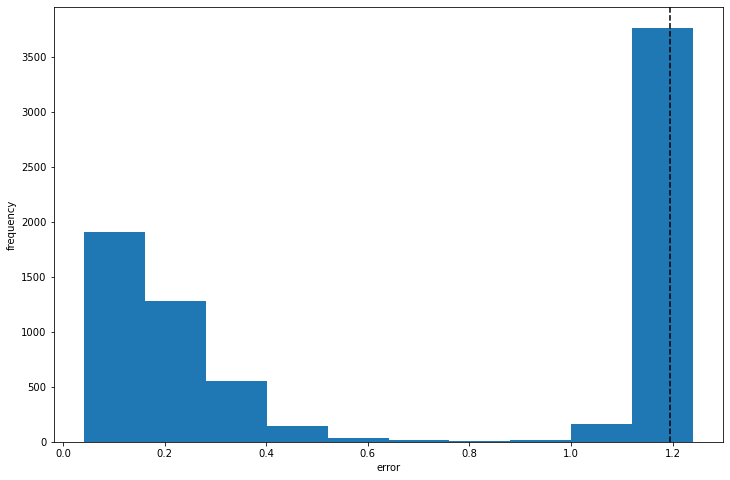

Outliers visualization


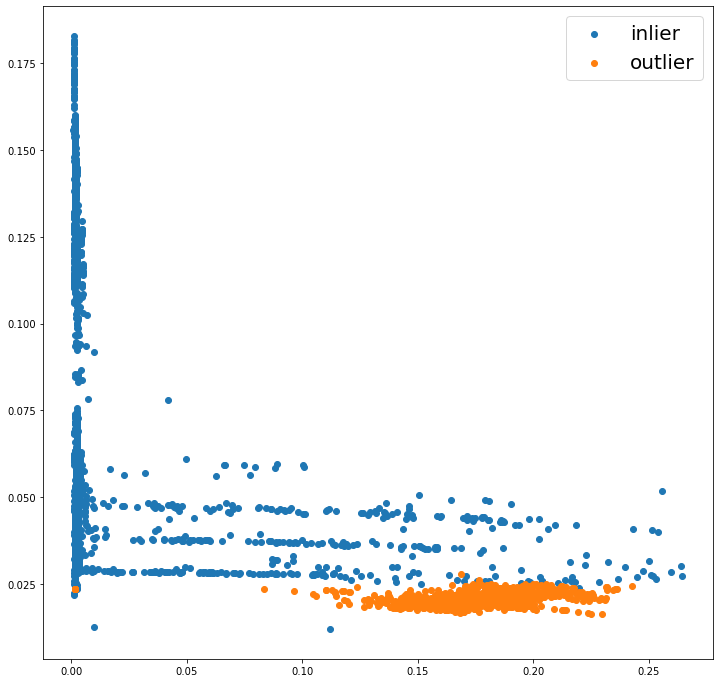

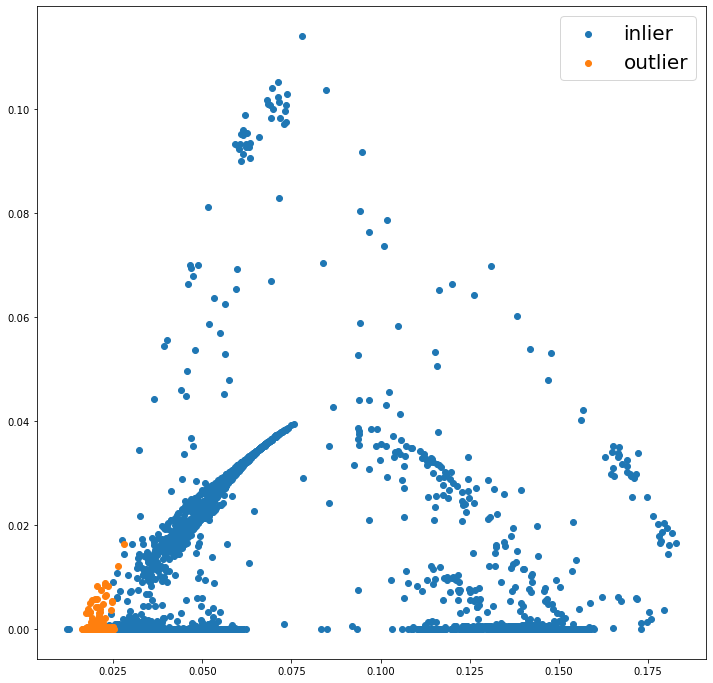

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.986     0.996     0.991      3934
           2      0.996     0.986     0.991      3934

    accuracy                          0.991      7868
   macro avg      0.991     0.991     0.991      7868
weighted avg      0.991     0.991     0.991      7868



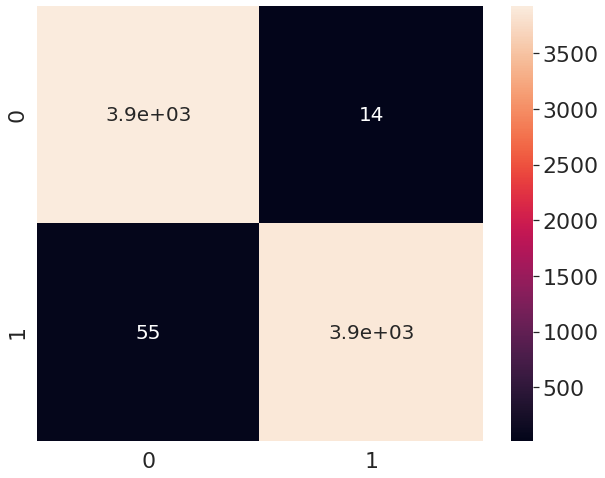

AUC score:  0.9912302999491612


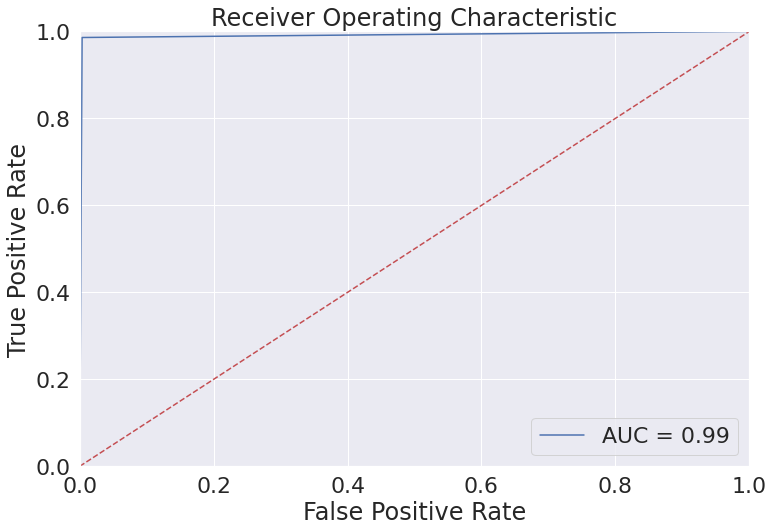

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [46]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (7868, 115) (7868,)
----------------------Test is starting----------------------
Scale data
Shape:  (7868, 115) (7868,)
Shape:  (7868, 115) (7868,)
Normalize data
Shape:  (7868, 115) (7868,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.16495308 0.28248674 0.09461051 ... 0.76182689 0.85173604 1.21229924]
Visualize quantization error


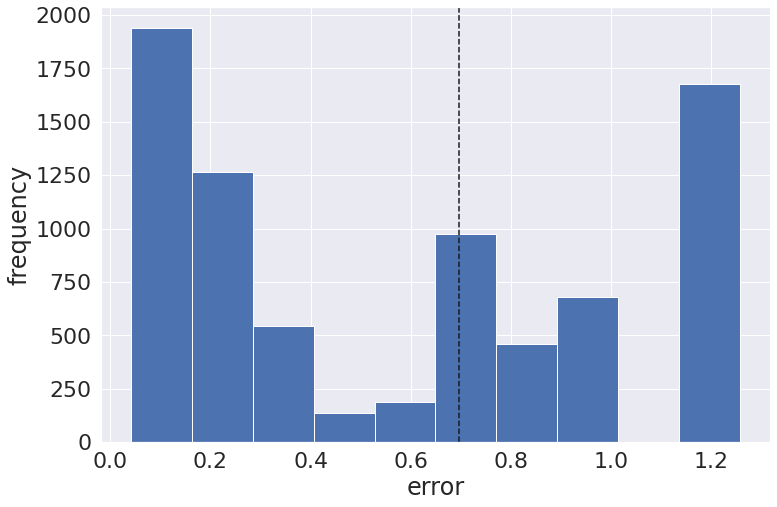

Outliers visualization


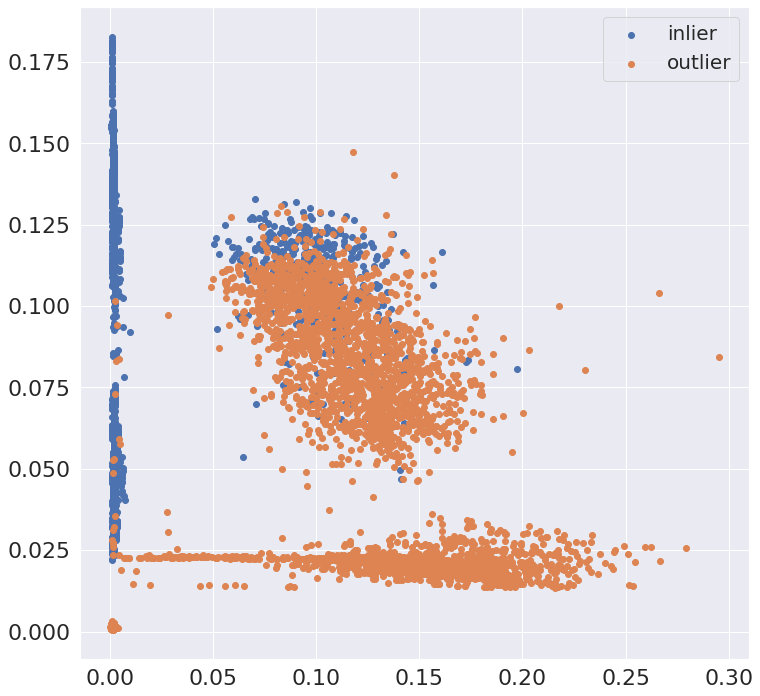

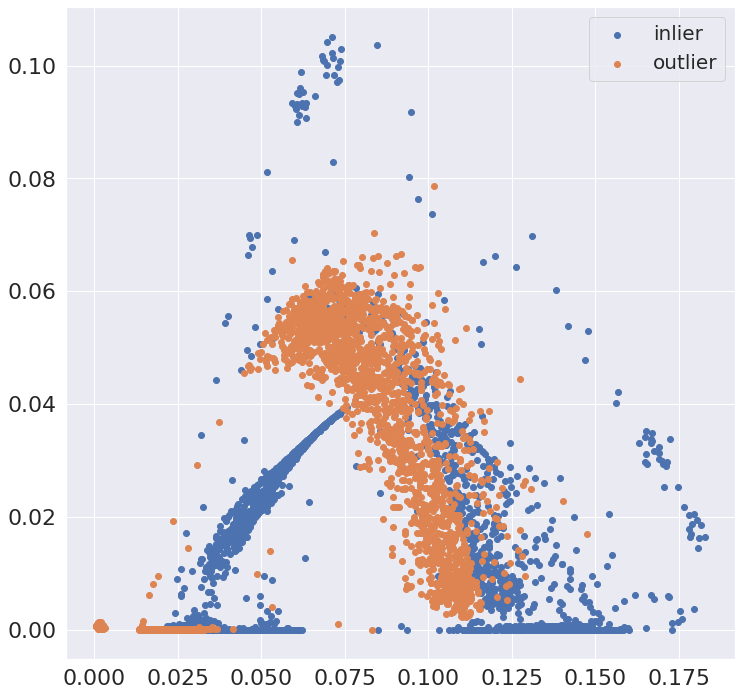

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.634     0.996     0.775      3934
           2      0.992     0.426     0.596      3934

    accuracy                          0.711      7868
   macro avg      0.813     0.711     0.685      7868
weighted avg      0.813     0.711     0.685      7868



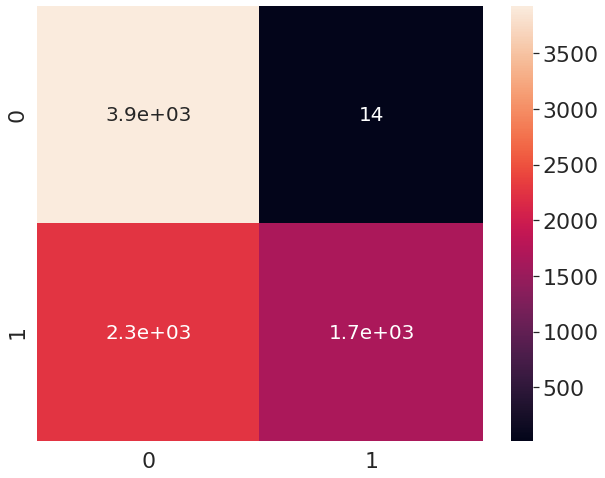

AUC score:  0.7109811896288765


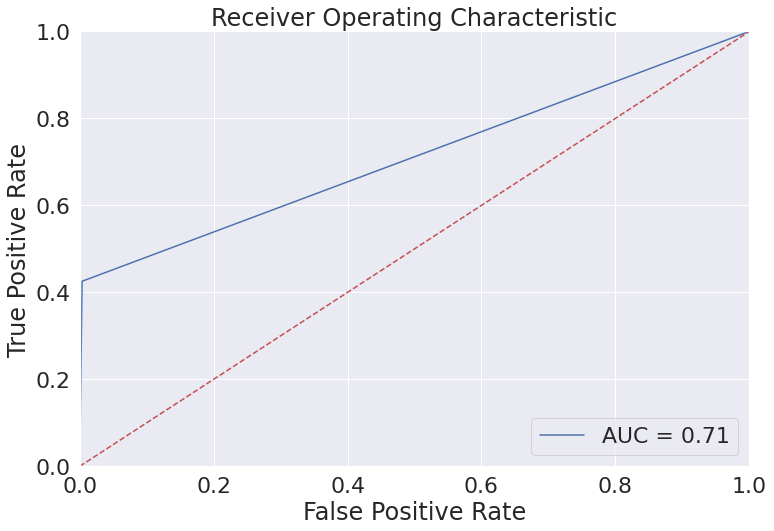

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [47]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 2) Set 22 (recommend size)

### Train

In [48]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo=None, som_x=22, som_y=22, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(18358, 115) (18358,)
------------Scale data-----------------
(18358, 115) (18358,)
X_train_scaled
[[ 3.45794855e-03  5.41440555e-02  3.63262322e-09 ...  5.57415826e-18
   3.81797403e-34  2.25198600e-17]
 [ 4.47850916e-03  1.24129016e-01  6.37556170e-02 ...  1.27110049e-01
  -9.70281479e-02 -2.36053078e-01]
 [ 6.77613648e-03  6.51663165e-02  2.18698960e-04 ...  1.35988519e-01
  -1.59362024e-01 -3.64757266e-01]
 ...
 [ 3.62804962e-03  3.33851152e-01  1.05116699e-02 ...  1.47720813e-01
  -8.32440442e-02 -1.85465097e-01]
 [ 5.45194536e-03  2.84774544e-01  2.93300948e-02 ...  1.04072329e-01
  -4.04594790e-02 -1.14390467e-01]
 [ 3.45794842e-03  3.42912333e-01  0.00000000e+00 ...  9.75485625e-02
  -3.71231151e-02 -1.12811060e-01]]
(18358, 115) (18358,)
---------Normalize data--------------
(18358, 115) (18358,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 4.533139705657959


### Test on the same device

#### Test on gafgyt

Shape:  (7868, 115) (7868,)
----------------------Test is starting----------------------
Scale data
Shape:  (7868, 115) (7868,)
Shape:  (7868, 115) (7868,)
Normalize data
Shape:  (7868, 115) (7868,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.10570329 0.24231377 0.05229123 ... 1.1330675  1.13306749 1.13306749]
Visualize quantization error


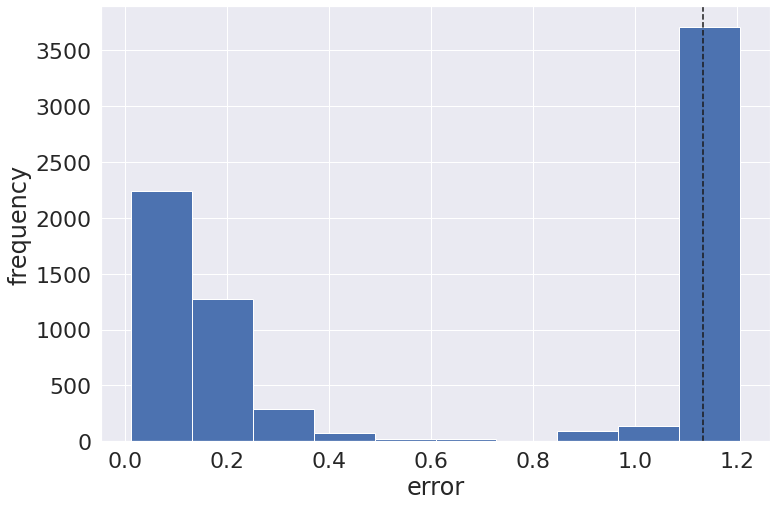

Outliers visualization


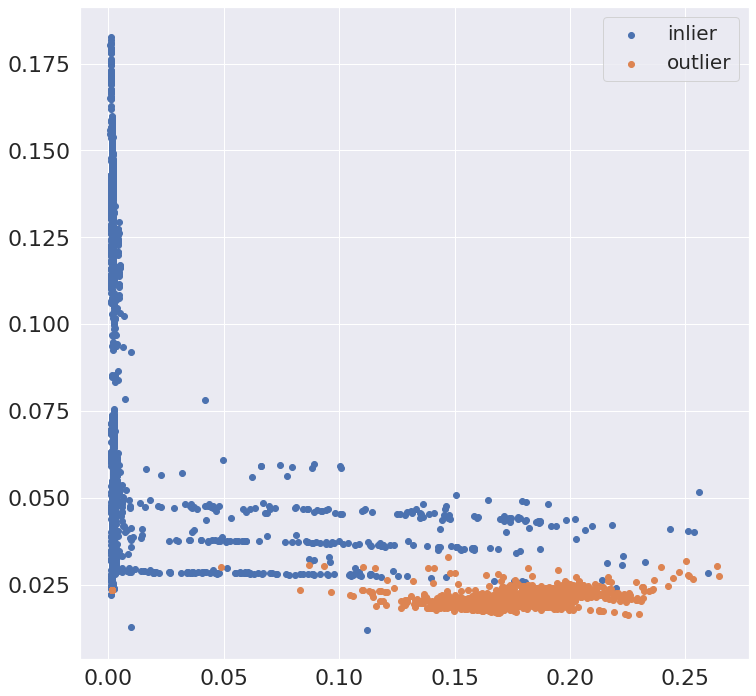

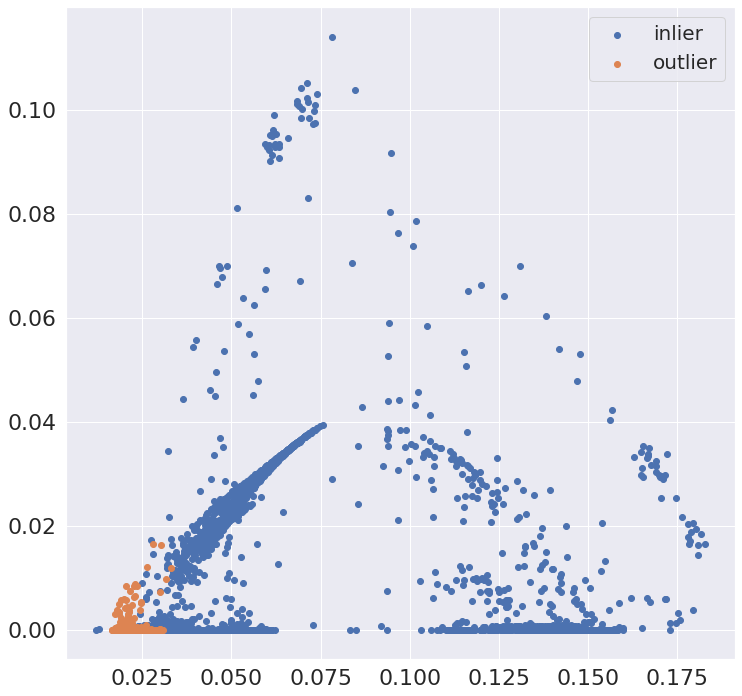

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.996     0.997      3934
           2      0.996     0.998     0.997      3934

    accuracy                          0.997      7868
   macro avg      0.997     0.997     0.997      7868
weighted avg      0.997     0.997     0.997      7868



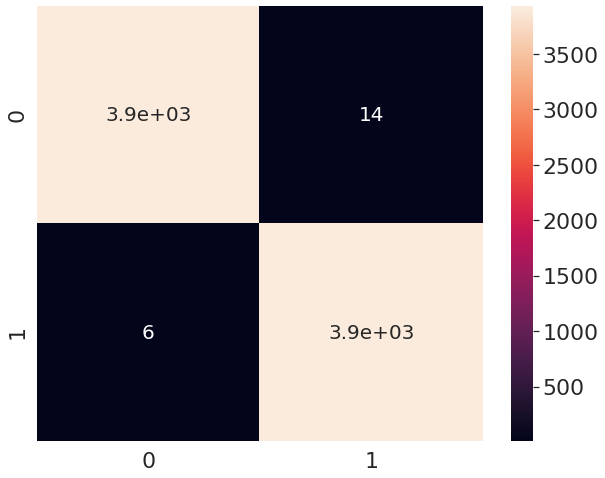

AUC score:  0.9974580579562787


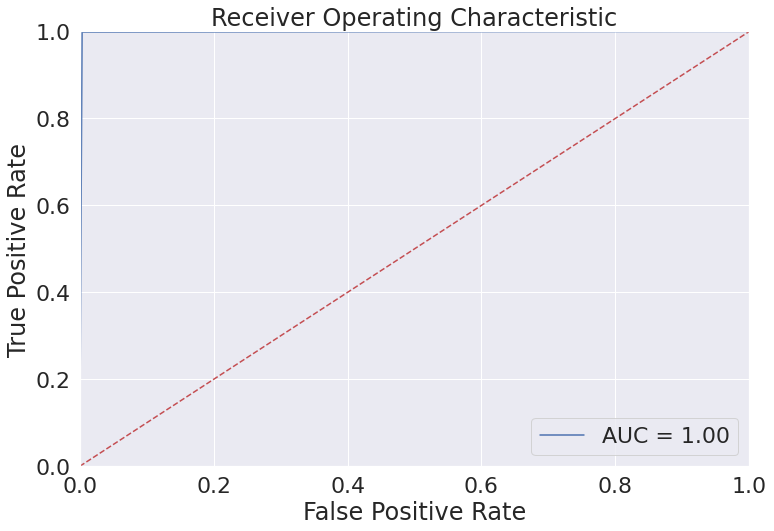

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [49]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (7868, 115) (7868,)
----------------------Test is starting----------------------
Scale data
Shape:  (7868, 115) (7868,)
Shape:  (7868, 115) (7868,)
Normalize data
Shape:  (7868, 115) (7868,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.10570329 0.24231377 0.05229123 ... 0.76461966 0.85310832 1.17901733]
Visualize quantization error


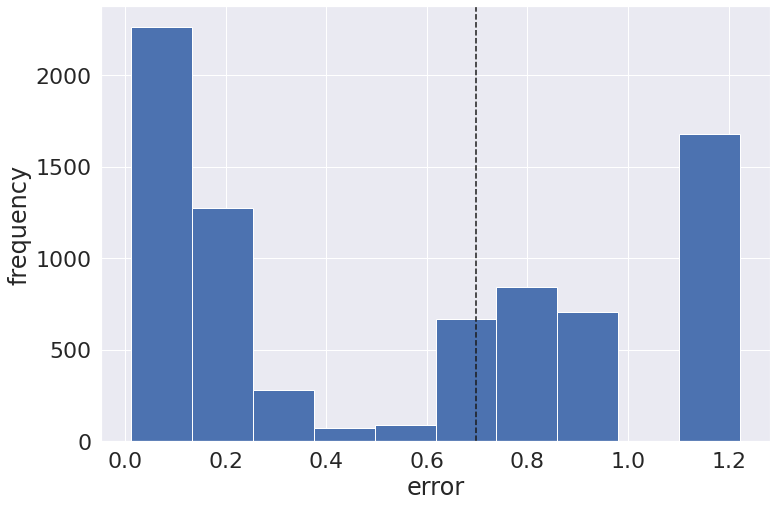

Outliers visualization


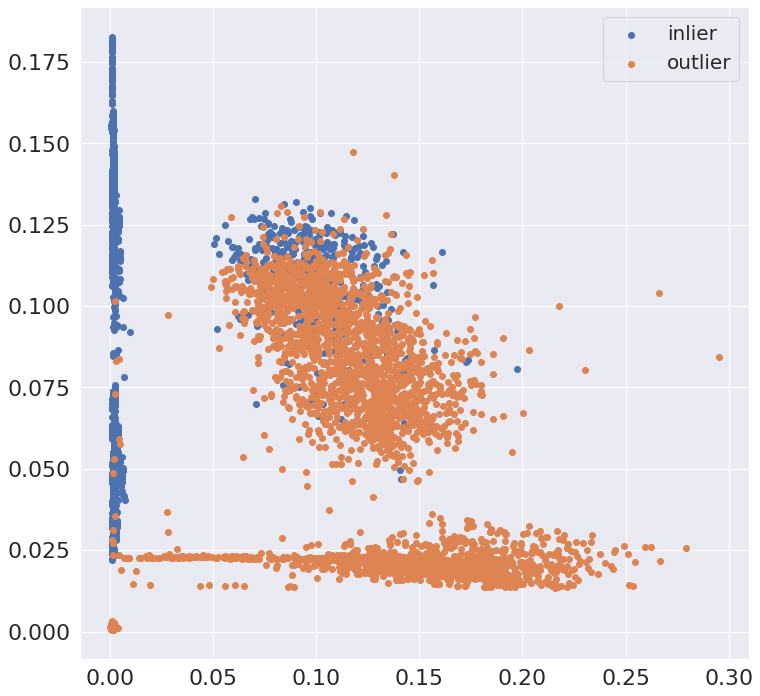

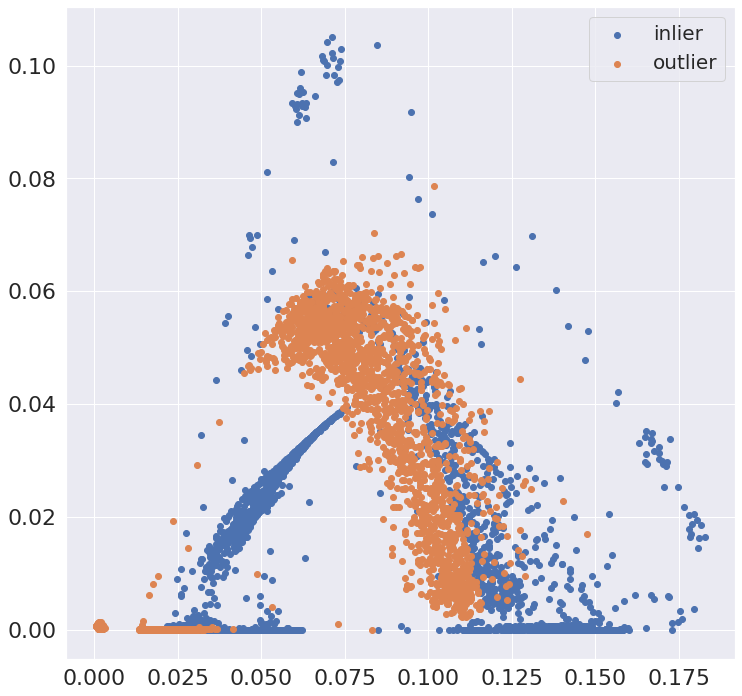

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.655     0.996     0.790      3934
           2      0.993     0.475     0.642      3934

    accuracy                          0.736      7868
   macro avg      0.824     0.736     0.716      7868
weighted avg      0.824     0.736     0.716      7868



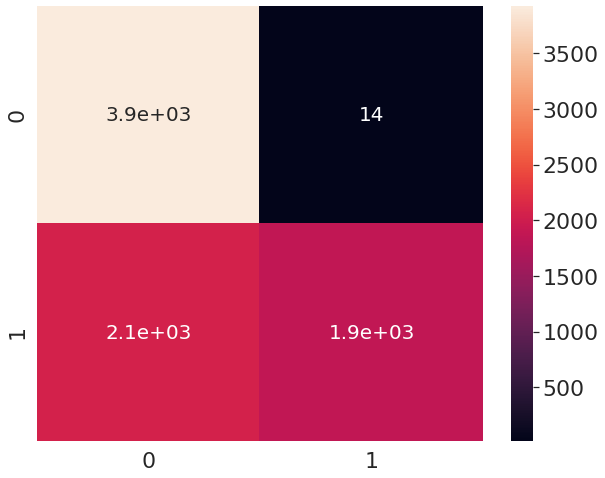

AUC score:  0.735510930350788


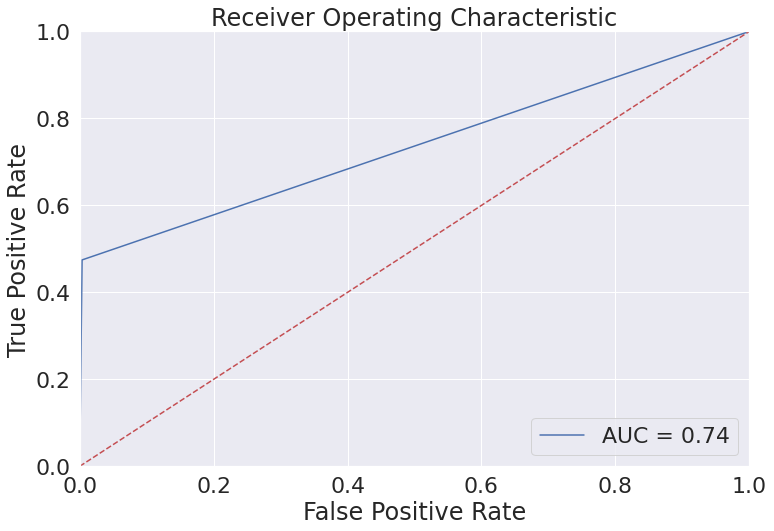

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [50]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 3) Set 30

### Train

In [51]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo=None, som_x=30, som_y=30, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(18358, 115) (18358,)
------------Scale data-----------------
(18358, 115) (18358,)
X_train_scaled
[[ 3.45794855e-03  5.41440555e-02  3.63262322e-09 ...  5.57415826e-18
   3.81797403e-34  2.25198600e-17]
 [ 4.47850916e-03  1.24129016e-01  6.37556170e-02 ...  1.27110049e-01
  -9.70281479e-02 -2.36053078e-01]
 [ 6.77613648e-03  6.51663165e-02  2.18698960e-04 ...  1.35988519e-01
  -1.59362024e-01 -3.64757266e-01]
 ...
 [ 3.62804962e-03  3.33851152e-01  1.05116699e-02 ...  1.47720813e-01
  -8.32440442e-02 -1.85465097e-01]
 [ 5.45194536e-03  2.84774544e-01  2.93300948e-02 ...  1.04072329e-01
  -4.04594790e-02 -1.14390467e-01]
 [ 3.45794842e-03  3.42912333e-01  0.00000000e+00 ...  9.75485625e-02
  -3.71231151e-02 -1.12811060e-01]]
(18358, 115) (18358,)
---------Normalize data--------------
(18358, 115) (18358,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 7.344690561294556


### Test on the same device

#### Test on gafgyt

Shape:  (7868, 115) (7868,)
----------------------Test is starting----------------------
Scale data
Shape:  (7868, 115) (7868,)
Shape:  (7868, 115) (7868,)
Normalize data
Shape:  (7868, 115) (7868,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.08376614 0.27812044 0.04630476 ... 1.19383036 1.19383035 1.19383035]
Visualize quantization error


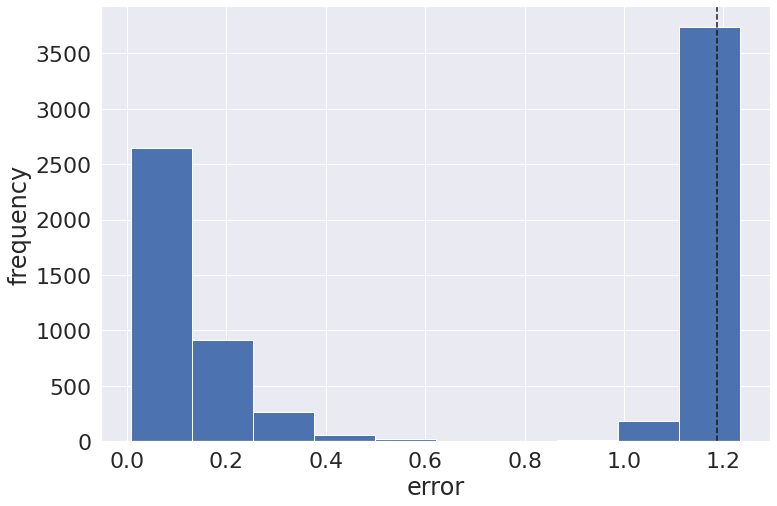

Outliers visualization


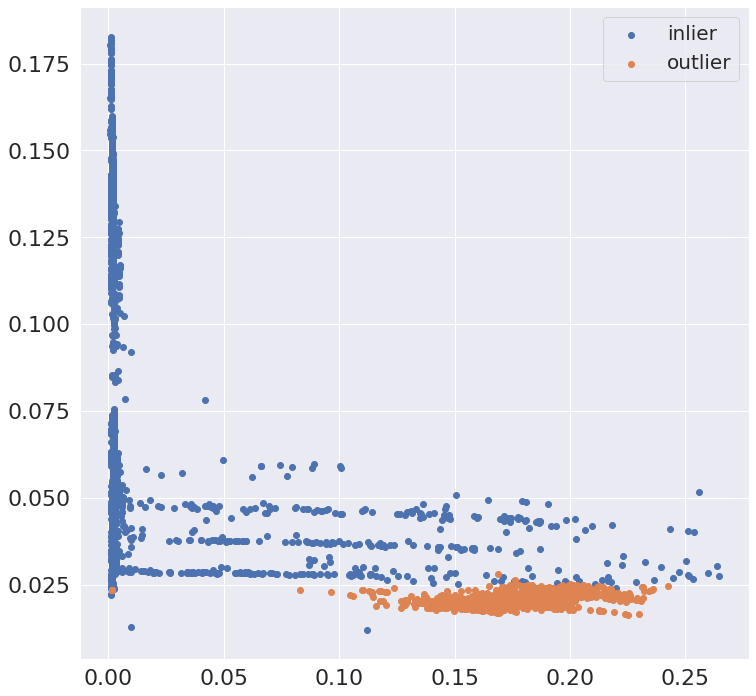

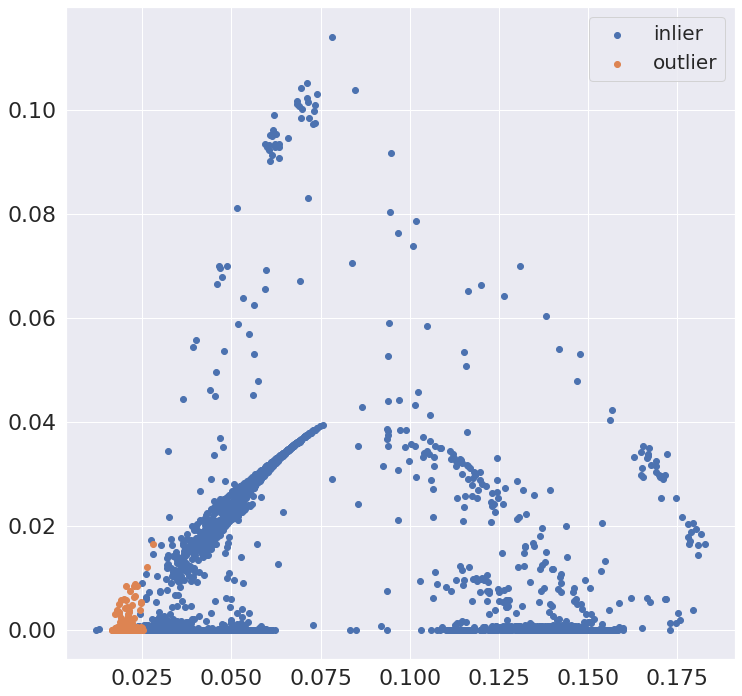

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.999     0.998      3934
           2      0.999     0.998     0.998      3934

    accuracy                          0.998      7868
   macro avg      0.998     0.998     0.998      7868
weighted avg      0.998     0.998     0.998      7868



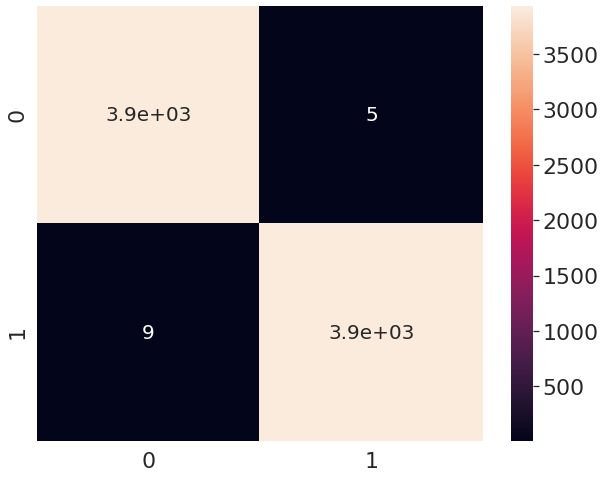

AUC score:  0.9982206405693951


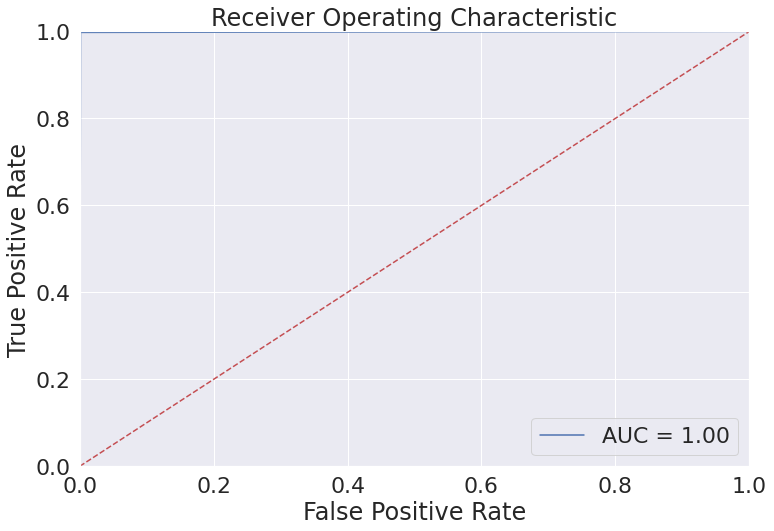

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [52]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (7868, 115) (7868,)
----------------------Test is starting----------------------
Scale data
Shape:  (7868, 115) (7868,)
Shape:  (7868, 115) (7868,)
Normalize data
Shape:  (7868, 115) (7868,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.08376614 0.27812044 0.04630476 ... 0.77353027 0.8617526  1.20553775]
Visualize quantization error


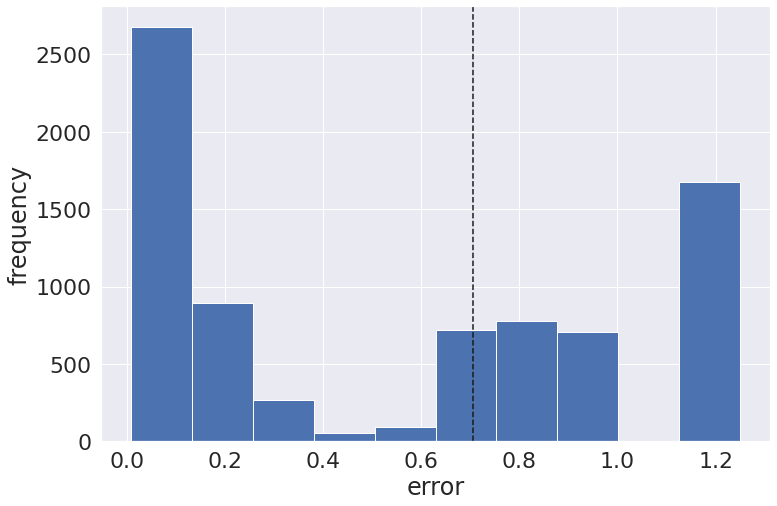

Outliers visualization


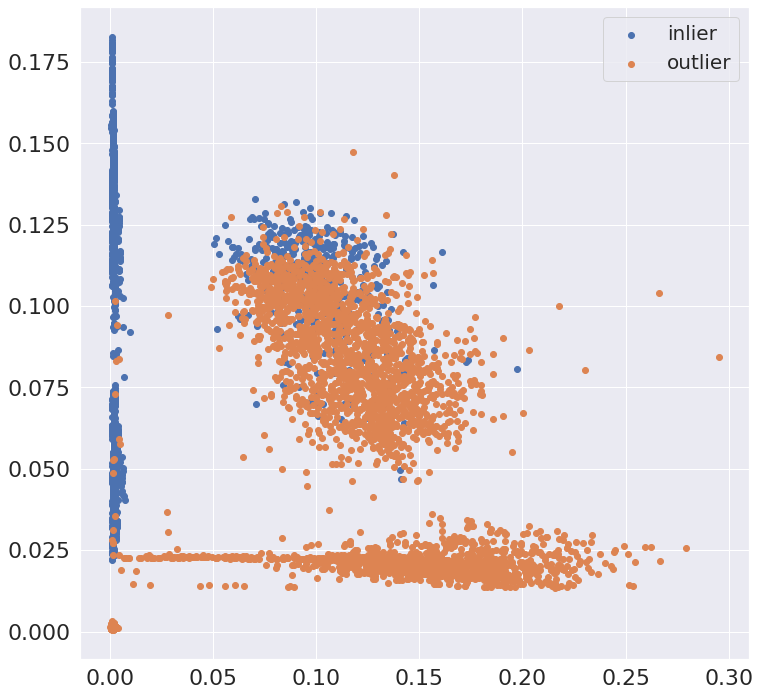

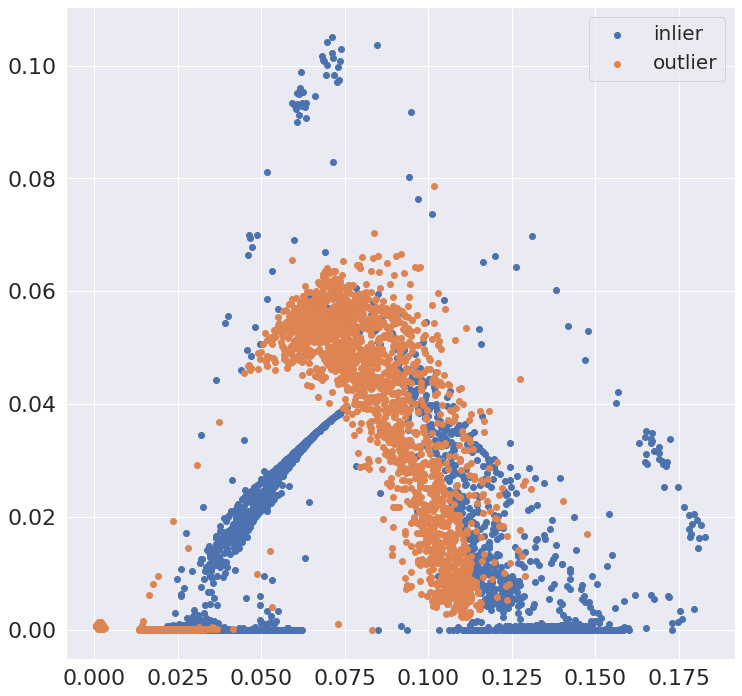

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.635     0.999     0.776      3934
           2      0.997     0.426     0.597      3934

    accuracy                          0.712      7868
   macro avg      0.816     0.712     0.687      7868
weighted avg      0.816     0.712     0.687      7868



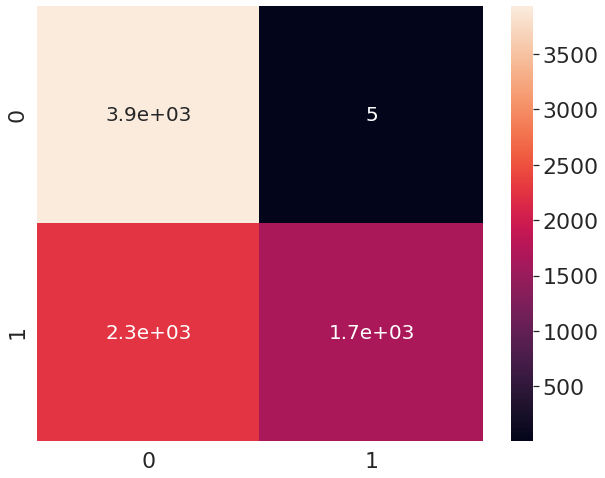

AUC score:  0.7122521606507373


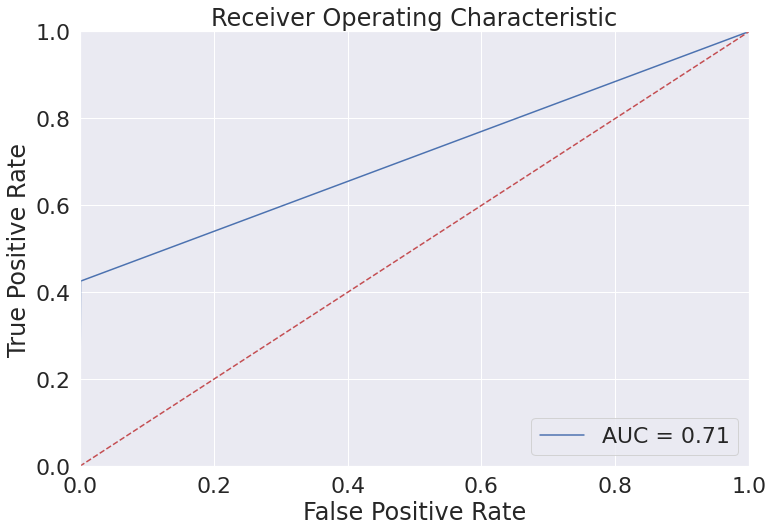

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [53]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 4) Set 45

### Train

In [54]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo=None, som_x=45, som_y=45, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(18358, 115) (18358,)
------------Scale data-----------------
(18358, 115) (18358,)
X_train_scaled
[[ 3.45794855e-03  5.41440555e-02  3.63262322e-09 ...  5.57415826e-18
   3.81797403e-34  2.25198600e-17]
 [ 4.47850916e-03  1.24129016e-01  6.37556170e-02 ...  1.27110049e-01
  -9.70281479e-02 -2.36053078e-01]
 [ 6.77613648e-03  6.51663165e-02  2.18698960e-04 ...  1.35988519e-01
  -1.59362024e-01 -3.64757266e-01]
 ...
 [ 3.62804962e-03  3.33851152e-01  1.05116699e-02 ...  1.47720813e-01
  -8.32440442e-02 -1.85465097e-01]
 [ 5.45194536e-03  2.84774544e-01  2.93300948e-02 ...  1.04072329e-01
  -4.04594790e-02 -1.14390467e-01]
 [ 3.45794842e-03  3.42912333e-01  0.00000000e+00 ...  9.75485625e-02
  -3.71231151e-02 -1.12811060e-01]]
(18358, 115) (18358,)
---------Normalize data--------------
(18358, 115) (18358,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 15.39548134803772


### Test on the same device

#### Test on gafgyt

Shape:  (7868, 115) (7868,)
----------------------Test is starting----------------------
Scale data
Shape:  (7868, 115) (7868,)
Shape:  (7868, 115) (7868,)
Normalize data
Shape:  (7868, 115) (7868,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.10164307 0.18374664 0.0330056  ... 1.20018535 1.20018534 1.20018534]
Visualize quantization error


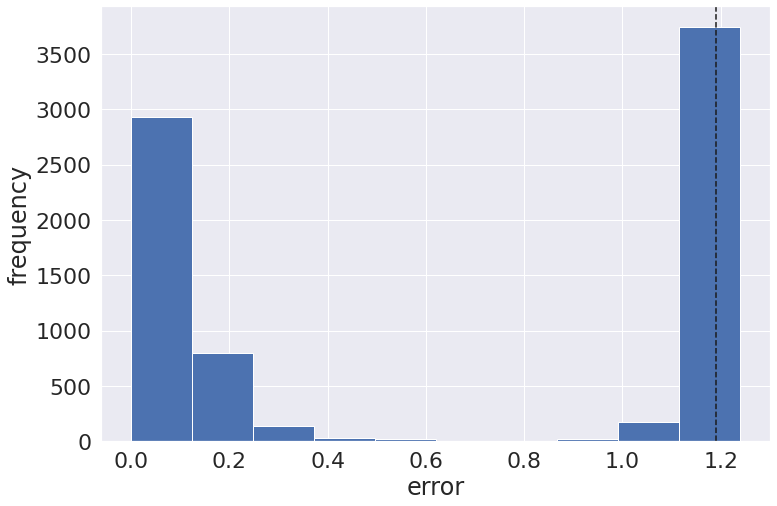

Outliers visualization


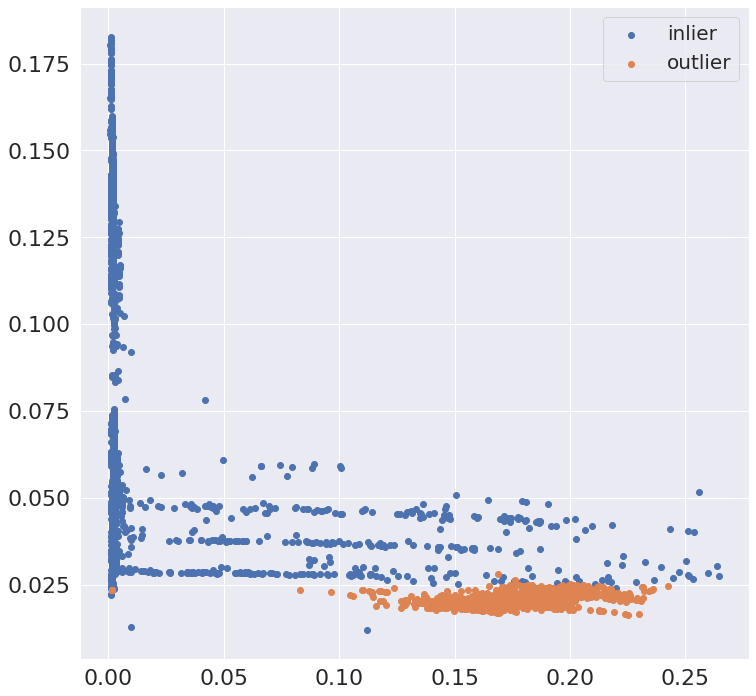

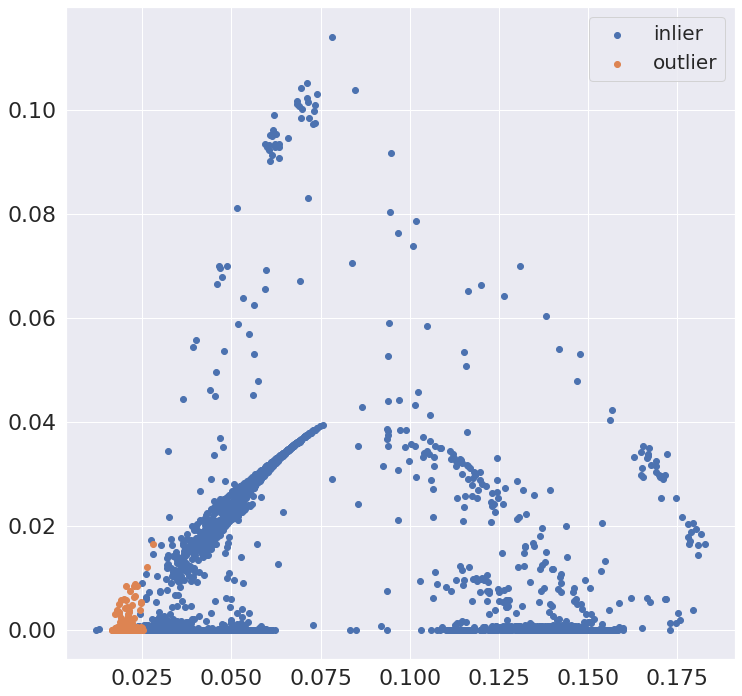

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.999     0.999      3934
           2      0.999     0.998     0.999      3934

    accuracy                          0.999      7868
   macro avg      0.999     0.999     0.999      7868
weighted avg      0.999     0.999     0.999      7868



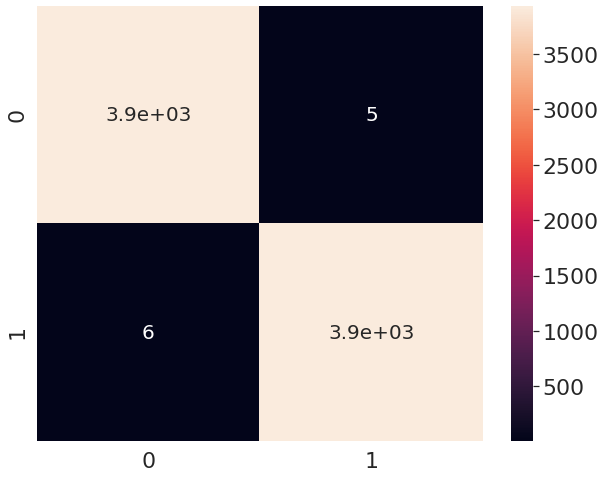

AUC score:  0.9986019318759534


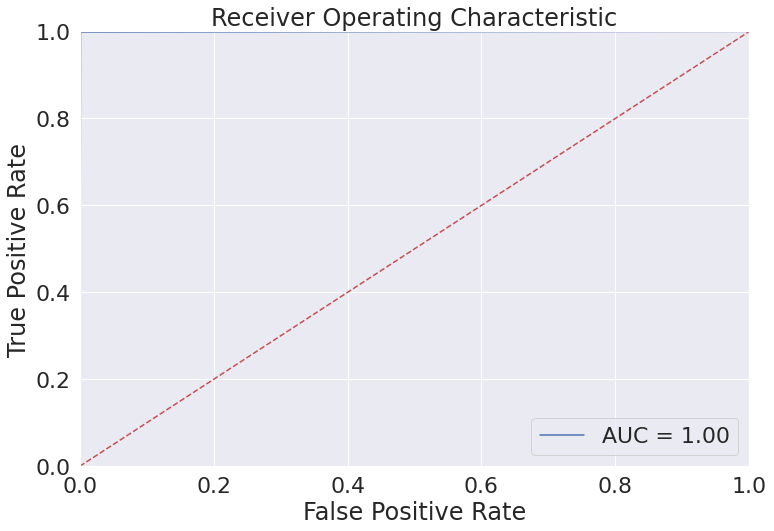

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [55]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (7868, 115) (7868,)
----------------------Test is starting----------------------
Scale data
Shape:  (7868, 115) (7868,)
Shape:  (7868, 115) (7868,)
Normalize data
Shape:  (7868, 115) (7868,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.10164307 0.18374664 0.0330056  ... 0.75574706 0.84514191 1.211148  ]
Visualize quantization error


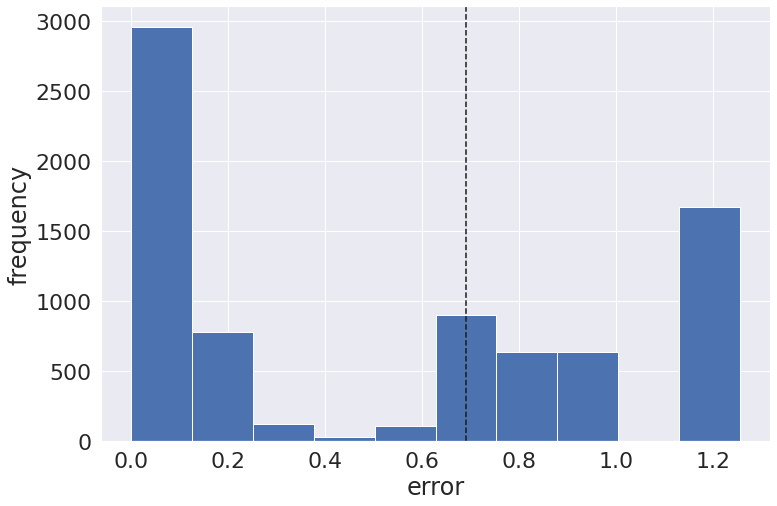

Outliers visualization


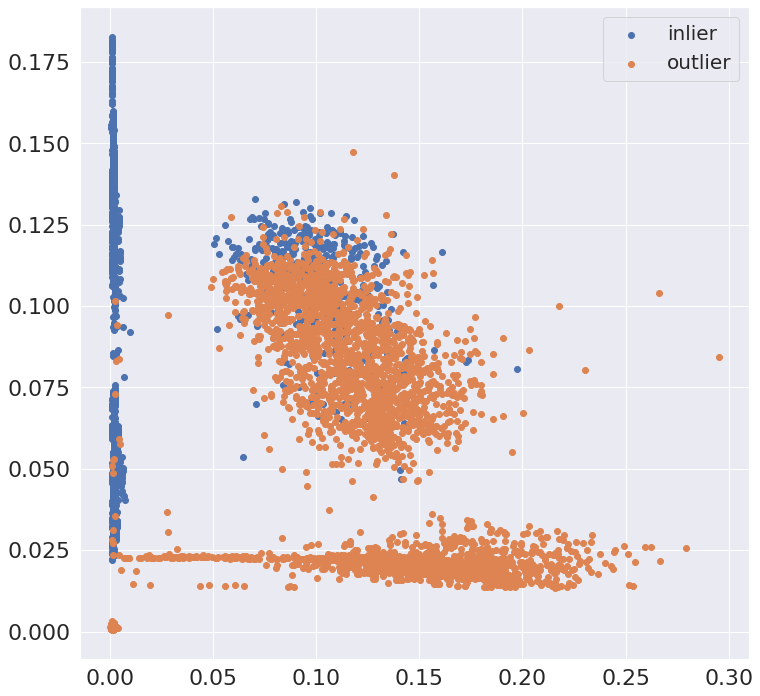

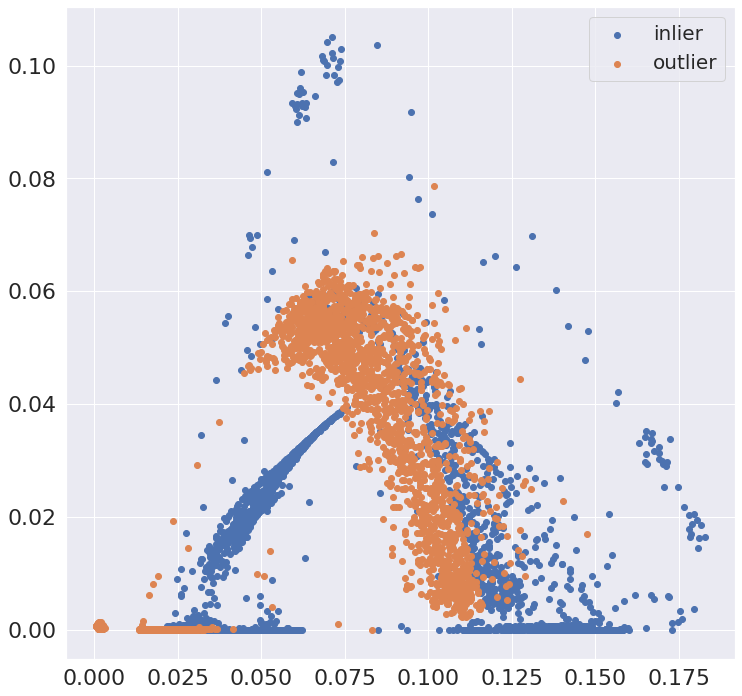

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.839     0.999     0.912      3934
           2      0.998     0.809     0.894      3934

    accuracy                          0.904      7868
   macro avg      0.919     0.904     0.903      7868
weighted avg      0.919     0.904     0.903      7868



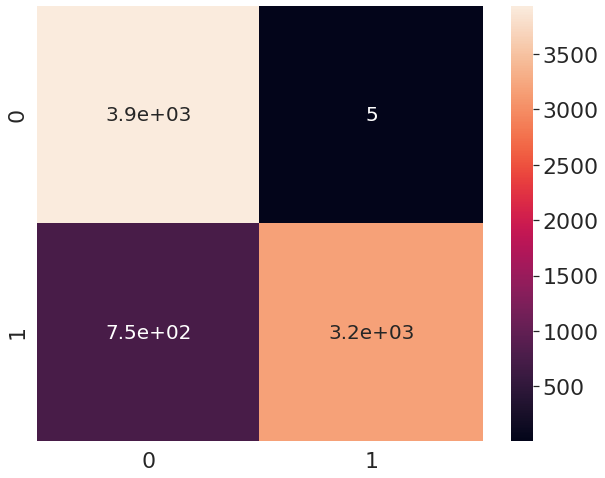

AUC score:  0.9036603965429587


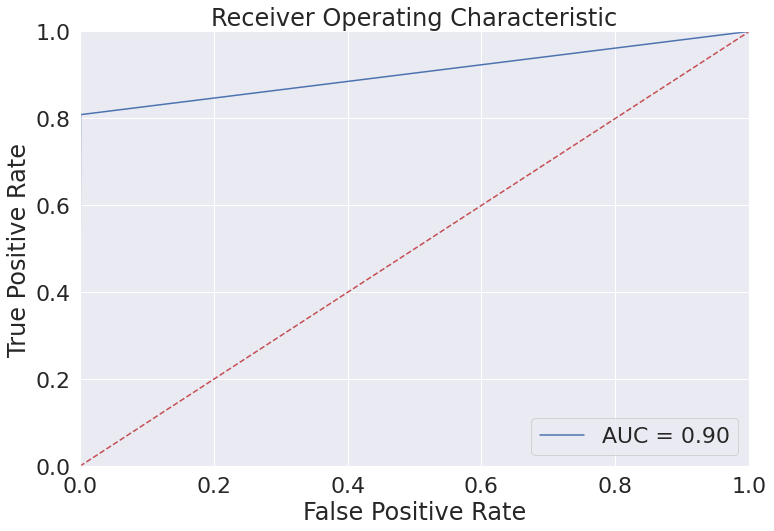

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [56]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)


### 1) Algo tpe

### Train

In [57]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo='tpe', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(18358, 115) (18358,)
------------Scale data-----------------
(18358, 115) (18358,)
X_train_scaled
[[ 3.45794855e-03  5.41440555e-02  3.63262322e-09 ...  5.57415826e-18
   3.81797403e-34  2.25198600e-17]
 [ 4.47850916e-03  1.24129016e-01  6.37556170e-02 ...  1.27110049e-01
  -9.70281479e-02 -2.36053078e-01]
 [ 6.77613648e-03  6.51663165e-02  2.18698960e-04 ...  1.35988519e-01
  -1.59362024e-01 -3.64757266e-01]
 ...
 [ 3.62804962e-03  3.33851152e-01  1.05116699e-02 ...  1.47720813e-01
  -8.32440442e-02 -1.85465097e-01]
 [ 5.45194536e-03  2.84774544e-01  2.93300948e-02 ...  1.04072329e-01
  -4.04594790e-02 -1.14390467e-01]
 [ 3.45794842e-03  3.42912333e-01  0.00000000e+00 ...  9.75485625e-02
  -3.71231151e-02 -1.12811060e-01]]
(18358, 115) (18358,)
---------Normalize data--------------
(18358, 115) (18358,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 76.8728380203247


### Test on the same device

#### Test on gafgyt

Shape:  (7868, 115) (7868,)
----------------------Test is starting----------------------
Scale data
Shape:  (7868, 115) (7868,)
Shape:  (7868, 115) (7868,)
Normalize data
Shape:  (7868, 115) (7868,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.107958   0.21847611 0.06421917 ... 1.16063807 1.16063806 1.16063806]
Visualize quantization error


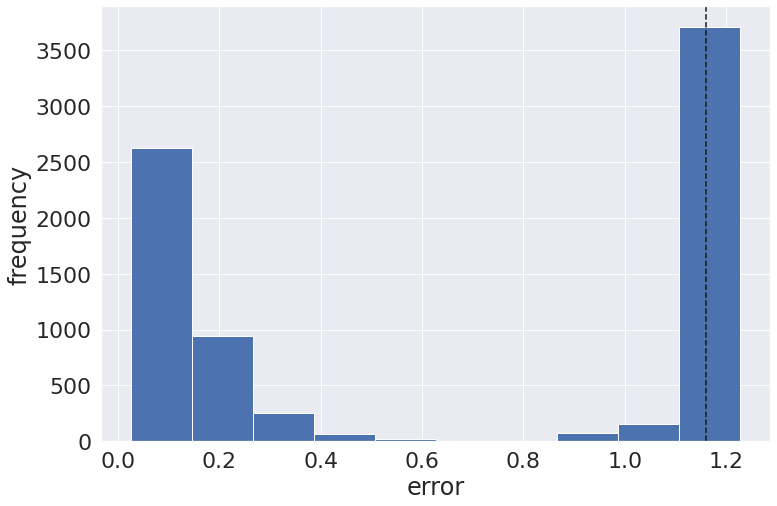

Outliers visualization


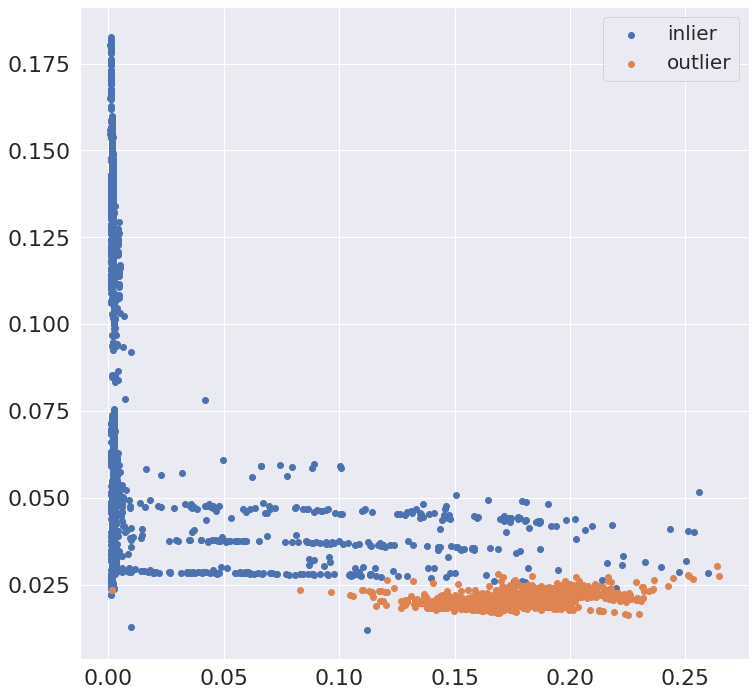

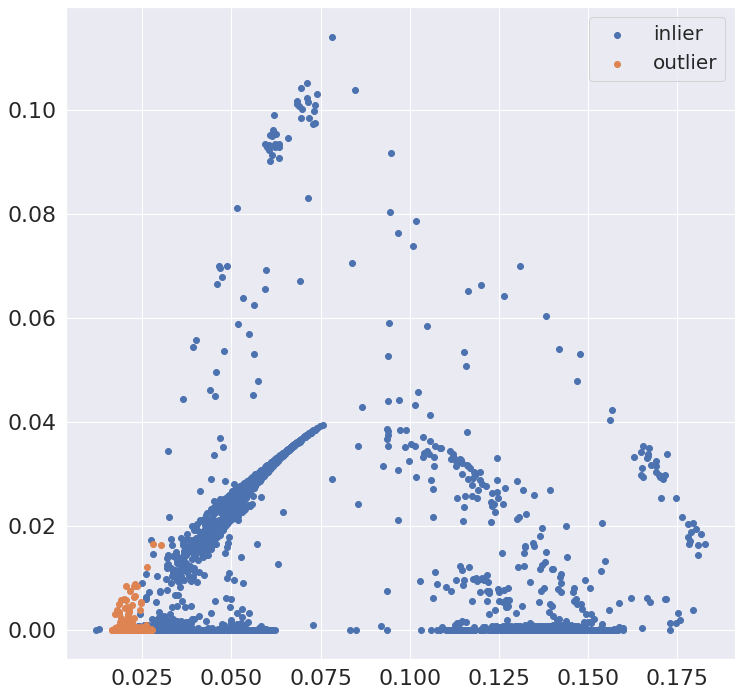

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.998     0.998      3934
           2      0.998     0.998     0.998      3934

    accuracy                          0.998      7868
   macro avg      0.998     0.998     0.998      7868
weighted avg      0.998     0.998     0.998      7868



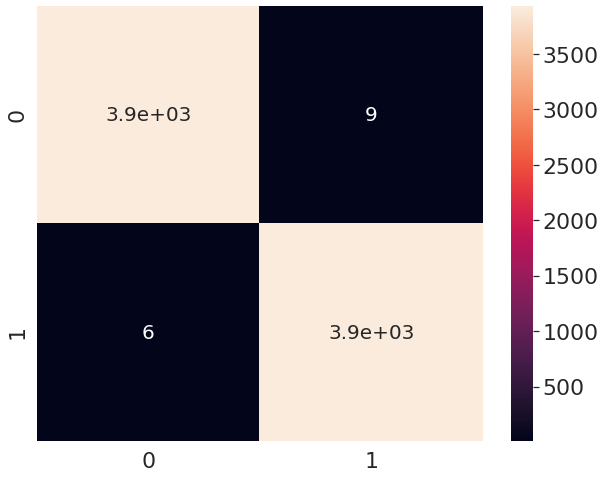

AUC score:  0.998093543467209


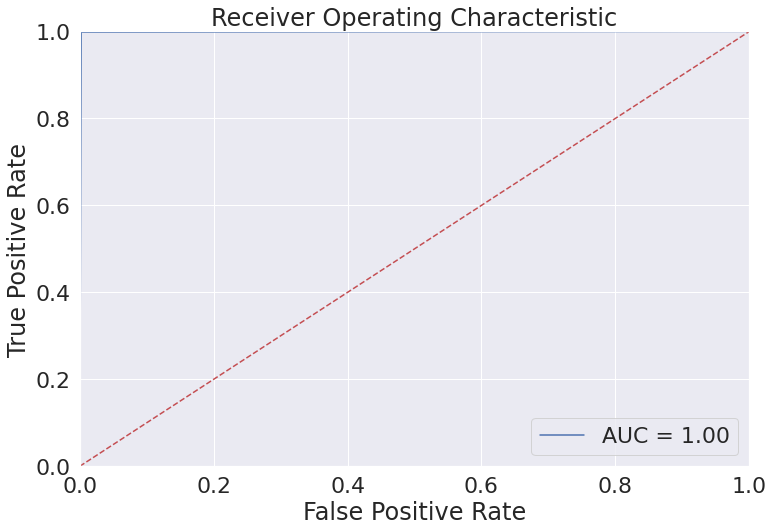

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [58]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (7868, 115) (7868,)
----------------------Test is starting----------------------
Scale data
Shape:  (7868, 115) (7868,)
Shape:  (7868, 115) (7868,)
Normalize data
Shape:  (7868, 115) (7868,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.107958   0.21847611 0.06421917 ... 0.76003499 0.84695204 1.19740386]
Visualize quantization error


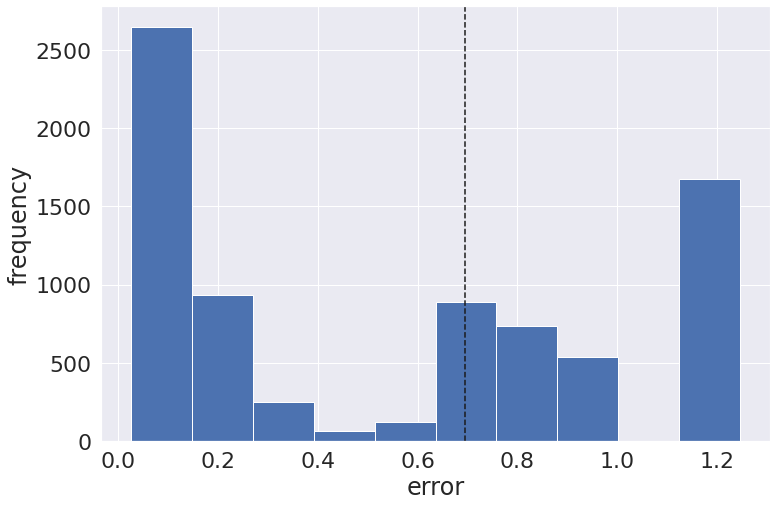

Outliers visualization


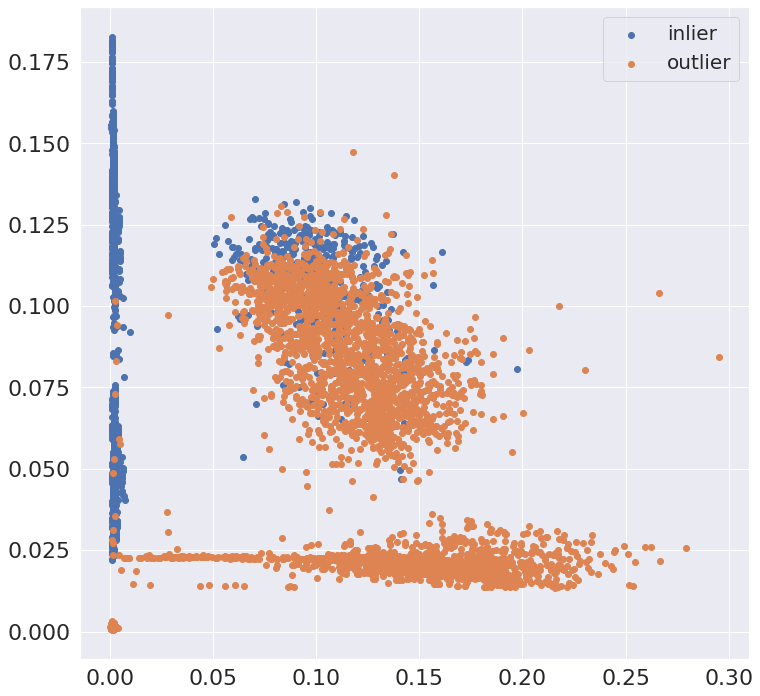

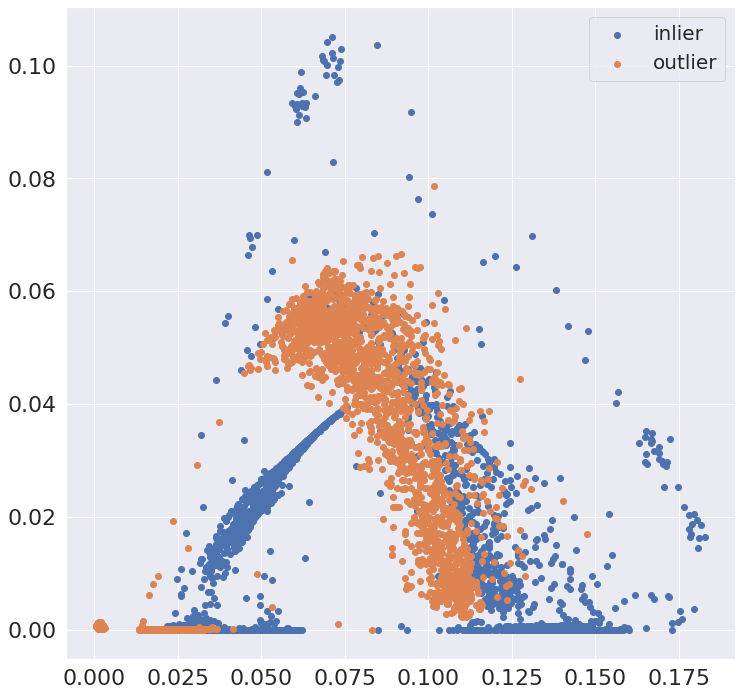

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.633     0.998     0.775      3934
           2      0.995     0.422     0.593      3934

    accuracy                          0.710      7868
   macro avg      0.814     0.710     0.684      7868
weighted avg      0.814     0.710     0.684      7868



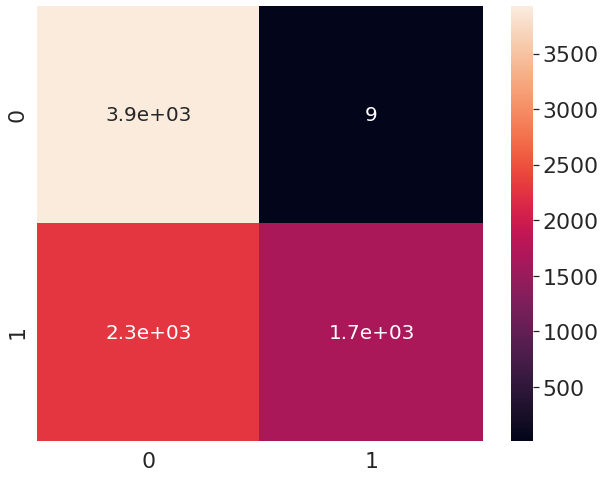

AUC score:  0.7098373157092018


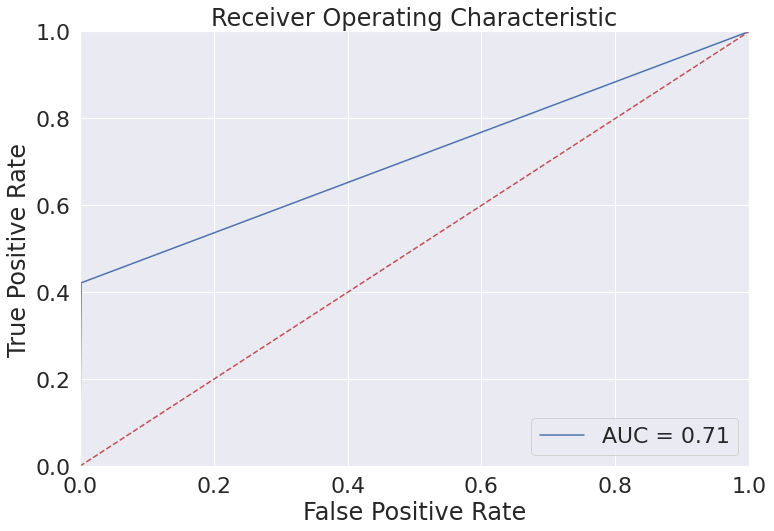

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [59]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 2) Algo rand

### Train

In [60]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo='rand', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(18358, 115) (18358,)
------------Scale data-----------------
(18358, 115) (18358,)
X_train_scaled
[[ 3.45794855e-03  5.41440555e-02  3.63262322e-09 ...  5.57415826e-18
   3.81797403e-34  2.25198600e-17]
 [ 4.47850916e-03  1.24129016e-01  6.37556170e-02 ...  1.27110049e-01
  -9.70281479e-02 -2.36053078e-01]
 [ 6.77613648e-03  6.51663165e-02  2.18698960e-04 ...  1.35988519e-01
  -1.59362024e-01 -3.64757266e-01]
 ...
 [ 3.62804962e-03  3.33851152e-01  1.05116699e-02 ...  1.47720813e-01
  -8.32440442e-02 -1.85465097e-01]
 [ 5.45194536e-03  2.84774544e-01  2.93300948e-02 ...  1.04072329e-01
  -4.04594790e-02 -1.14390467e-01]
 [ 3.45794842e-03  3.42912333e-01  0.00000000e+00 ...  9.75485625e-02
  -3.71231151e-02 -1.12811060e-01]]
(18358, 115) (18358,)
---------Normalize data--------------
(18358, 115) (18358,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 73.71042656898499


### Test Gafgyt

Shape:  (7868, 115) (7868,)
----------------------Test is starting----------------------
Scale data
Shape:  (7868, 115) (7868,)
Shape:  (7868, 115) (7868,)
Normalize data
Shape:  (7868, 115) (7868,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.08585463 0.20479958 0.03160594 ... 0.75760717 0.75760717 0.75760716]
Visualize quantization error


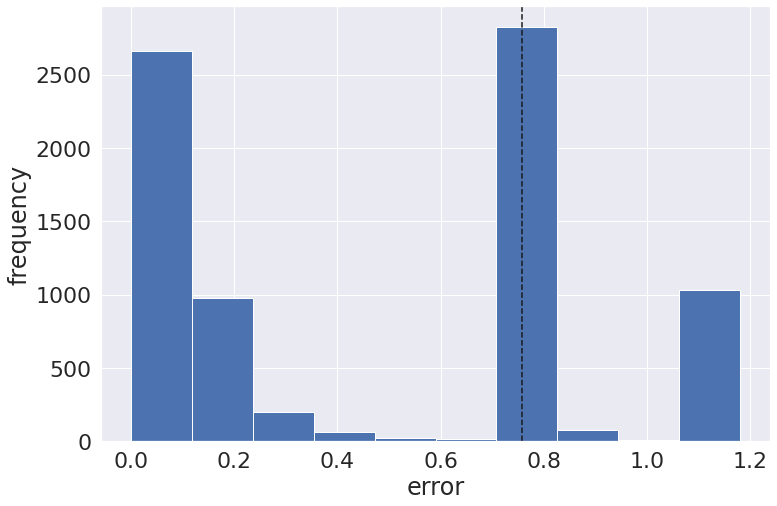

Outliers visualization


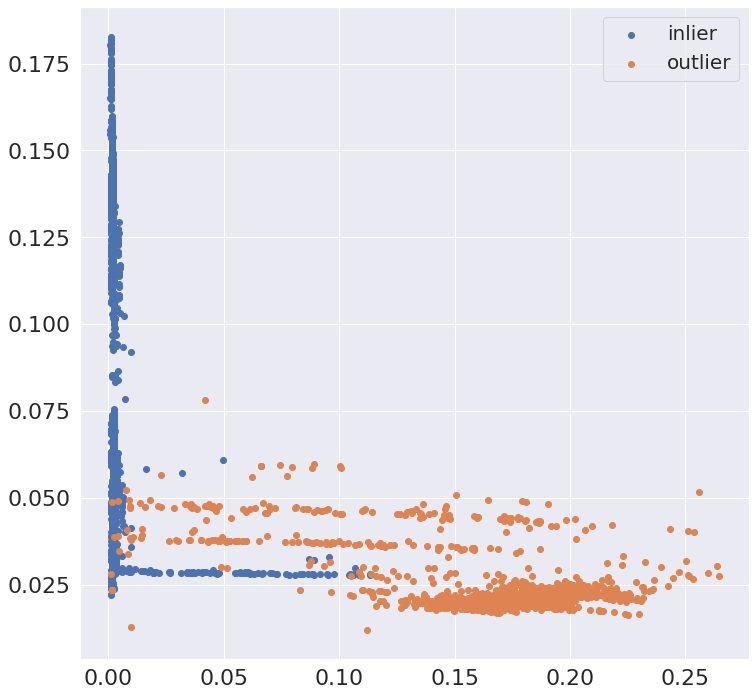

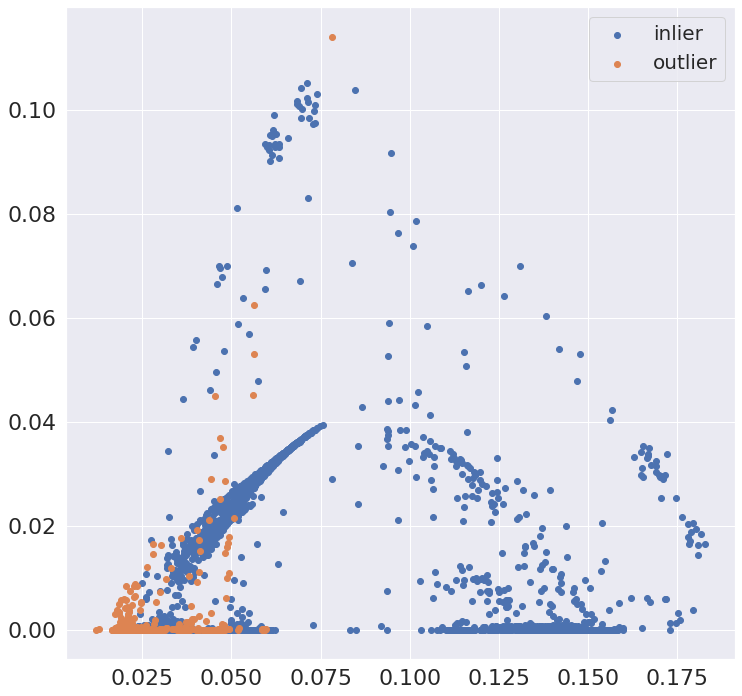

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.998     0.998      3934
           2      0.998     0.998     0.998      3934

    accuracy                          0.998      7868
   macro avg      0.998     0.998     0.998      7868
weighted avg      0.998     0.998     0.998      7868



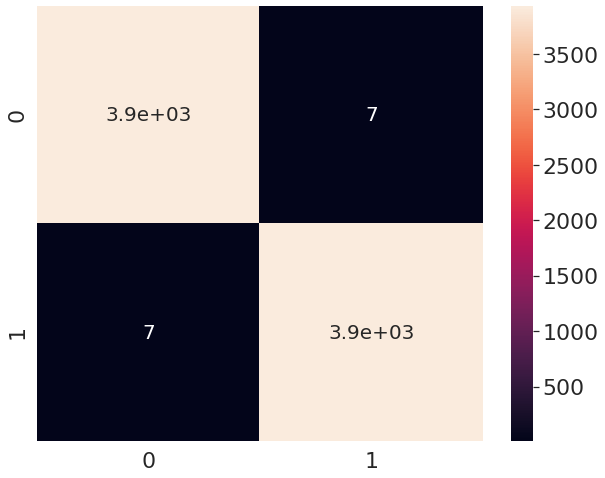

AUC score:  0.998220640569395


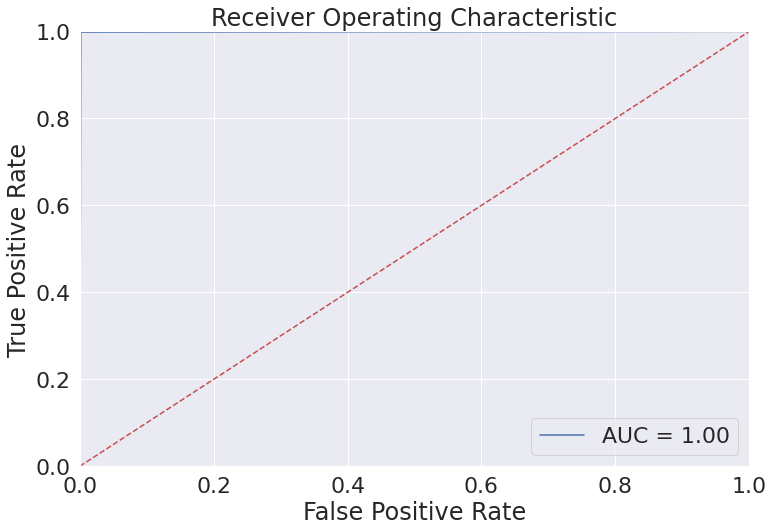

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [61]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

### Test Mirai

Shape:  (7868, 115) (7868,)
----------------------Test is starting----------------------
Scale data
Shape:  (7868, 115) (7868,)
Shape:  (7868, 115) (7868,)
Normalize data
Shape:  (7868, 115) (7868,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.08585463 0.20479958 0.03160594 ... 0.76333894 0.85212729 1.15602206]
Visualize quantization error


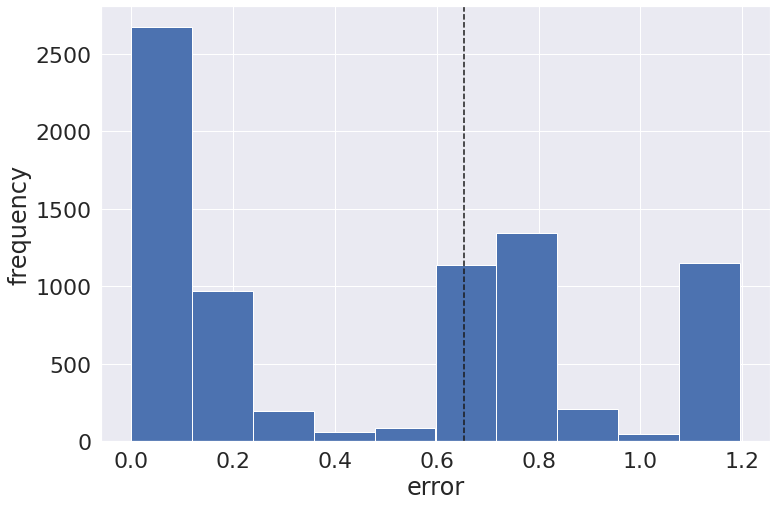

Outliers visualization


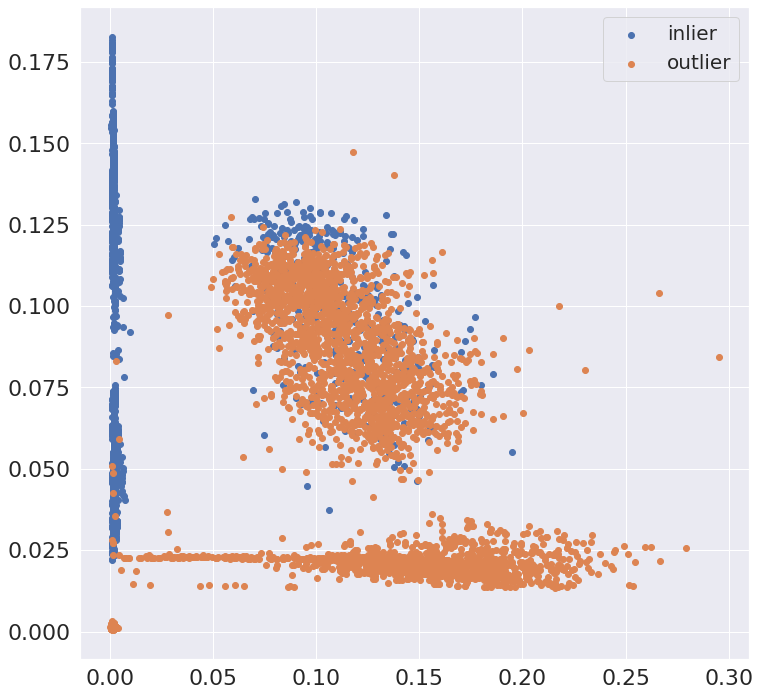

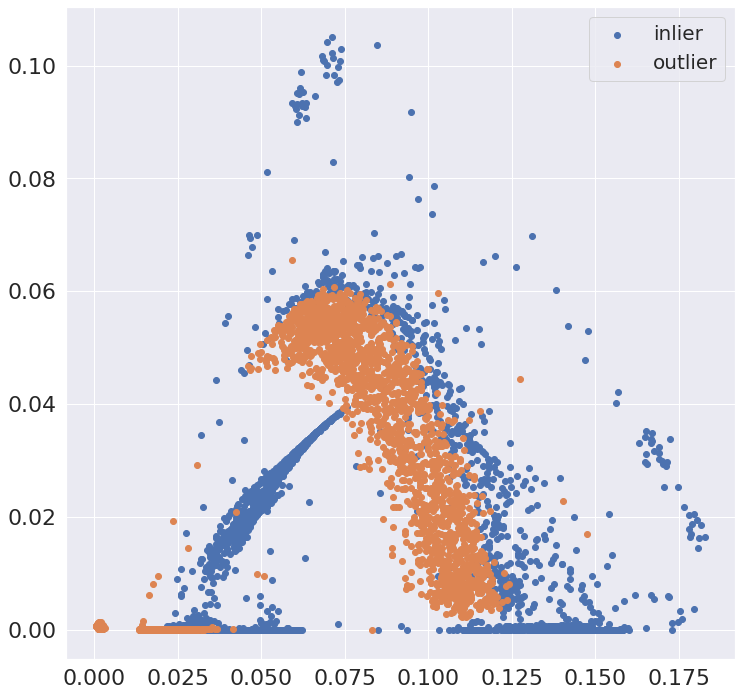

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.722     0.998     0.838      3934
           2      0.997     0.615     0.761      3934

    accuracy                          0.807      7868
   macro avg      0.859     0.807     0.799      7868
weighted avg      0.859     0.807     0.799      7868



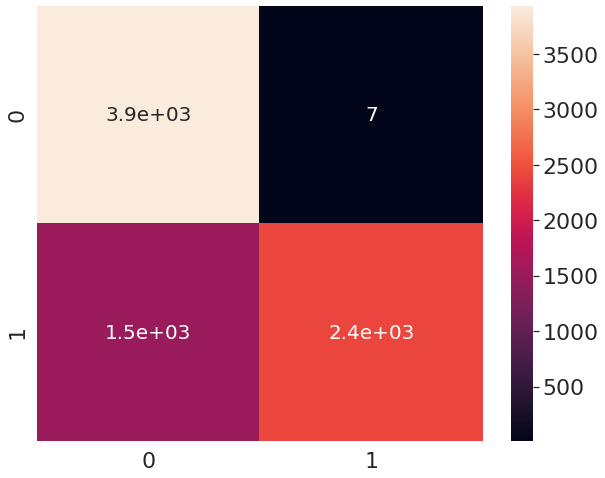

AUC score:  0.8066853075749872


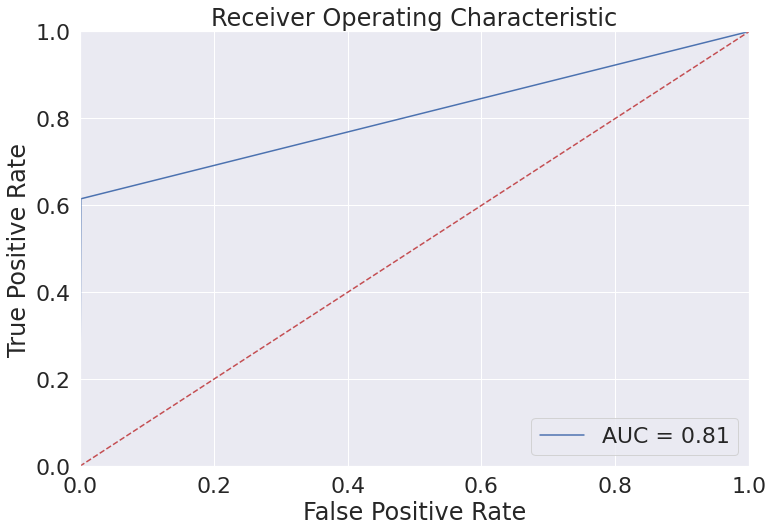

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [62]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 3) Algo atpe

In [63]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo='atpe', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(18358, 115) (18358,)
------------Scale data-----------------
(18358, 115) (18358,)
X_train_scaled
[[ 3.45794855e-03  5.41440555e-02  3.63262322e-09 ...  5.57415826e-18
   3.81797403e-34  2.25198600e-17]
 [ 4.47850916e-03  1.24129016e-01  6.37556170e-02 ...  1.27110049e-01
  -9.70281479e-02 -2.36053078e-01]
 [ 6.77613648e-03  6.51663165e-02  2.18698960e-04 ...  1.35988519e-01
  -1.59362024e-01 -3.64757266e-01]
 ...
 [ 3.62804962e-03  3.33851152e-01  1.05116699e-02 ...  1.47720813e-01
  -8.32440442e-02 -1.85465097e-01]
 [ 5.45194536e-03  2.84774544e-01  2.93300948e-02 ...  1.04072329e-01
  -4.04594790e-02 -1.14390467e-01]
 [ 3.45794842e-03  3.42912333e-01  0.00000000e+00 ...  9.75485625e-02
  -3.71231151e-02 -1.12811060e-01]]
(18358, 115) (18358,)
---------Normalize data--------------
(18358, 115) (18358,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

Shape:  (7868, 115) (7868,)
----------------------Test is starting----------------------
Scale data
Shape:  (7868, 115) (7868,)
Shape:  (7868, 115) (7868,)
Normalize data
Shape:  (7868, 115) (7868,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.07347354 0.2659958  0.02610748 ... 1.12093706 1.12093705 1.12093705]
Visualize quantization error


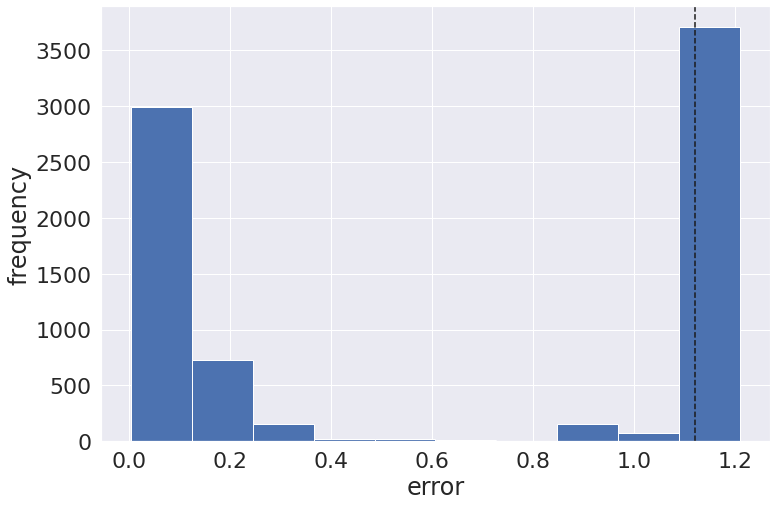

Outliers visualization


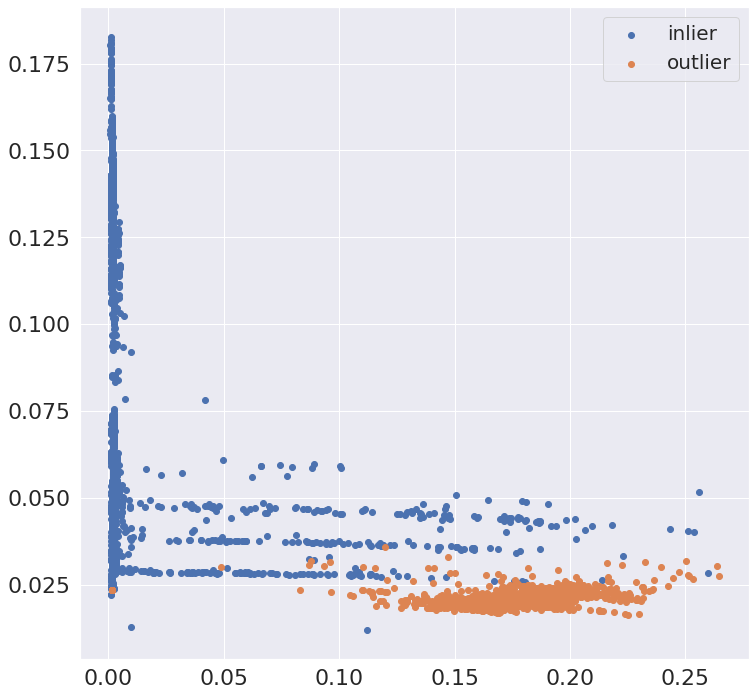

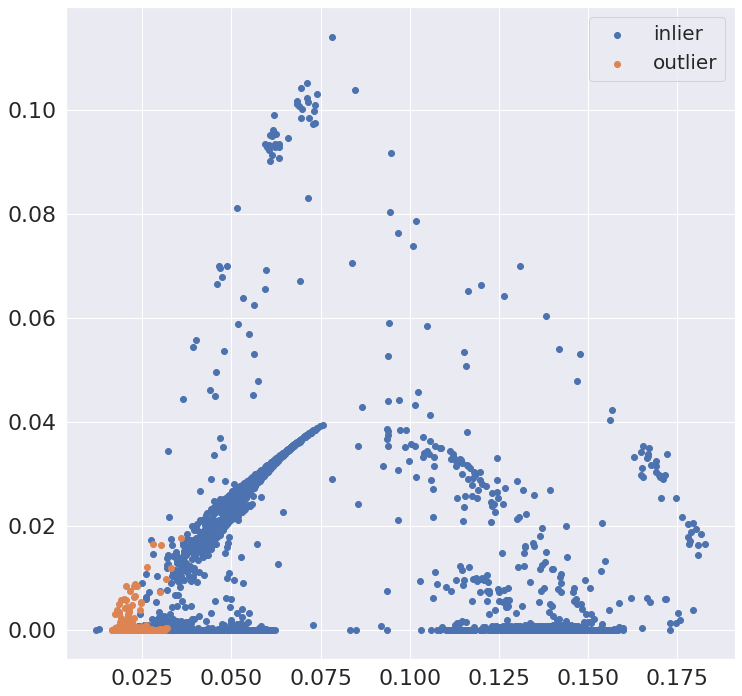

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.999     0.997     0.998      3934
           2      0.997     0.999     0.998      3934

    accuracy                          0.998      7868
   macro avg      0.998     0.998     0.998      7868
weighted avg      0.998     0.998     0.998      7868



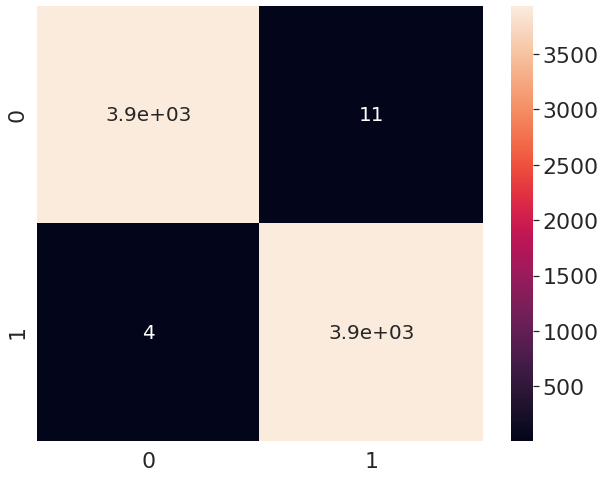

AUC score:  0.998093543467209


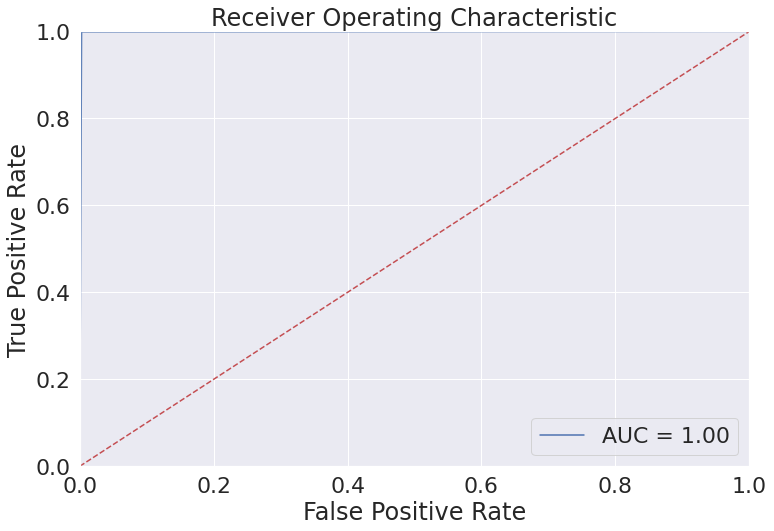

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [64]:
# test on gafgyt
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

Shape:  (7868, 115) (7868,)
----------------------Test is starting----------------------
Scale data
Shape:  (7868, 115) (7868,)
Shape:  (7868, 115) (7868,)
Normalize data
Shape:  (7868, 115) (7868,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.07347354 0.2659958  0.02610748 ... 0.77108263 0.8574172  1.1818602 ]
Visualize quantization error


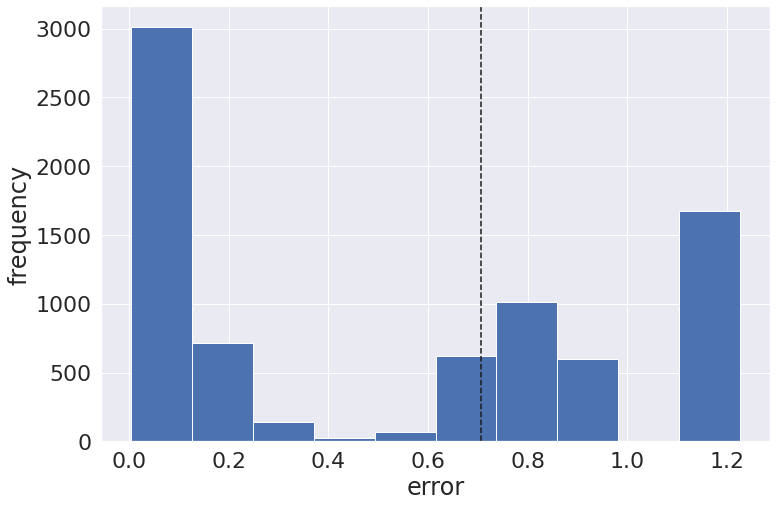

Outliers visualization


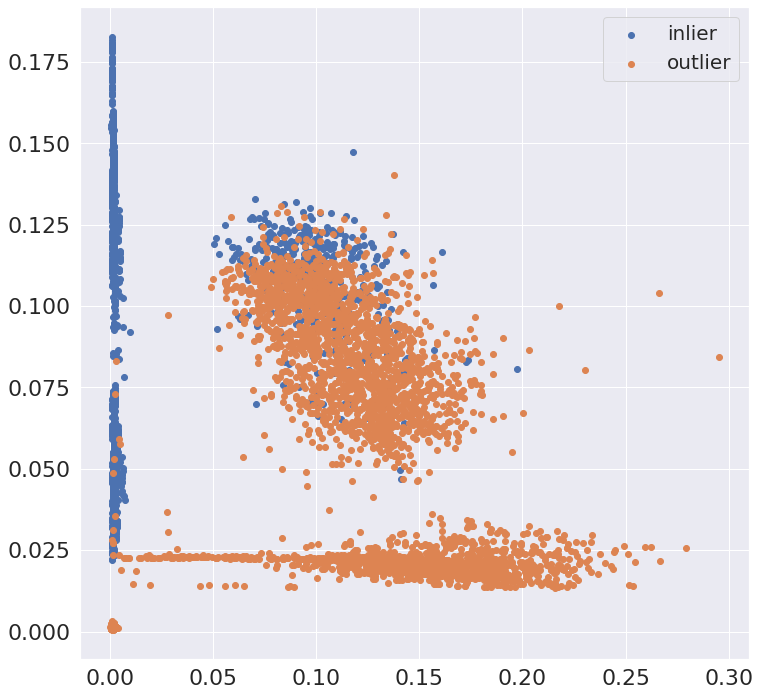

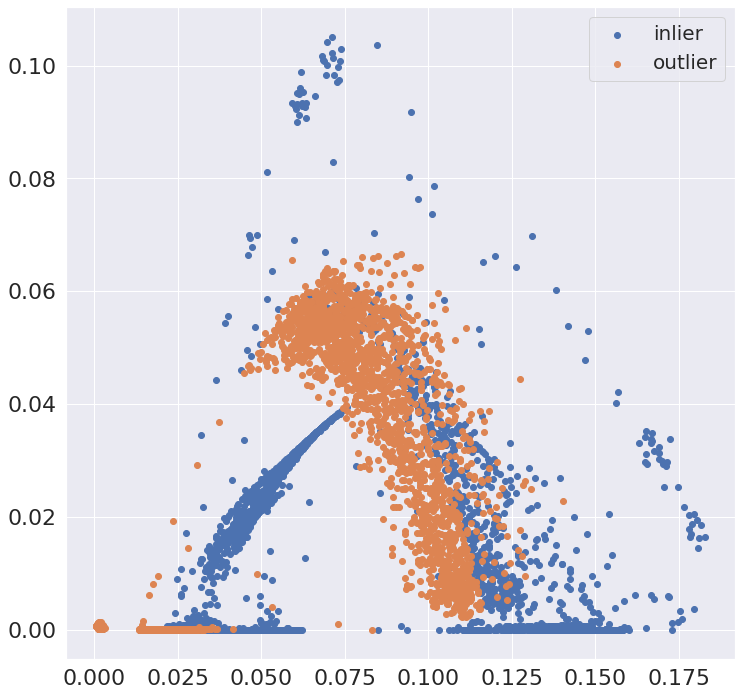

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.592     0.997     0.743      3934
           2      0.991     0.312     0.474      3934

    accuracy                          0.655      7868
   macro avg      0.791     0.655     0.609      7868
weighted avg      0.791     0.655     0.609      7868



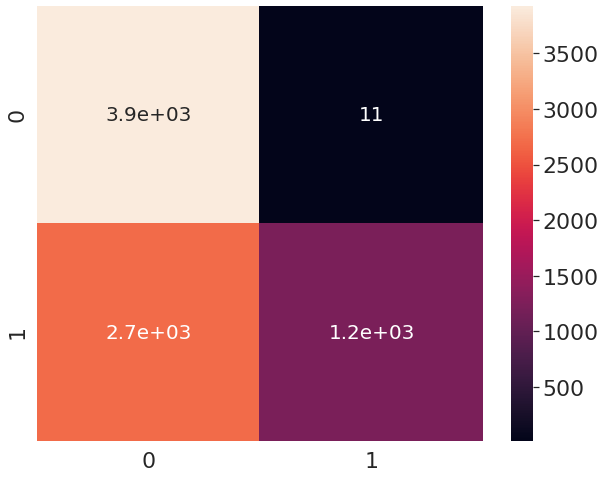

AUC score:  0.6545500762582613


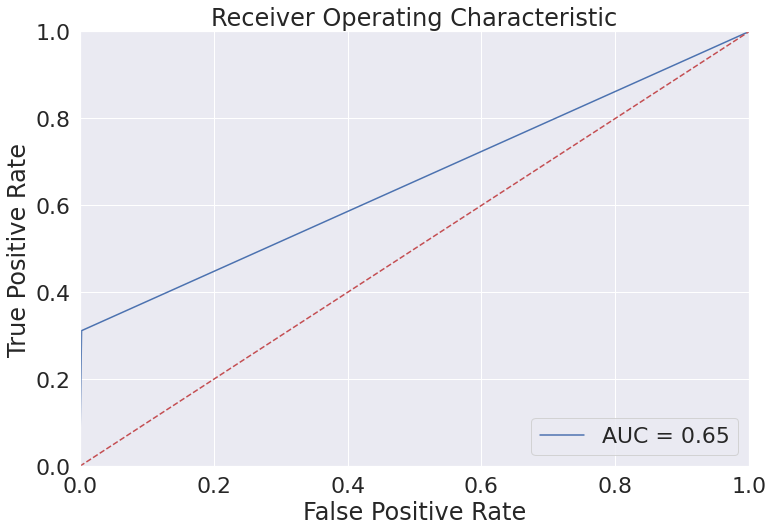

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [65]:
# test on Mirai
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 4) Algo anneal

In [66]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo='anneal', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(18358, 115) (18358,)
------------Scale data-----------------
(18358, 115) (18358,)
X_train_scaled
[[ 3.45794855e-03  5.41440555e-02  3.63262322e-09 ...  5.57415826e-18
   3.81797403e-34  2.25198600e-17]
 [ 4.47850916e-03  1.24129016e-01  6.37556170e-02 ...  1.27110049e-01
  -9.70281479e-02 -2.36053078e-01]
 [ 6.77613648e-03  6.51663165e-02  2.18698960e-04 ...  1.35988519e-01
  -1.59362024e-01 -3.64757266e-01]
 ...
 [ 3.62804962e-03  3.33851152e-01  1.05116699e-02 ...  1.47720813e-01
  -8.32440442e-02 -1.85465097e-01]
 [ 5.45194536e-03  2.84774544e-01  2.93300948e-02 ...  1.04072329e-01
  -4.04594790e-02 -1.14390467e-01]
 [ 3.45794842e-03  3.42912333e-01  0.00000000e+00 ...  9.75485625e-02
  -3.71231151e-02 -1.12811060e-01]]
(18358, 115) (18358,)
---------Normalize data--------------
(18358, 115) (18358,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

Shape:  (7868, 115) (7868,)
----------------------Test is starting----------------------
Scale data
Shape:  (7868, 115) (7868,)
Shape:  (7868, 115) (7868,)
Normalize data
Shape:  (7868, 115) (7868,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.09230336 0.28590386 0.0621819  ... 1.11512877 1.11512877 1.11512877]
Visualize quantization error


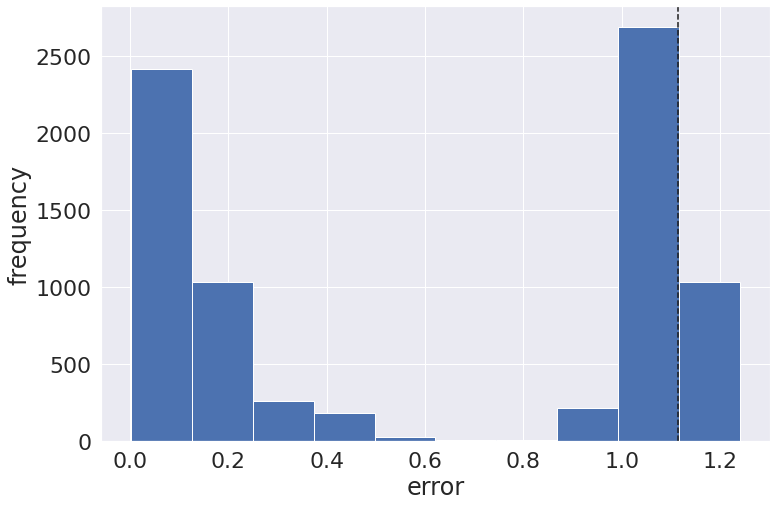

Outliers visualization


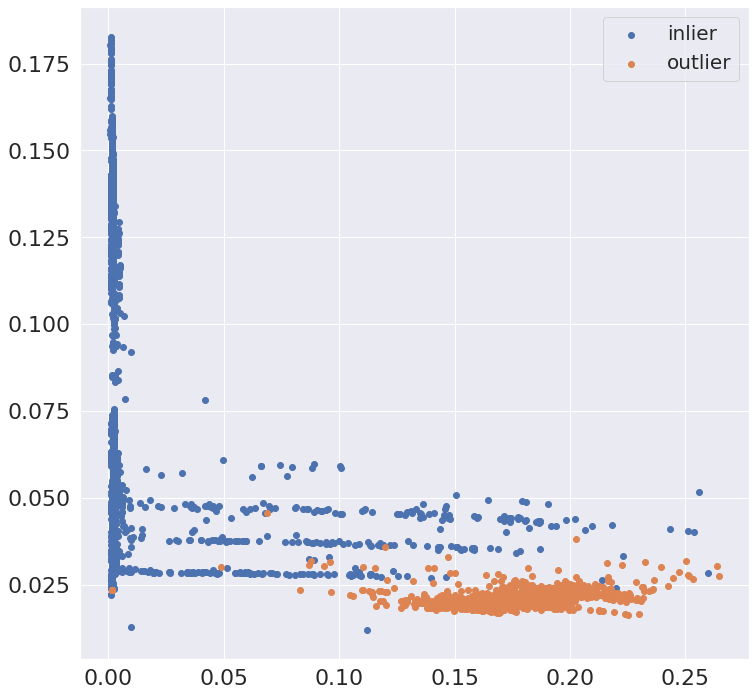

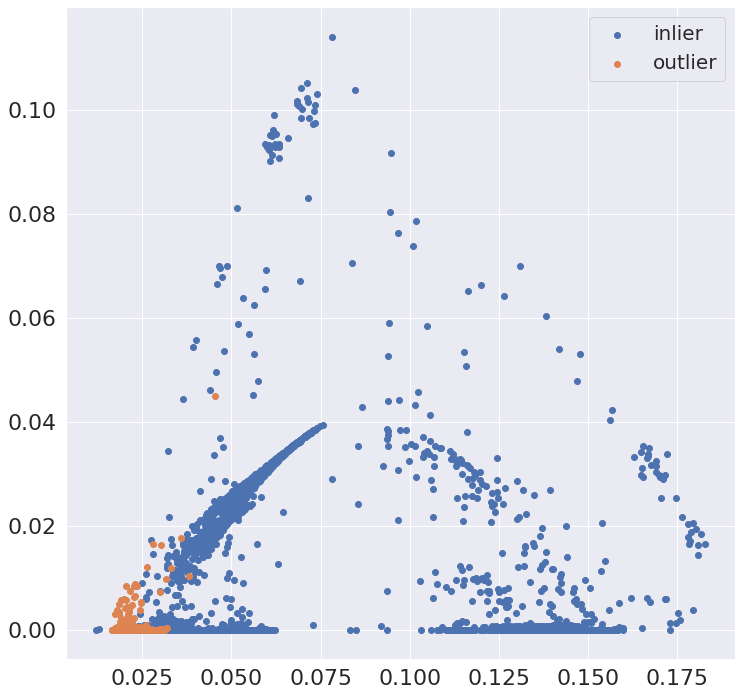

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.996     0.998     0.997      3934
           2      0.998     0.996     0.997      3934

    accuracy                          0.997      7868
   macro avg      0.997     0.997     0.997      7868
weighted avg      0.997     0.997     0.997      7868



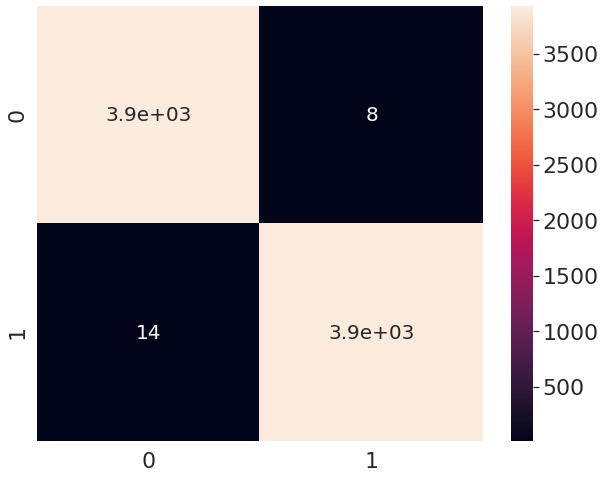

AUC score:  0.9972038637519064


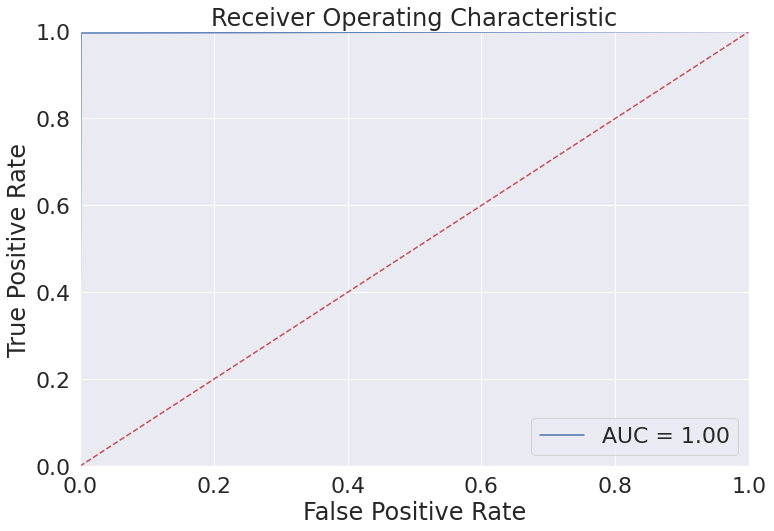

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [67]:
# test on gafgyt
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

Shape:  (7868, 115) (7868,)
----------------------Test is starting----------------------
Scale data
Shape:  (7868, 115) (7868,)
Shape:  (7868, 115) (7868,)
Normalize data
Shape:  (7868, 115) (7868,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.09230336 0.28590386 0.0621819  ... 0.76710301 0.85476843 1.20782894]
Visualize quantization error


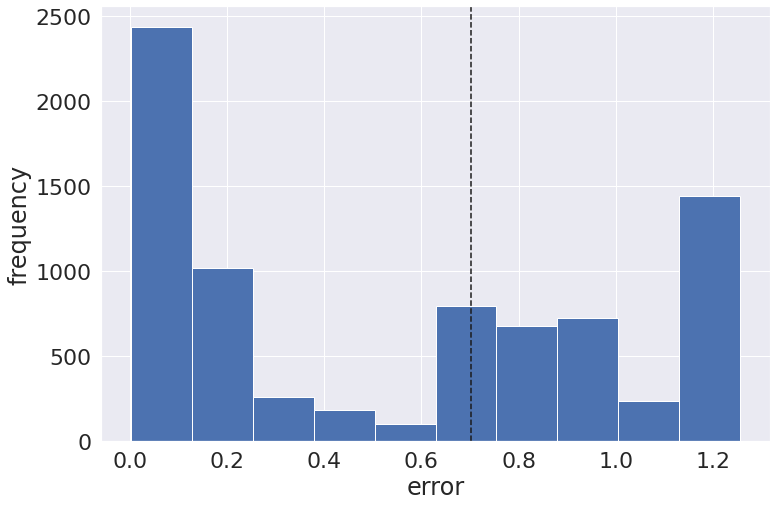

Outliers visualization


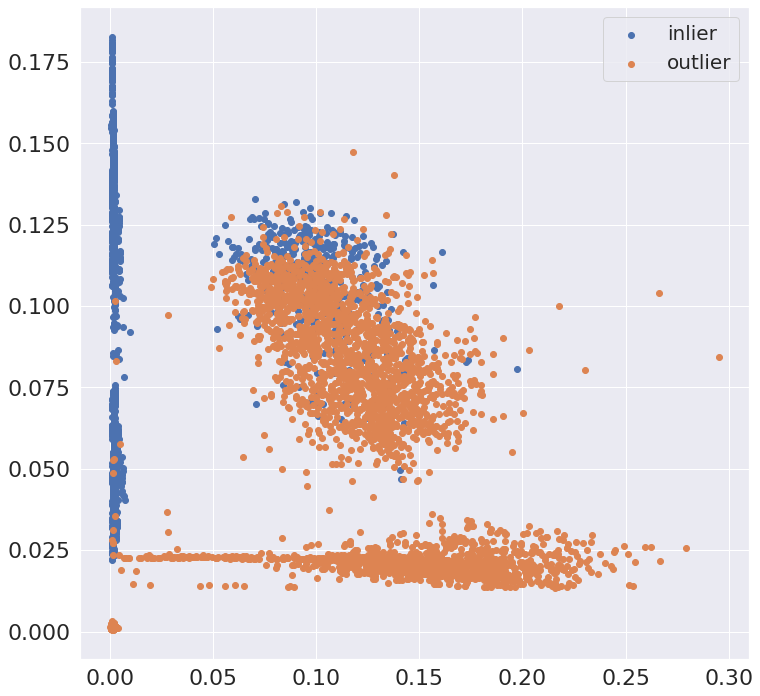

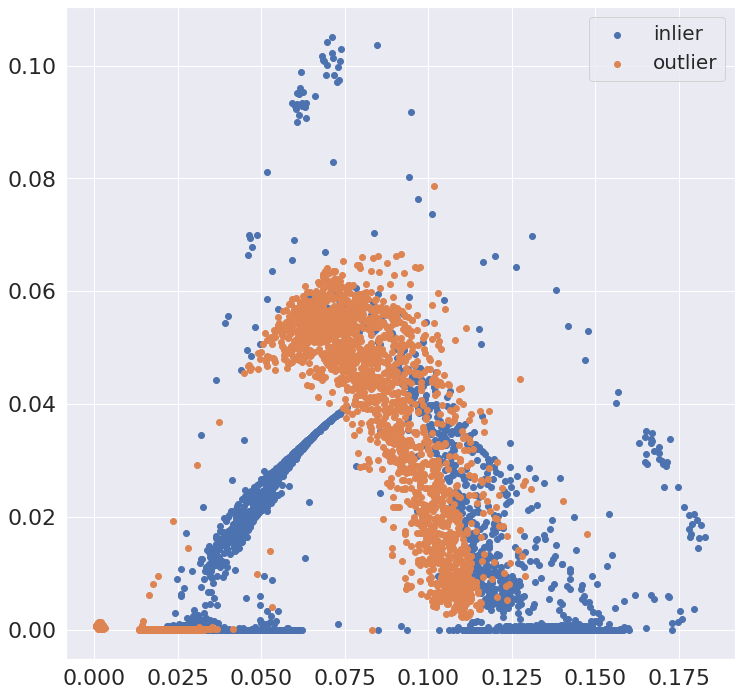

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.570     0.998     0.726      3934
           2      0.992     0.249     0.398      3934

    accuracy                          0.623      7868
   macro avg      0.781     0.623     0.562      7868
weighted avg      0.781     0.623     0.562      7868



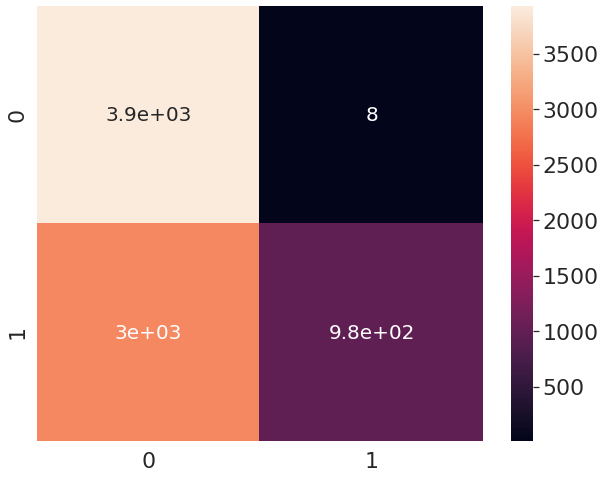

AUC score:  0.623284189120488


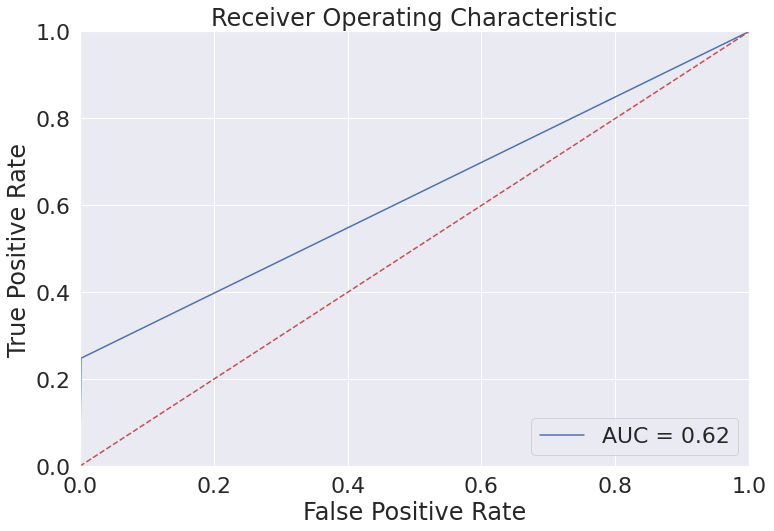

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [68]:
# test on Mirai
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

## 4.2. Train Mirai


## 4.2.4. Ratio 1.0

### 1) Set 15

### Train

In [69]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo=None, som_x=15, som_y=15, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(18358, 115) (18358,)
------------Scale data-----------------
(18358, 115) (18358,)
X_train_scaled
[[ 2.31515042e-03  5.41440555e-02  3.63262322e-09 ...  5.57415826e-18
   1.12256067e-33  4.99340799e-17]
 [ 2.99843163e-03  1.24129016e-01  6.37556170e-02 ...  1.27110049e-01
  -2.85282147e-01 -5.23408817e-01]
 [ 4.53672891e-03  6.51663165e-02  2.18698960e-04 ...  1.35988519e-01
  -4.68556201e-01 -8.08789153e-01]
 ...
 [ 2.42903573e-03  3.33851152e-01  1.05116699e-02 ...  1.47720813e-01
  -2.44754127e-01 -4.11238303e-01]
 [ 3.65016233e-03  2.84774544e-01  2.93300948e-02 ...  1.04072329e-01
  -1.18958954e-01 -2.53642017e-01]
 [ 2.31515033e-03  3.42912333e-01  0.00000000e+00 ...  9.75485625e-02
  -1.09149378e-01 -2.50139944e-01]]
(18358, 115) (18358,)
---------Normalize data--------------
(18358, 115) (18358,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

### Test on the same device

#### Test on gafgyt

Shape:  (7868, 115) (7868,)
----------------------Test is starting----------------------
Scale data
Shape:  (7868, 115) (7868,)
Shape:  (7868, 115) (7868,)
Normalize data
Shape:  (7868, 115) (7868,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.13629142 0.31684841 0.05900364 ... 1.22292666 1.22292665 1.22292665]
Visualize quantization error


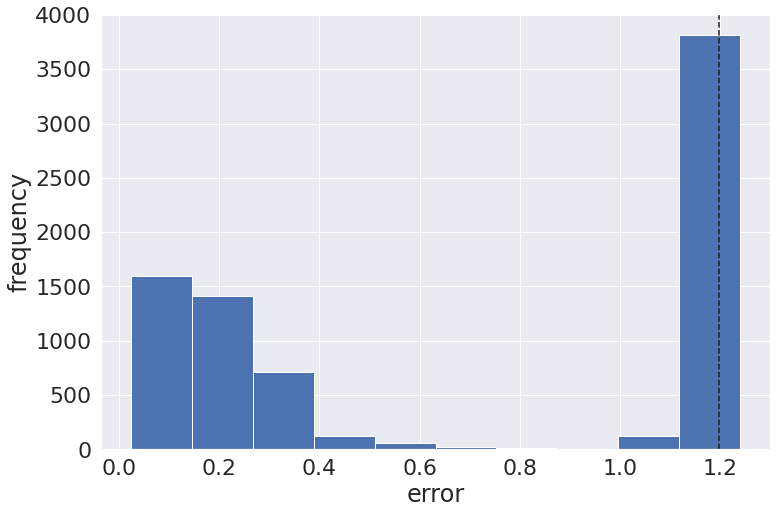

Outliers visualization


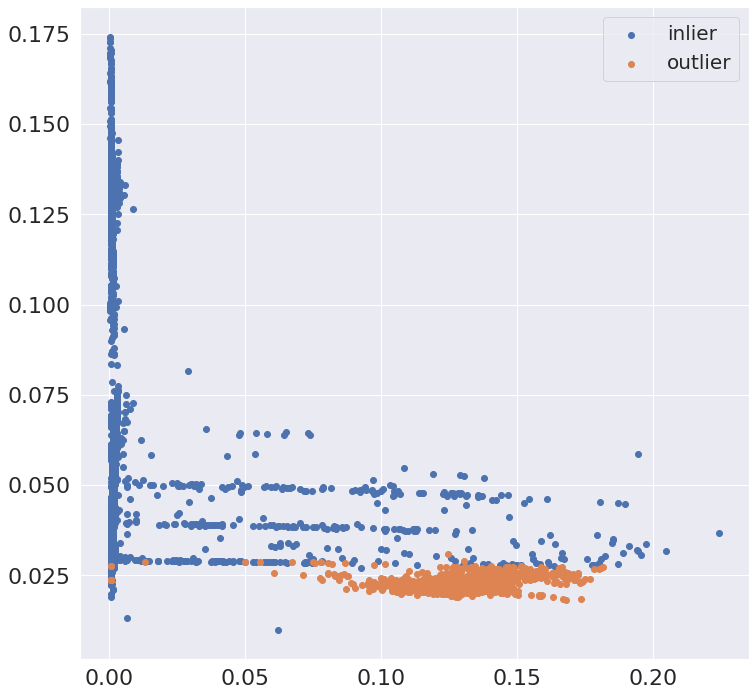

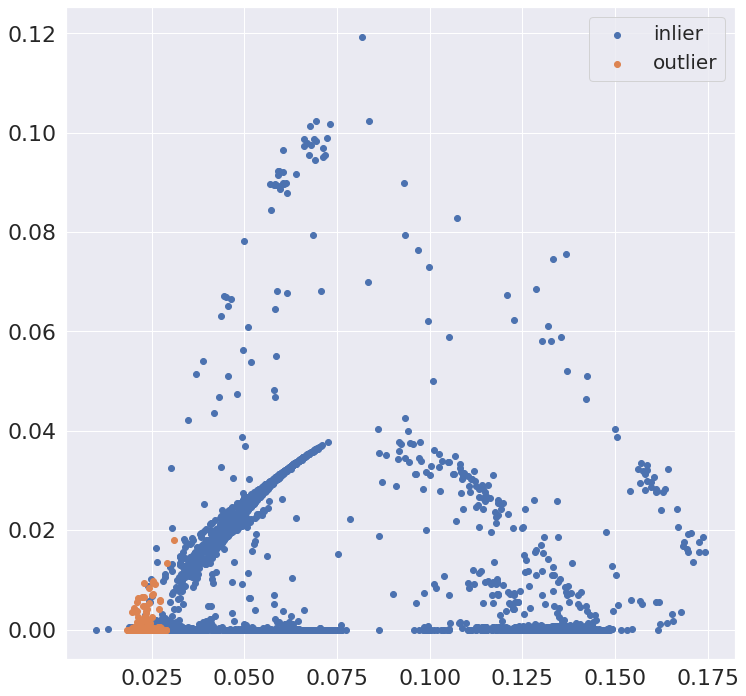

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.971     0.928     0.949      3934
           2      0.931     0.973     0.951      3934

    accuracy                          0.950      7868
   macro avg      0.951     0.950     0.950      7868
weighted avg      0.951     0.950     0.950      7868



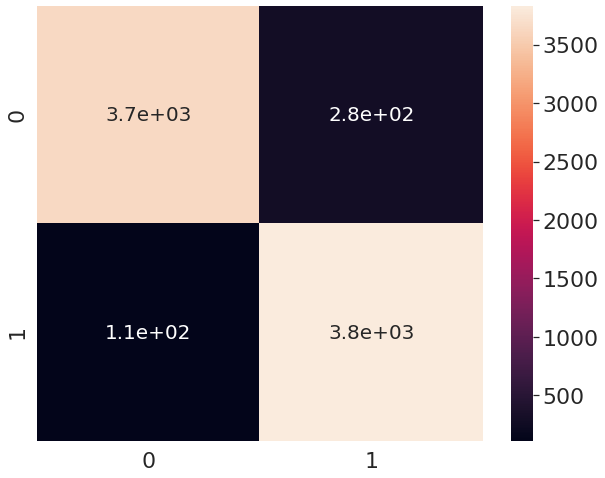

AUC score:  0.9503050330452465


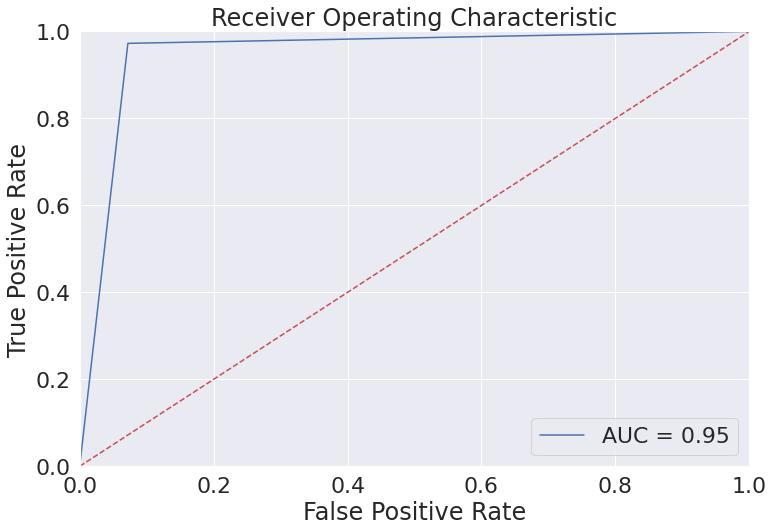

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [70]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (7868, 115) (7868,)
----------------------Test is starting----------------------
Scale data
Shape:  (7868, 115) (7868,)
Shape:  (7868, 115) (7868,)
Normalize data
Shape:  (7868, 115) (7868,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.13629142 0.31684841 0.05900364 ... 0.66438985 0.75081341 1.21069916]
Visualize quantization error


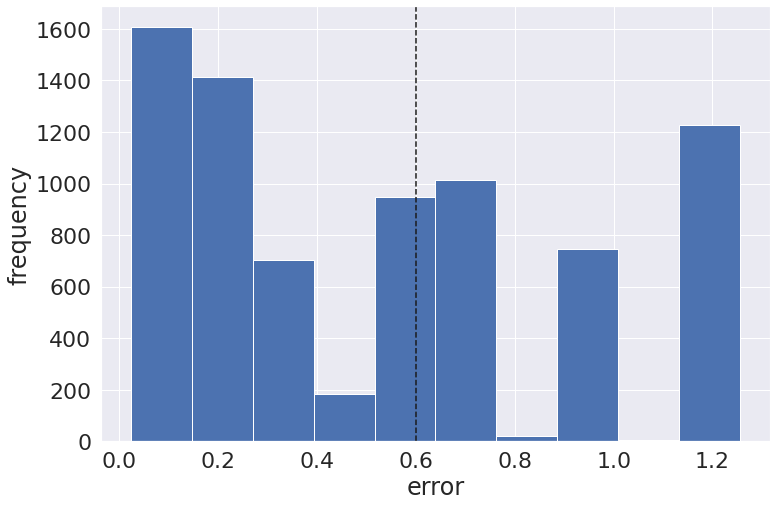

Outliers visualization


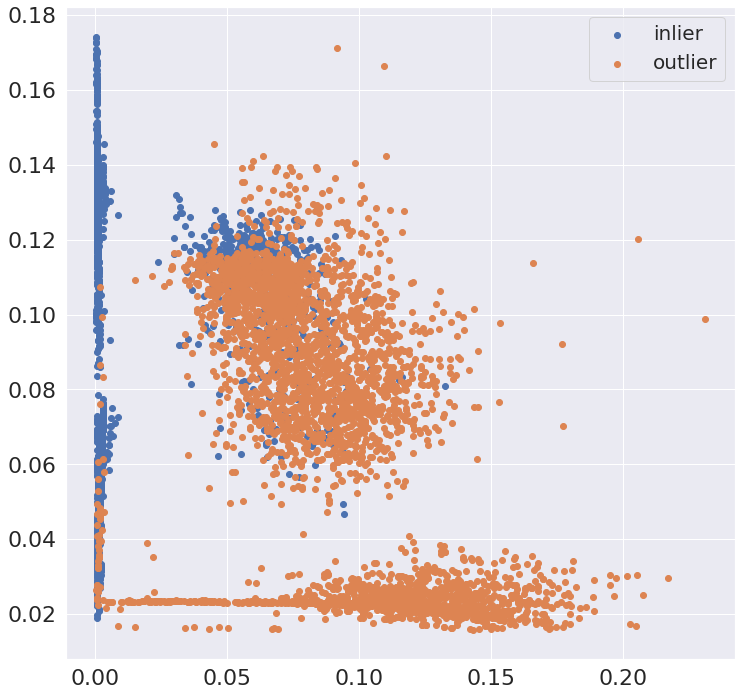

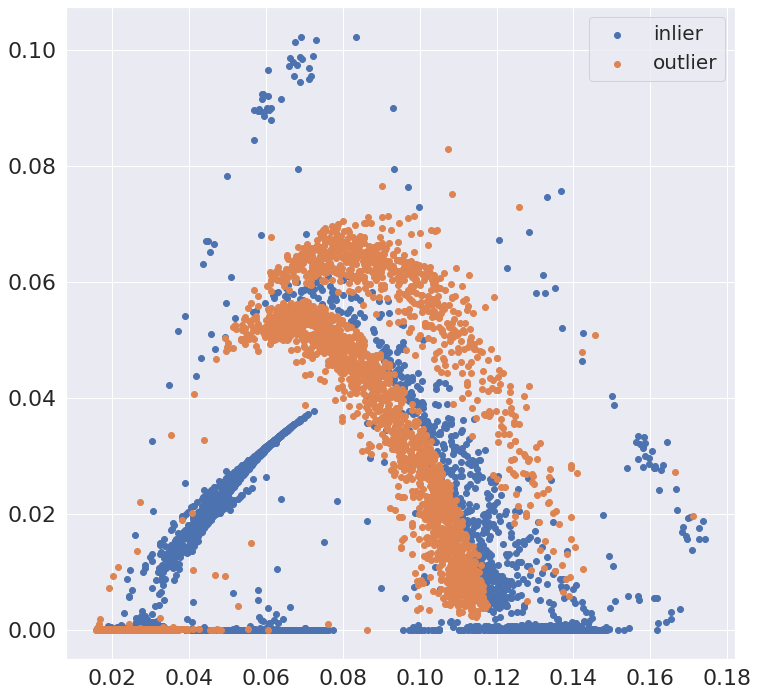

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.928     0.962      3934
           2      0.933     0.998     0.964      3934

    accuracy                          0.963      7868
   macro avg      0.965     0.963     0.963      7868
weighted avg      0.965     0.963     0.963      7868



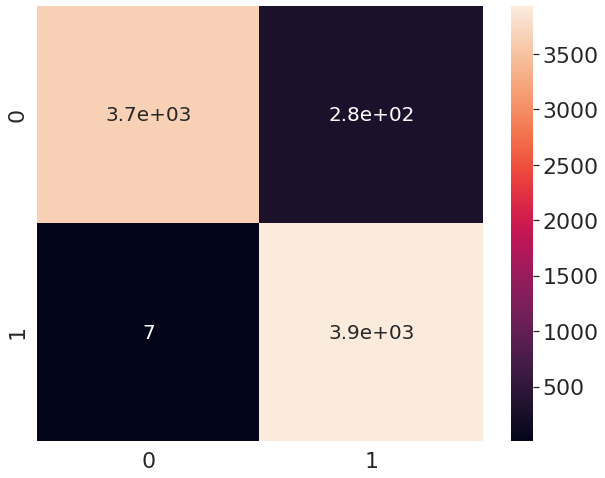

AUC score:  0.9631418403660396


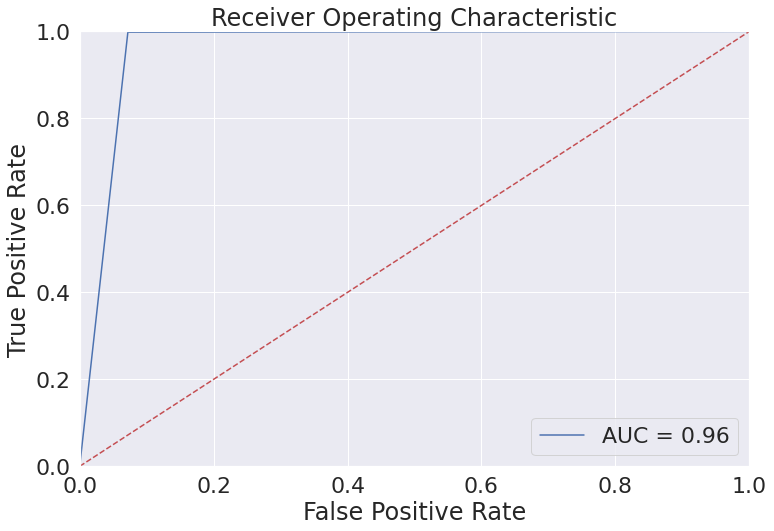

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [71]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 2) Set 22 (recommend size)

### Train

In [72]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo=None, som_x=22, som_y=22, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(18358, 115) (18358,)
------------Scale data-----------------
(18358, 115) (18358,)
X_train_scaled
[[ 2.31515042e-03  5.41440555e-02  3.63262322e-09 ...  5.57415826e-18
   1.12256067e-33  4.99340799e-17]
 [ 2.99843163e-03  1.24129016e-01  6.37556170e-02 ...  1.27110049e-01
  -2.85282147e-01 -5.23408817e-01]
 [ 4.53672891e-03  6.51663165e-02  2.18698960e-04 ...  1.35988519e-01
  -4.68556201e-01 -8.08789153e-01]
 ...
 [ 2.42903573e-03  3.33851152e-01  1.05116699e-02 ...  1.47720813e-01
  -2.44754127e-01 -4.11238303e-01]
 [ 3.65016233e-03  2.84774544e-01  2.93300948e-02 ...  1.04072329e-01
  -1.18958954e-01 -2.53642017e-01]
 [ 2.31515033e-03  3.42912333e-01  0.00000000e+00 ...  9.75485625e-02
  -1.09149378e-01 -2.50139944e-01]]
(18358, 115) (18358,)
---------Normalize data--------------
(18358, 115) (18358,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

### Test on the same device

#### Test on gafgyt

Shape:  (7868, 115) (7868,)
----------------------Test is starting----------------------
Scale data
Shape:  (7868, 115) (7868,)
Shape:  (7868, 115) (7868,)
Normalize data
Shape:  (7868, 115) (7868,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.12797632 0.27187736 0.05011343 ... 1.16715831 1.1671583  1.1671583 ]
Visualize quantization error


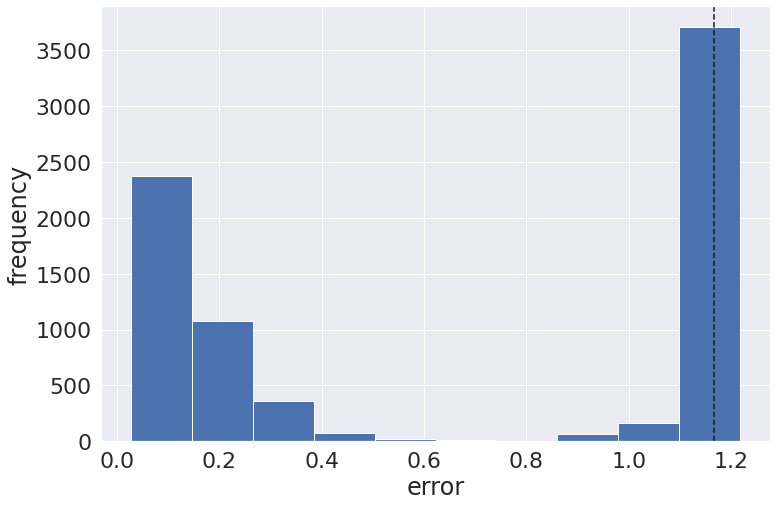

Outliers visualization


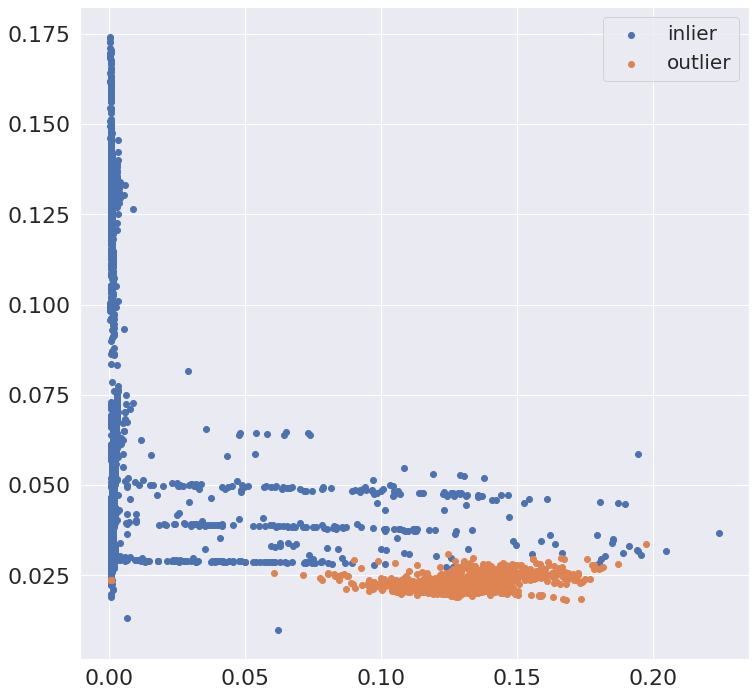

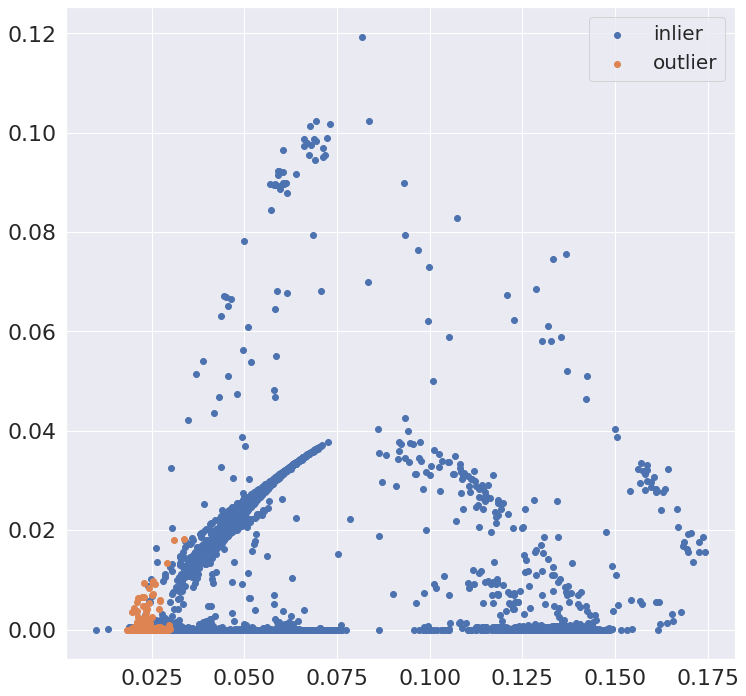

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.930     0.999     0.963      3934
           2      0.999     0.924     0.960      3934

    accuracy                          0.961      7868
   macro avg      0.964     0.961     0.961      7868
weighted avg      0.964     0.961     0.961      7868



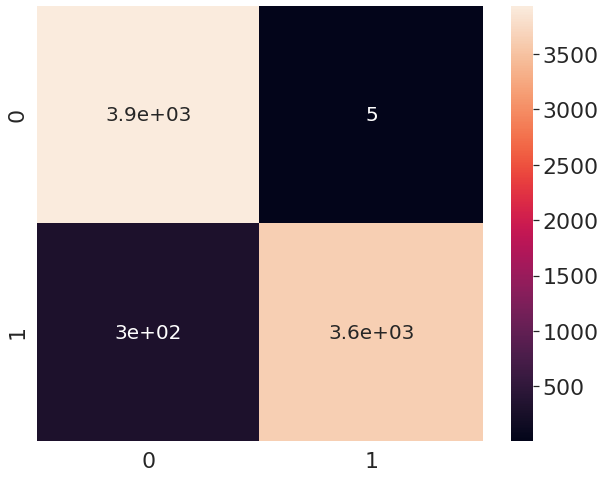

AUC score:  0.9614895780376207


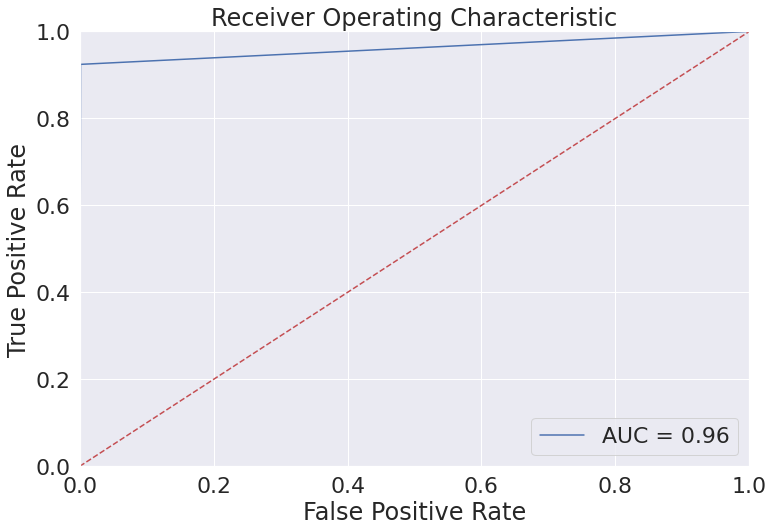

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [73]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (7868, 115) (7868,)
----------------------Test is starting----------------------
Scale data
Shape:  (7868, 115) (7868,)
Shape:  (7868, 115) (7868,)
Normalize data
Shape:  (7868, 115) (7868,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.12797632 0.27187736 0.05011343 ... 0.63745596 0.72934233 1.19055666]
Visualize quantization error


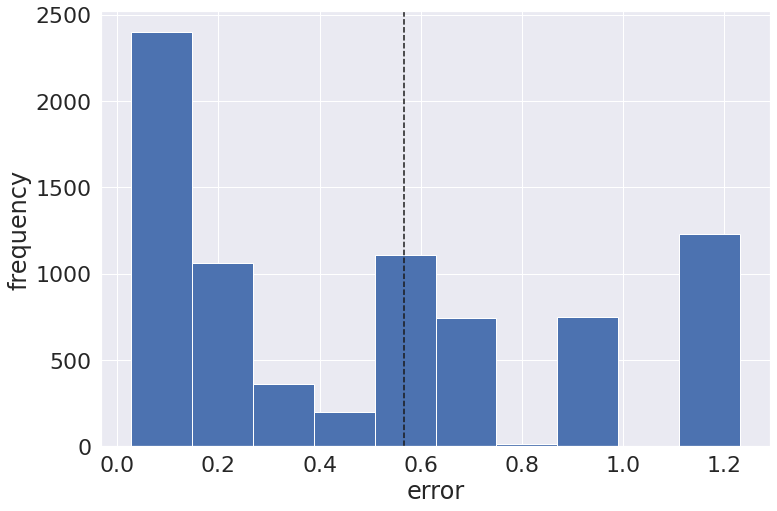

Outliers visualization


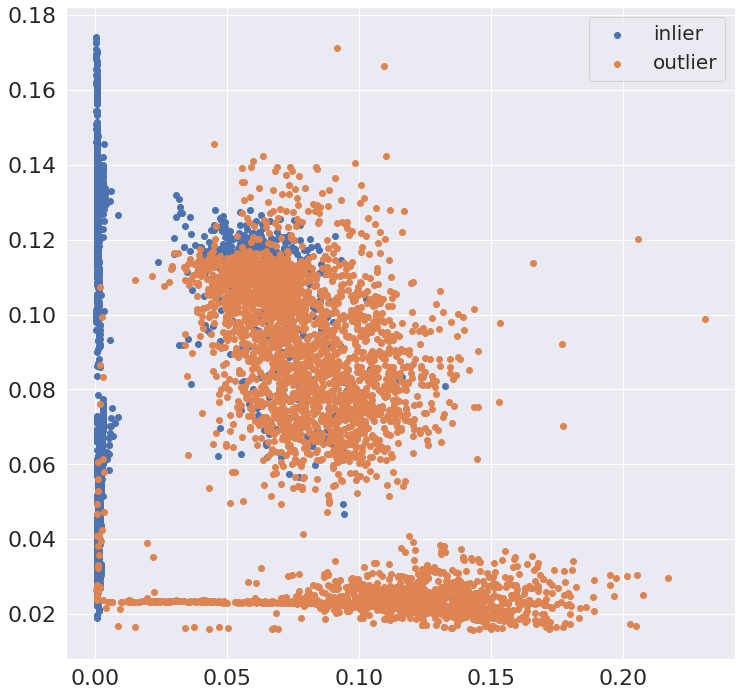

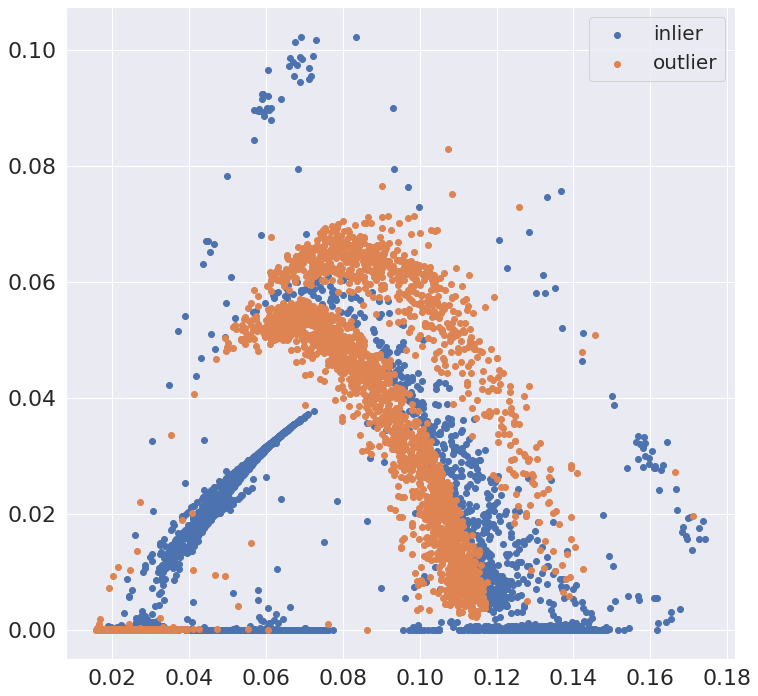

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.999     0.999     0.999      3934
           2      0.999     0.999     0.999      3934

    accuracy                          0.999      7868
   macro avg      0.999     0.999     0.999      7868
weighted avg      0.999     0.999     0.999      7868



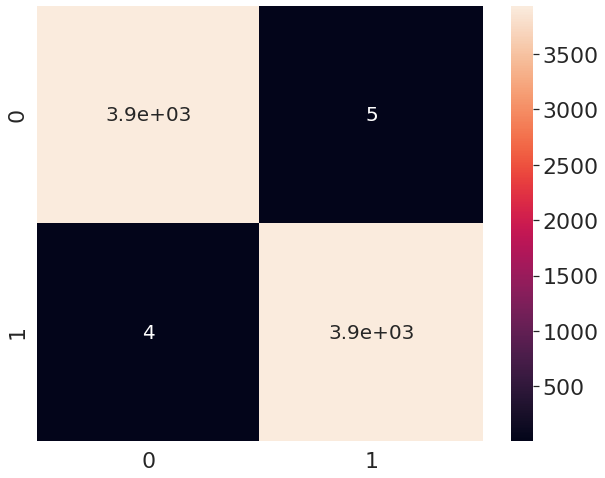

AUC score:  0.9988561260803255


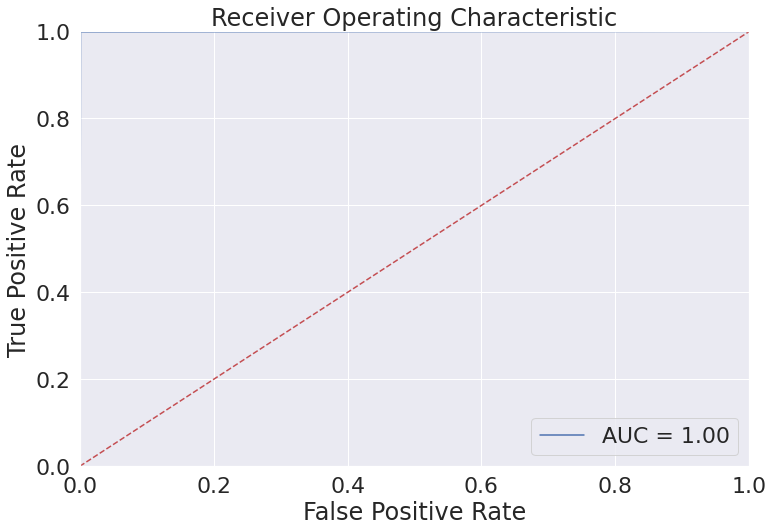

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [74]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 3) Set 30

### Train

In [75]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo=None, som_x=30, som_y=30, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(18358, 115) (18358,)
------------Scale data-----------------
(18358, 115) (18358,)
X_train_scaled
[[ 2.31515042e-03  5.41440555e-02  3.63262322e-09 ...  5.57415826e-18
   1.12256067e-33  4.99340799e-17]
 [ 2.99843163e-03  1.24129016e-01  6.37556170e-02 ...  1.27110049e-01
  -2.85282147e-01 -5.23408817e-01]
 [ 4.53672891e-03  6.51663165e-02  2.18698960e-04 ...  1.35988519e-01
  -4.68556201e-01 -8.08789153e-01]
 ...
 [ 2.42903573e-03  3.33851152e-01  1.05116699e-02 ...  1.47720813e-01
  -2.44754127e-01 -4.11238303e-01]
 [ 3.65016233e-03  2.84774544e-01  2.93300948e-02 ...  1.04072329e-01
  -1.18958954e-01 -2.53642017e-01]
 [ 2.31515033e-03  3.42912333e-01  0.00000000e+00 ...  9.75485625e-02
  -1.09149378e-01 -2.50139944e-01]]
(18358, 115) (18358,)
---------Normalize data--------------
(18358, 115) (18358,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

### Test on the same device

#### Test on gafgyt

Shape:  (7868, 115) (7868,)
----------------------Test is starting----------------------
Scale data
Shape:  (7868, 115) (7868,)
Shape:  (7868, 115) (7868,)
Normalize data
Shape:  (7868, 115) (7868,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.06207848 0.28754812 0.03998175 ... 1.2323619  1.23236189 1.23236189]
Visualize quantization error


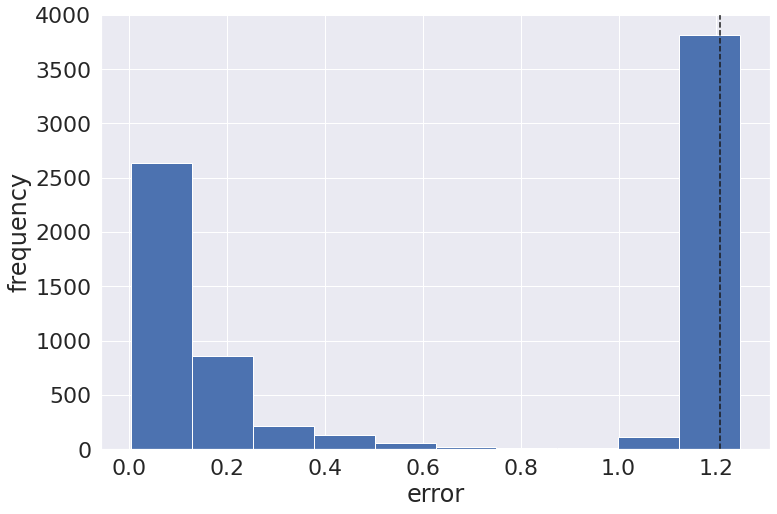

Outliers visualization


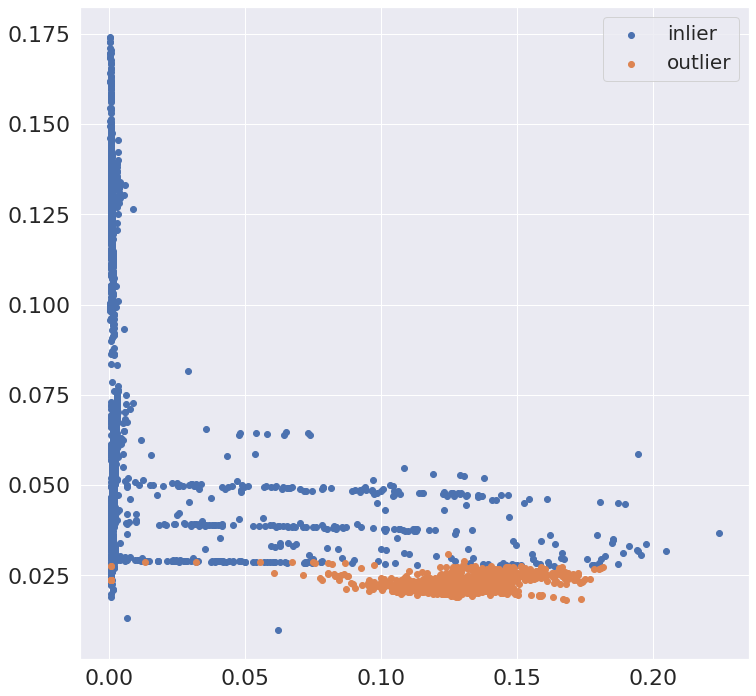

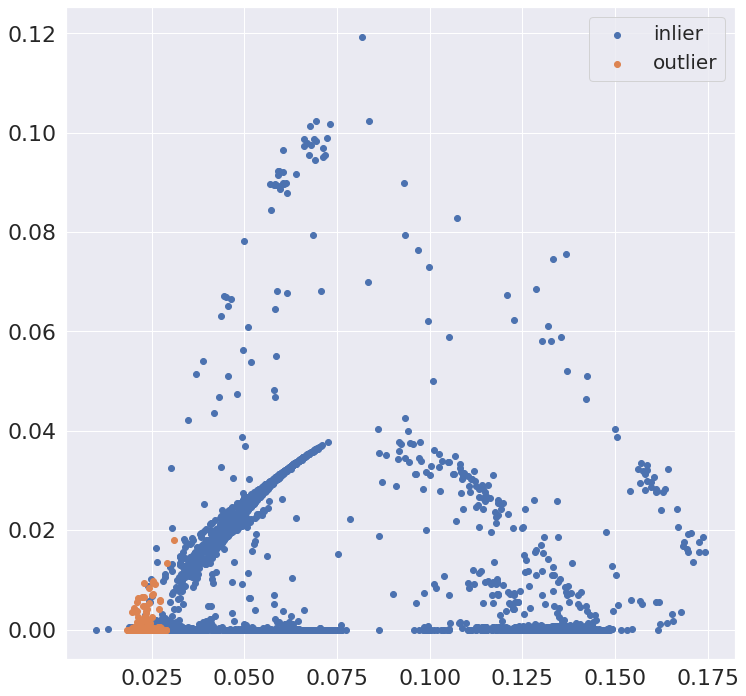

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.995     0.998     0.996      3934
           2      0.998     0.995     0.996      3934

    accuracy                          0.996      7868
   macro avg      0.996     0.996     0.996      7868
weighted avg      0.996     0.996     0.996      7868



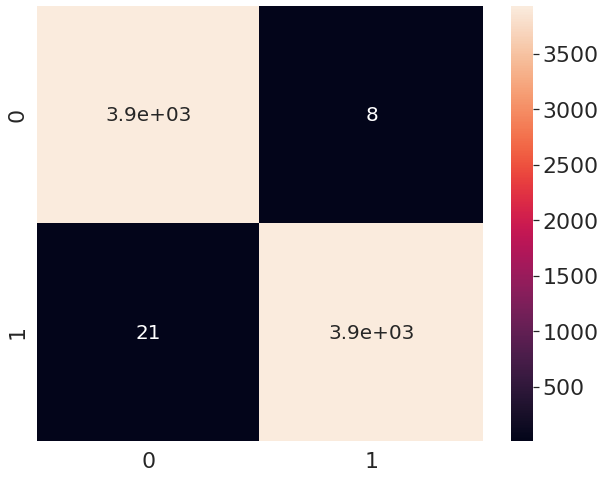

AUC score:  0.996314184036604


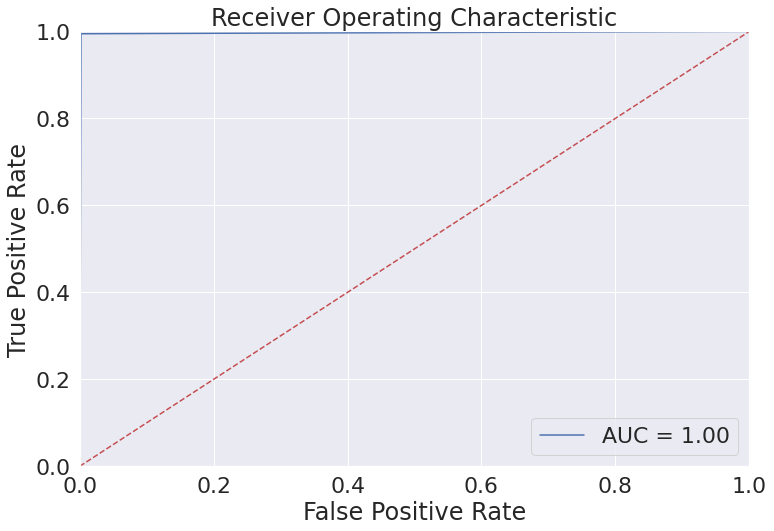

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [76]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (7868, 115) (7868,)
----------------------Test is starting----------------------
Scale data
Shape:  (7868, 115) (7868,)
Shape:  (7868, 115) (7868,)
Normalize data
Shape:  (7868, 115) (7868,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.06207848 0.28754812 0.03998175 ... 0.64116897 0.73211602 1.22043817]
Visualize quantization error


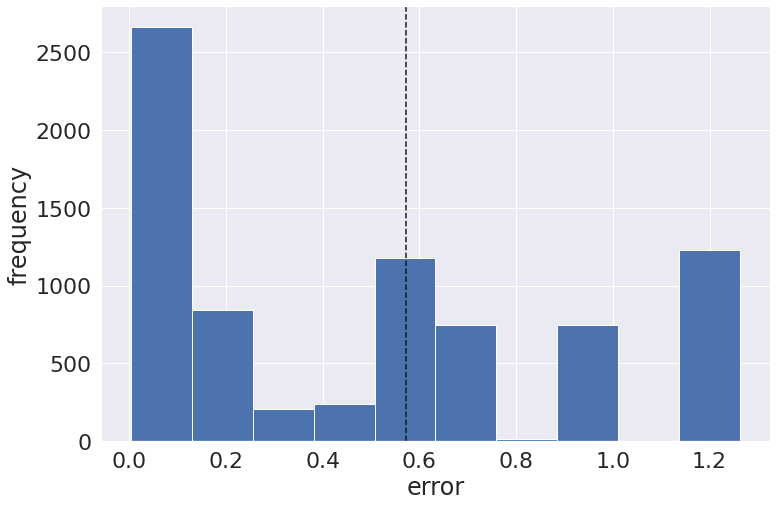

Outliers visualization


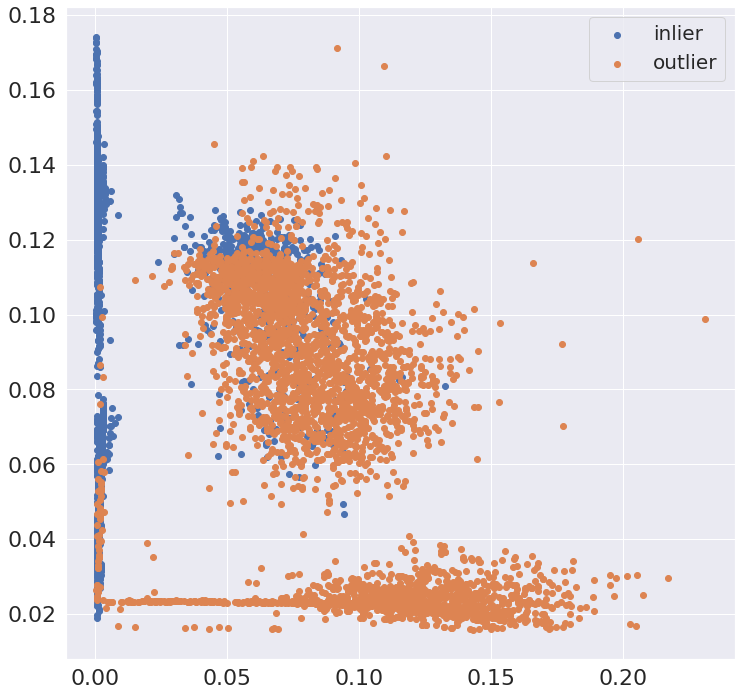

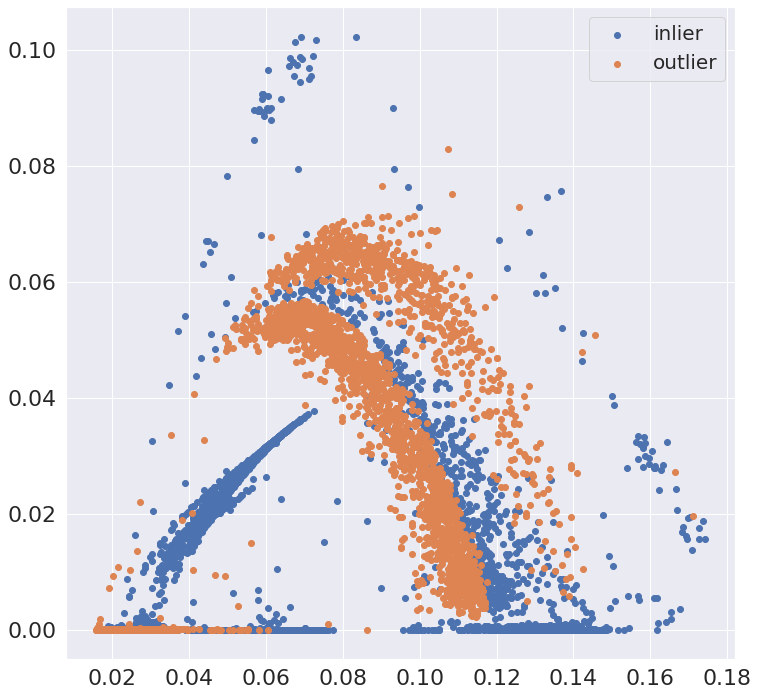

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.999     0.998     0.999      3934
           2      0.998     0.999     0.999      3934

    accuracy                          0.999      7868
   macro avg      0.999     0.999     0.999      7868
weighted avg      0.999     0.999     0.999      7868



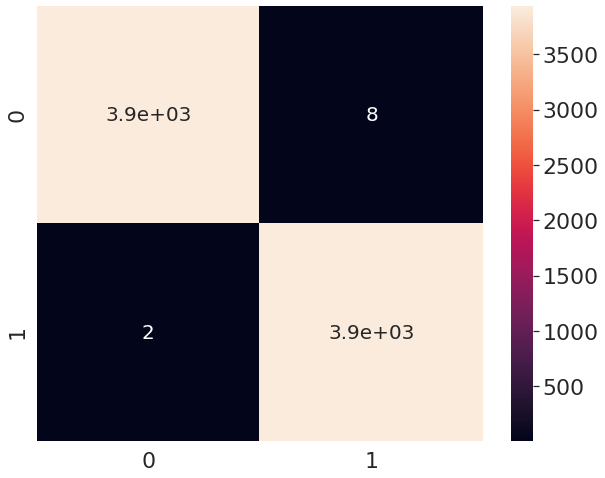

AUC score:  0.9987290289781393


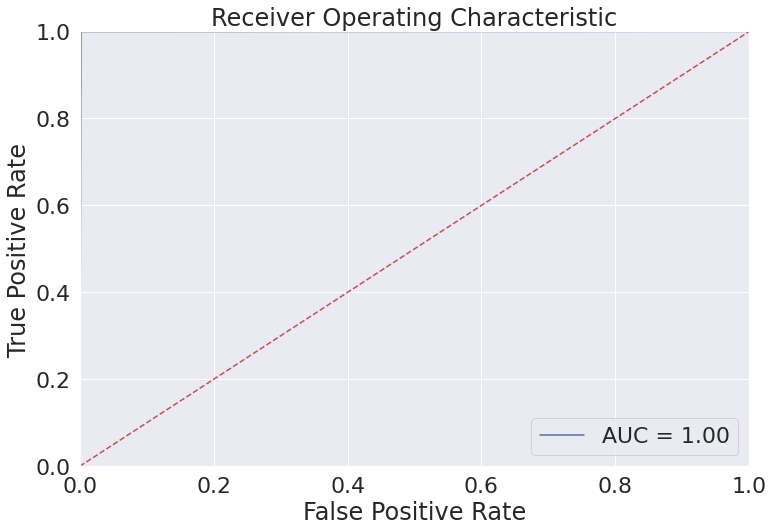

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [77]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 4) Set 45

### Train

In [78]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo=None, som_x=45, som_y=45, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(18358, 115) (18358,)
------------Scale data-----------------
(18358, 115) (18358,)
X_train_scaled
[[ 2.31515042e-03  5.41440555e-02  3.63262322e-09 ...  5.57415826e-18
   1.12256067e-33  4.99340799e-17]
 [ 2.99843163e-03  1.24129016e-01  6.37556170e-02 ...  1.27110049e-01
  -2.85282147e-01 -5.23408817e-01]
 [ 4.53672891e-03  6.51663165e-02  2.18698960e-04 ...  1.35988519e-01
  -4.68556201e-01 -8.08789153e-01]
 ...
 [ 2.42903573e-03  3.33851152e-01  1.05116699e-02 ...  1.47720813e-01
  -2.44754127e-01 -4.11238303e-01]
 [ 3.65016233e-03  2.84774544e-01  2.93300948e-02 ...  1.04072329e-01
  -1.18958954e-01 -2.53642017e-01]
 [ 2.31515033e-03  3.42912333e-01  0.00000000e+00 ...  9.75485625e-02
  -1.09149378e-01 -2.50139944e-01]]
(18358, 115) (18358,)
---------Normalize data--------------
(18358, 115) (18358,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

### Test on the same device

#### Test on gafgyt

Shape:  (7868, 115) (7868,)
----------------------Test is starting----------------------
Scale data
Shape:  (7868, 115) (7868,)
Shape:  (7868, 115) (7868,)
Normalize data
Shape:  (7868, 115) (7868,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.08681246 0.15240177 0.03228331 ... 1.12248993 1.12248992 1.12248992]
Visualize quantization error


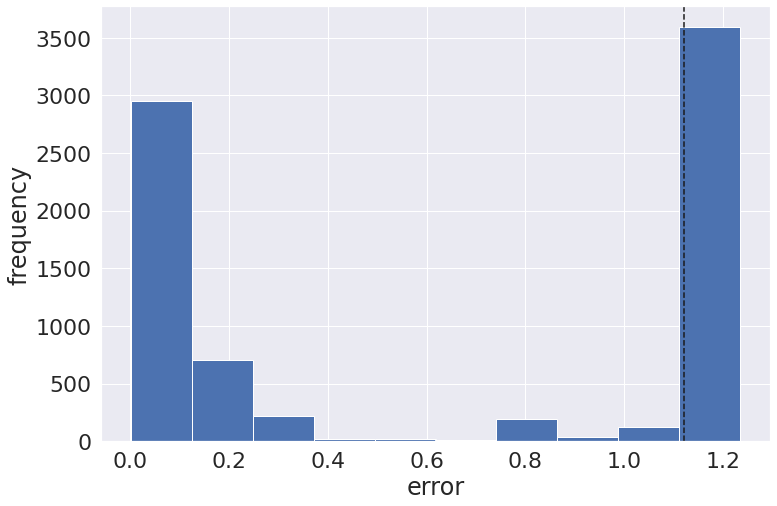

Outliers visualization


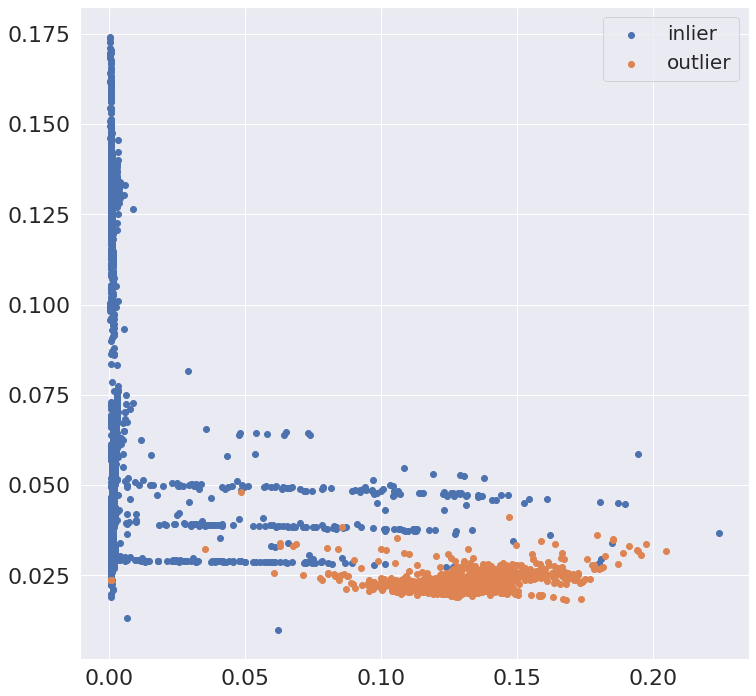

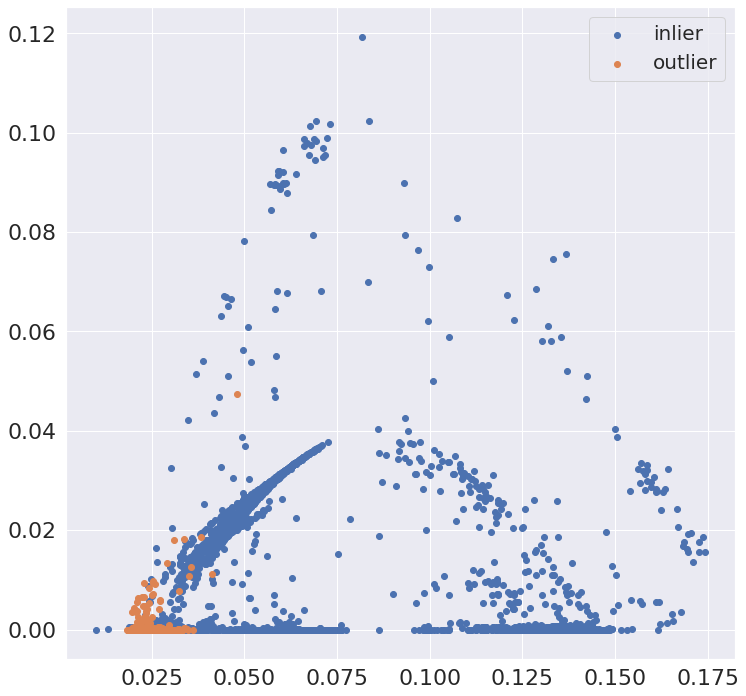

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.996     0.997     0.997      3934
           2      0.997     0.996     0.997      3934

    accuracy                          0.997      7868
   macro avg      0.997     0.997     0.997      7868
weighted avg      0.997     0.997     0.997      7868



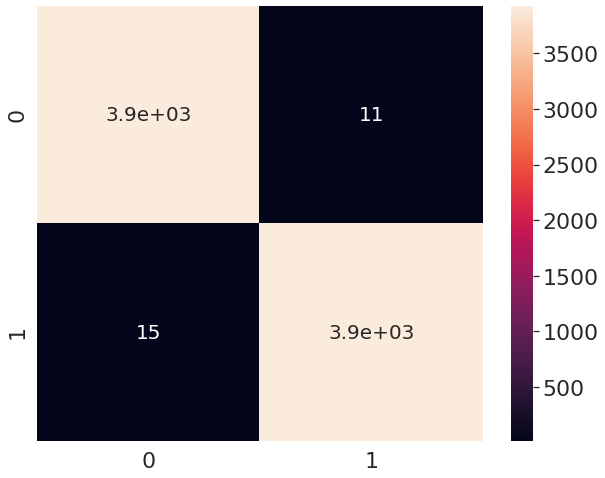

AUC score:  0.9966954753431622


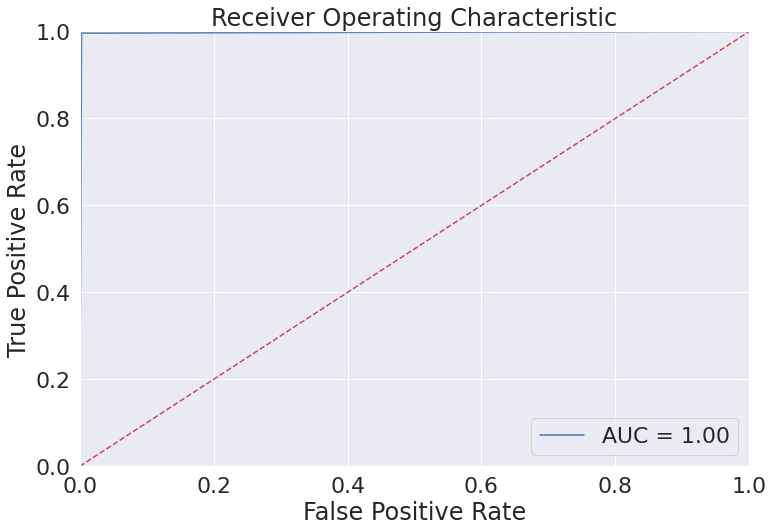

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [79]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (7868, 115) (7868,)
----------------------Test is starting----------------------
Scale data
Shape:  (7868, 115) (7868,)
Shape:  (7868, 115) (7868,)
Normalize data
Shape:  (7868, 115) (7868,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.08681246 0.15240177 0.03228331 ... 0.63542807 0.72599528 1.20331947]
Visualize quantization error


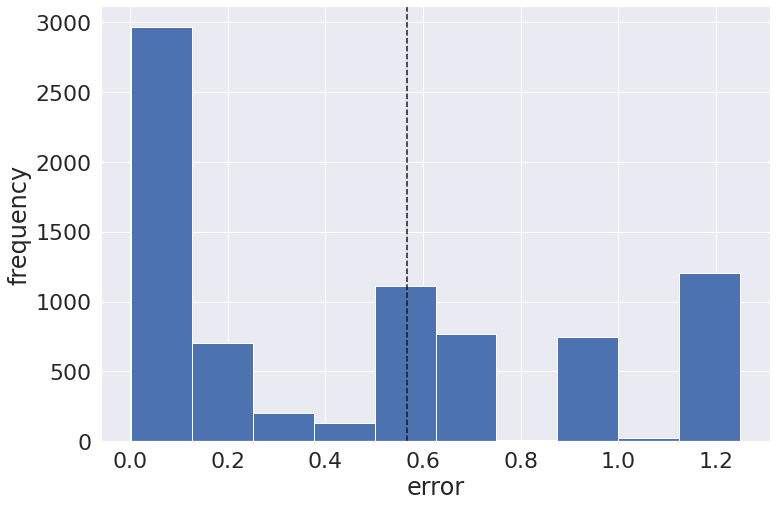

Outliers visualization


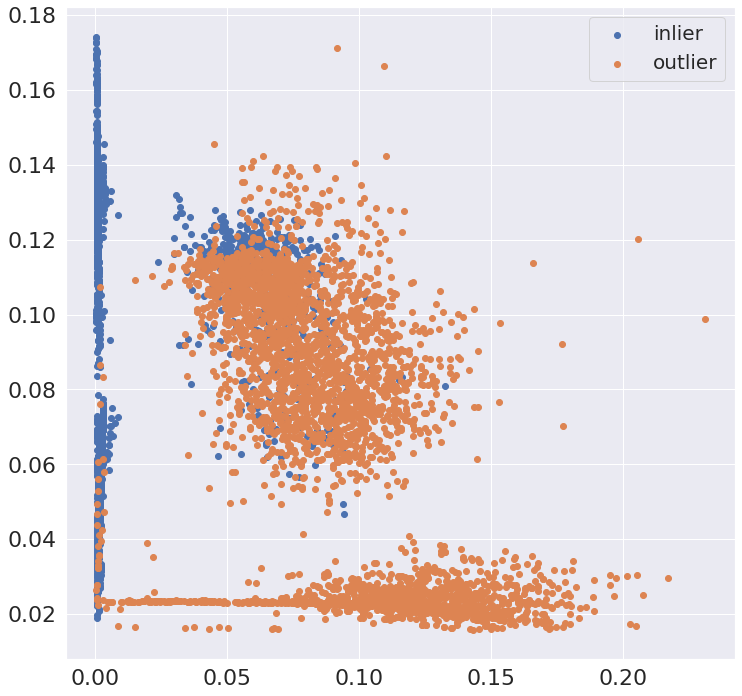

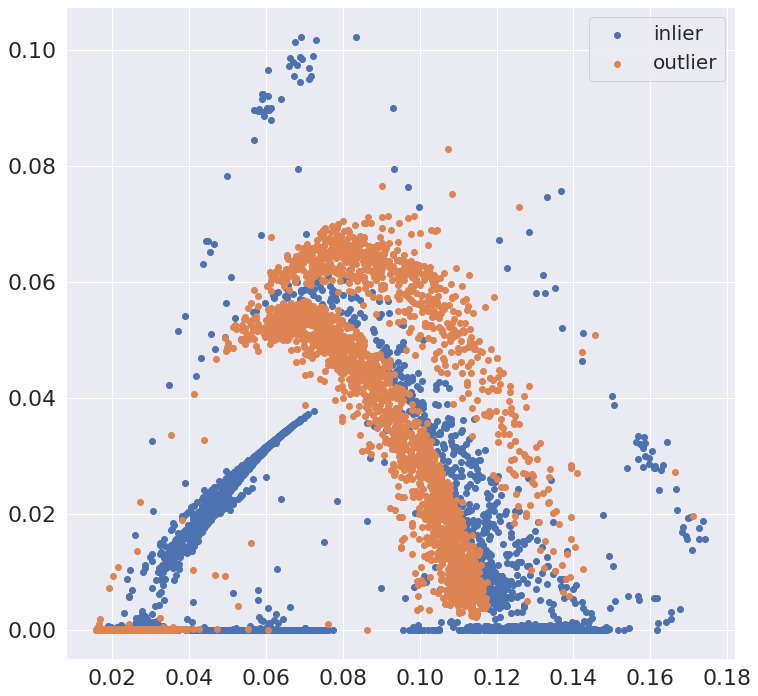

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.997     0.998      3934
           2      0.997     0.998     0.998      3934

    accuracy                          0.998      7868
   macro avg      0.998     0.998     0.998      7868
weighted avg      0.998     0.998     0.998      7868



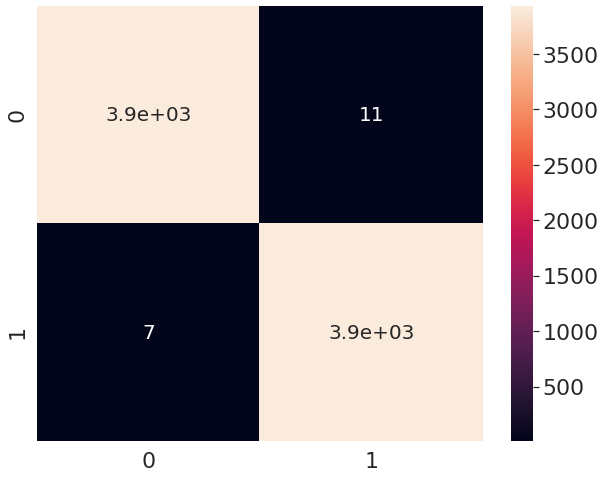

AUC score:  0.9977122521606507


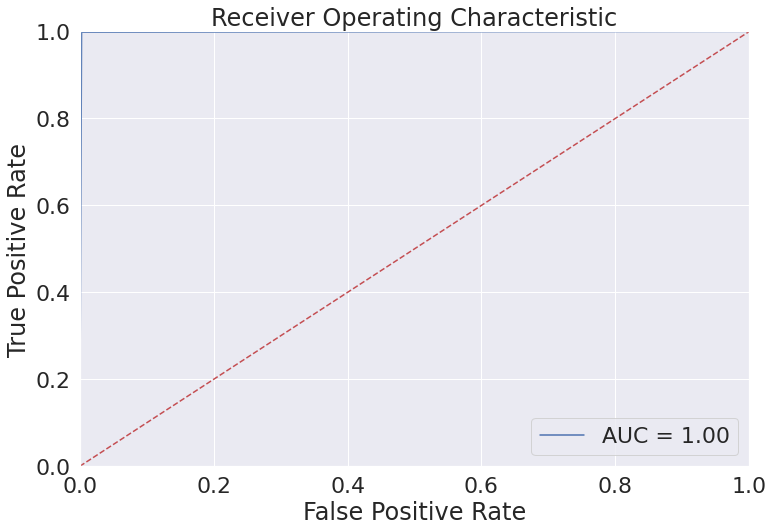

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [80]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)


### 1) Algo tpe

### Train

In [81]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo='tpe', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(18358, 115) (18358,)
------------Scale data-----------------
(18358, 115) (18358,)
X_train_scaled
[[ 2.31515042e-03  5.41440555e-02  3.63262322e-09 ...  5.57415826e-18
   1.12256067e-33  4.99340799e-17]
 [ 2.99843163e-03  1.24129016e-01  6.37556170e-02 ...  1.27110049e-01
  -2.85282147e-01 -5.23408817e-01]
 [ 4.53672891e-03  6.51663165e-02  2.18698960e-04 ...  1.35988519e-01
  -4.68556201e-01 -8.08789153e-01]
 ...
 [ 2.42903573e-03  3.33851152e-01  1.05116699e-02 ...  1.47720813e-01
  -2.44754127e-01 -4.11238303e-01]
 [ 3.65016233e-03  2.84774544e-01  2.93300948e-02 ...  1.04072329e-01
  -1.18958954e-01 -2.53642017e-01]
 [ 2.31515033e-03  3.42912333e-01  0.00000000e+00 ...  9.75485625e-02
  -1.09149378e-01 -2.50139944e-01]]
(18358, 115) (18358,)
---------Normalize data--------------
(18358, 115) (18358,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

### Test on the same device

#### Test on gafgyt

Shape:  (7868, 115) (7868,)
----------------------Test is starting----------------------
Scale data
Shape:  (7868, 115) (7868,)
Shape:  (7868, 115) (7868,)
Normalize data
Shape:  (7868, 115) (7868,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.08799763 0.24015129 0.13535608 ... 1.12749068 1.12749068 1.12749068]
Visualize quantization error


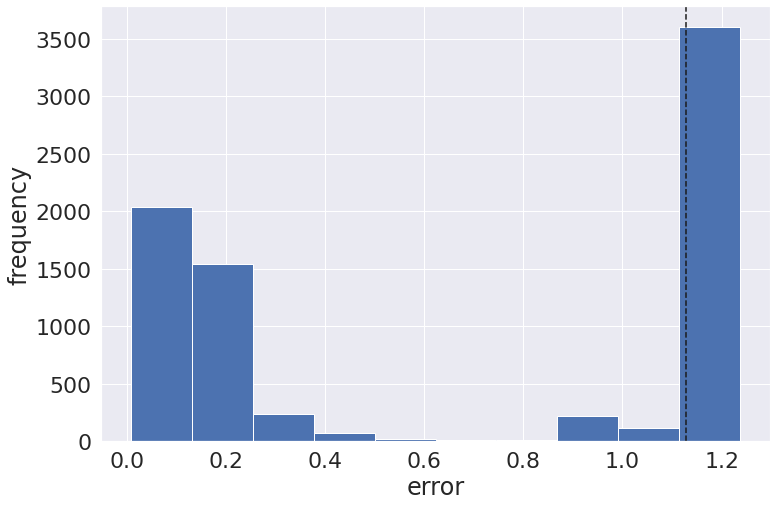

Outliers visualization


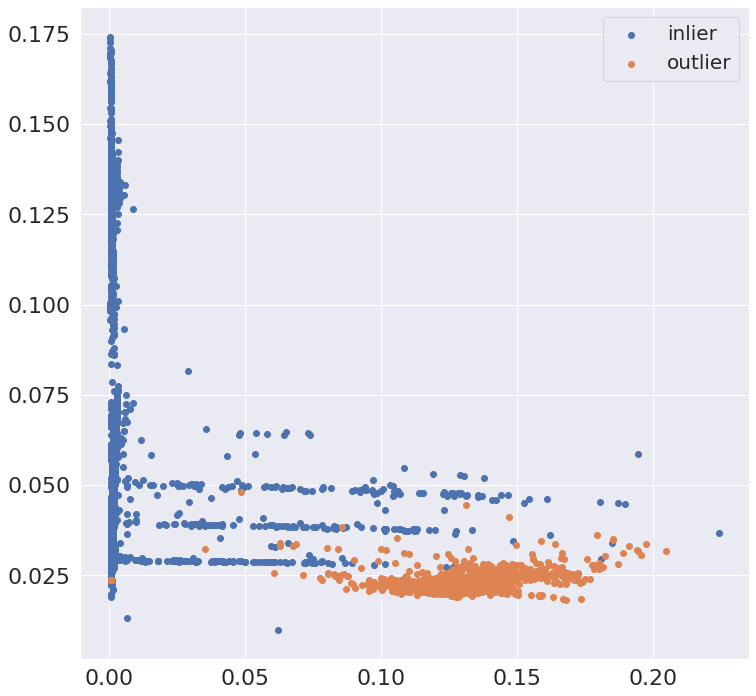

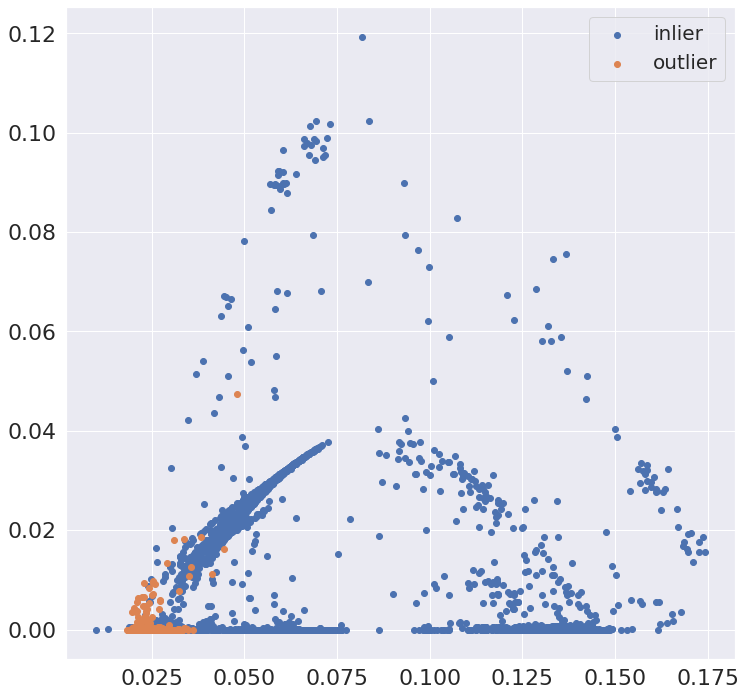

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.970     0.934     0.951      3934
           2      0.936     0.971     0.953      3934

    accuracy                          0.952      7868
   macro avg      0.953     0.952     0.952      7868
weighted avg      0.953     0.952     0.952      7868



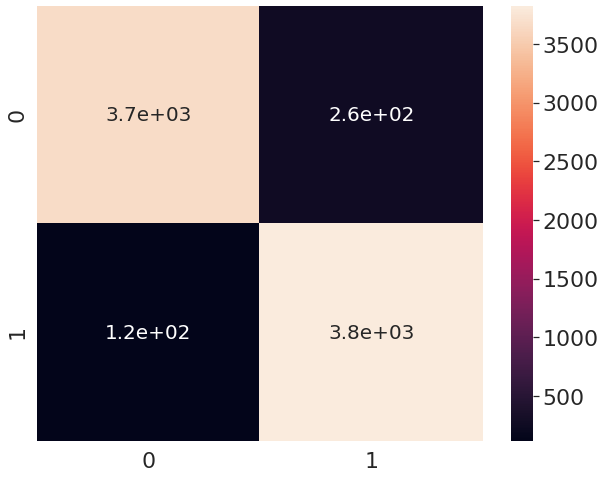

AUC score:  0.9522114895780377


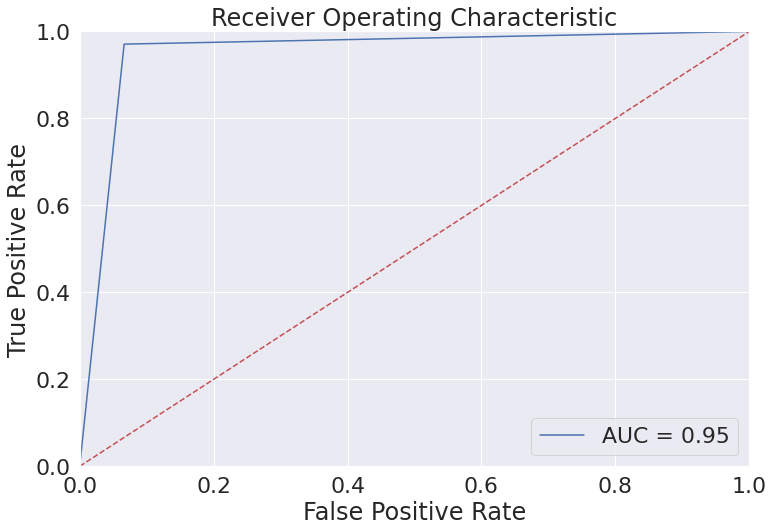

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [82]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (7868, 115) (7868,)
----------------------Test is starting----------------------
Scale data
Shape:  (7868, 115) (7868,)
Shape:  (7868, 115) (7868,)
Normalize data
Shape:  (7868, 115) (7868,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.08799763 0.24015129 0.13535608 ... 0.65530953 0.74049151 1.20607282]
Visualize quantization error


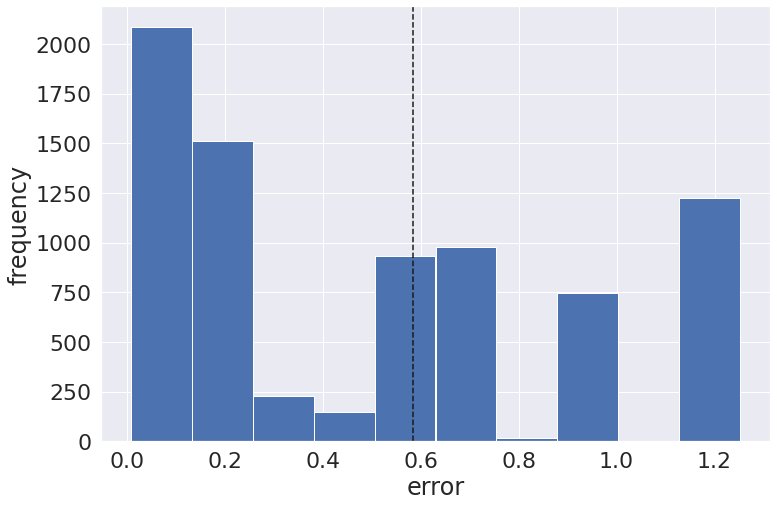

Outliers visualization


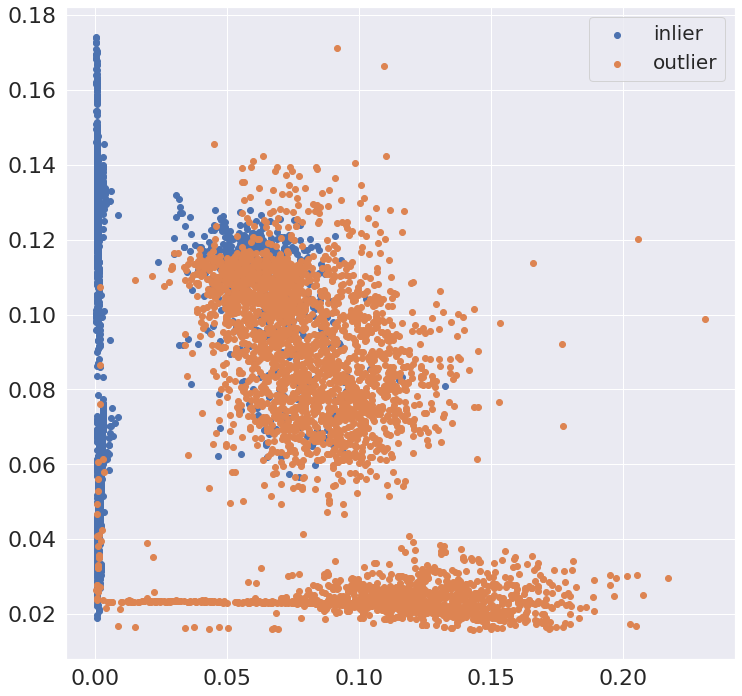

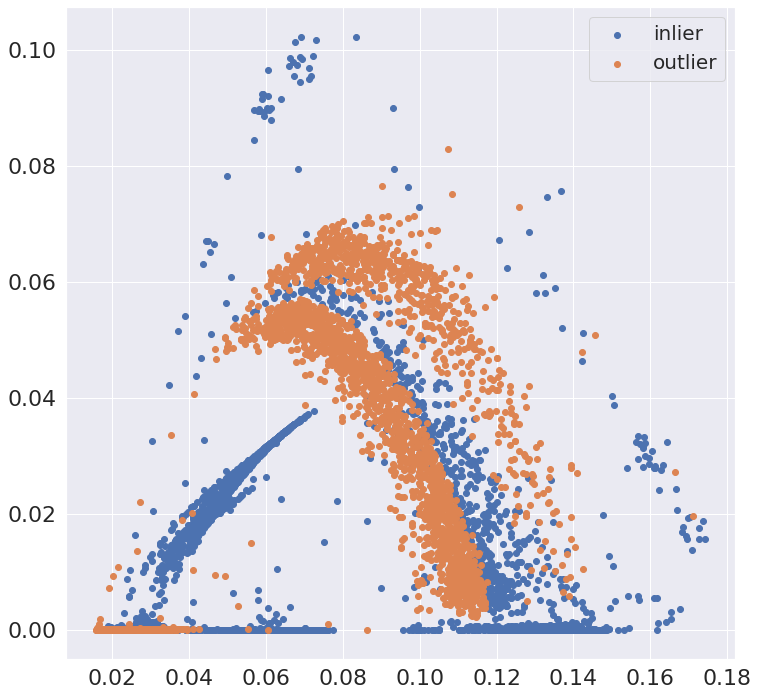

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      1.000     0.934     0.966      3934
           2      0.938     1.000     0.968      3934

    accuracy                          0.967      7868
   macro avg      0.969     0.967     0.967      7868
weighted avg      0.969     0.967     0.967      7868



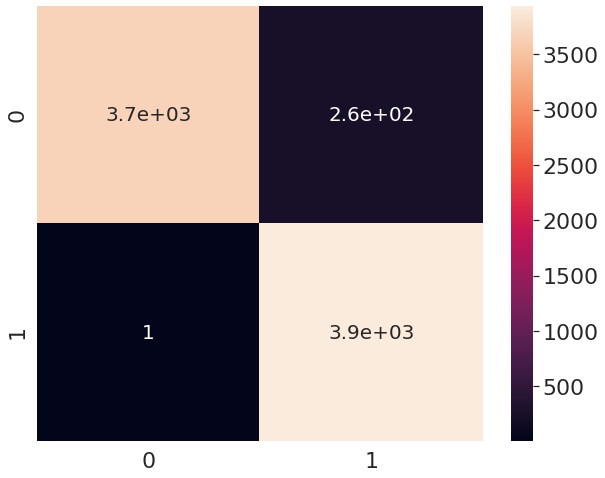

AUC score:  0.9667005592272496


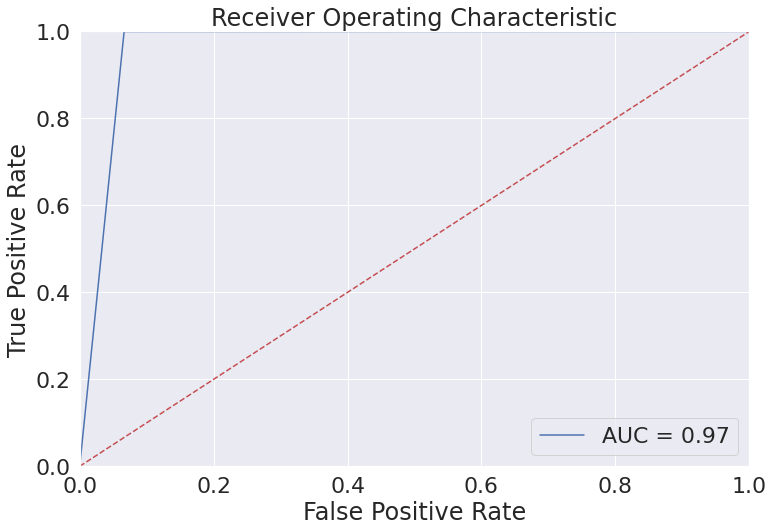

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [83]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 2) Algo rand

### Train

In [84]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo='rand', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(18358, 115) (18358,)
------------Scale data-----------------
(18358, 115) (18358,)
X_train_scaled
[[ 2.31515042e-03  5.41440555e-02  3.63262322e-09 ...  5.57415826e-18
   1.12256067e-33  4.99340799e-17]
 [ 2.99843163e-03  1.24129016e-01  6.37556170e-02 ...  1.27110049e-01
  -2.85282147e-01 -5.23408817e-01]
 [ 4.53672891e-03  6.51663165e-02  2.18698960e-04 ...  1.35988519e-01
  -4.68556201e-01 -8.08789153e-01]
 ...
 [ 2.42903573e-03  3.33851152e-01  1.05116699e-02 ...  1.47720813e-01
  -2.44754127e-01 -4.11238303e-01]
 [ 3.65016233e-03  2.84774544e-01  2.93300948e-02 ...  1.04072329e-01
  -1.18958954e-01 -2.53642017e-01]
 [ 2.31515033e-03  3.42912333e-01  0.00000000e+00 ...  9.75485625e-02
  -1.09149378e-01 -2.50139944e-01]]
(18358, 115) (18358,)
---------Normalize data--------------
(18358, 115) (18358,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

### Test Gafgyt

Shape:  (7868, 115) (7868,)
----------------------Test is starting----------------------
Scale data
Shape:  (7868, 115) (7868,)
Shape:  (7868, 115) (7868,)
Normalize data
Shape:  (7868, 115) (7868,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.10741376 0.23973354 0.05168216 ... 1.22128509 1.22128508 1.22128508]
Visualize quantization error


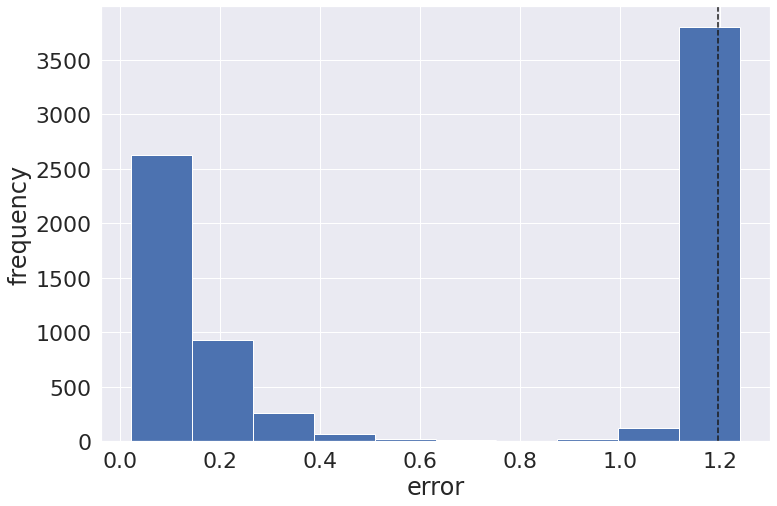

Outliers visualization


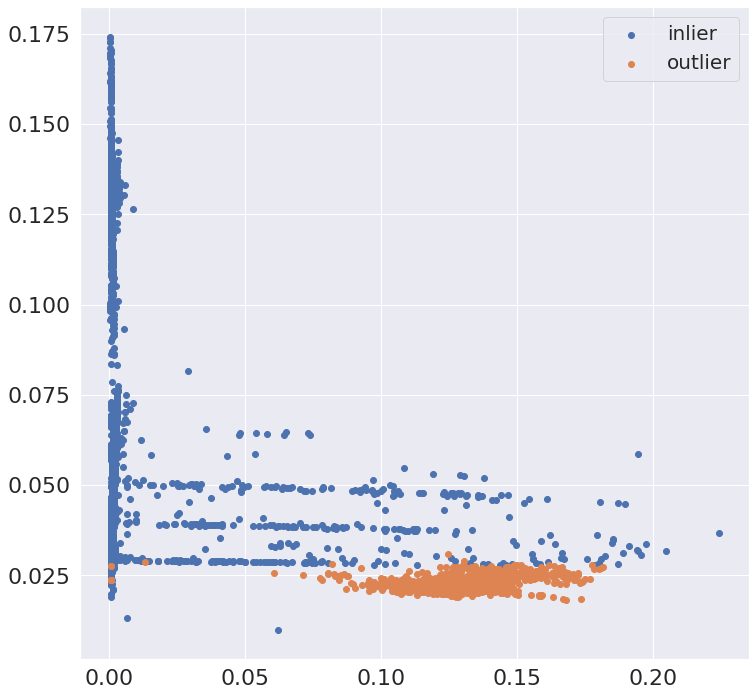

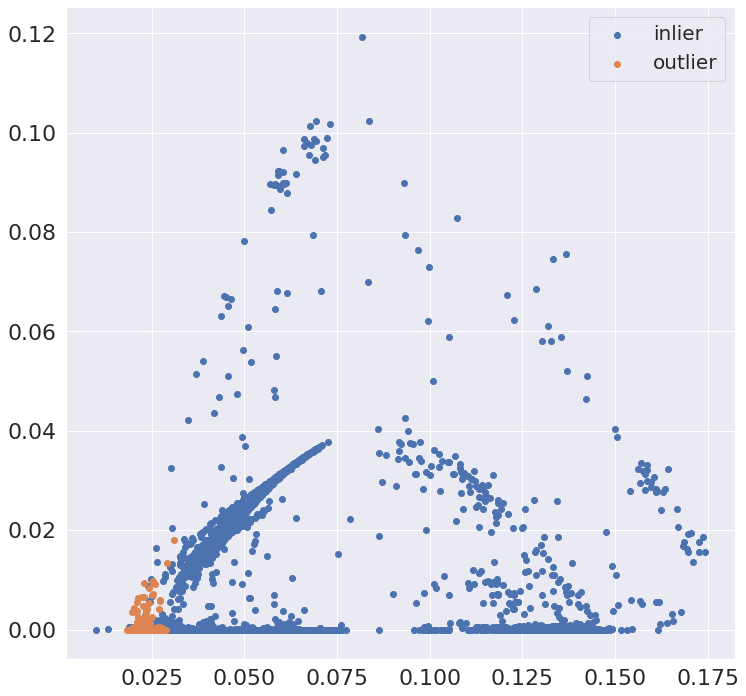

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.996     0.998     0.997      3934
           2      0.998     0.996     0.997      3934

    accuracy                          0.997      7868
   macro avg      0.997     0.997     0.997      7868
weighted avg      0.997     0.997     0.997      7868



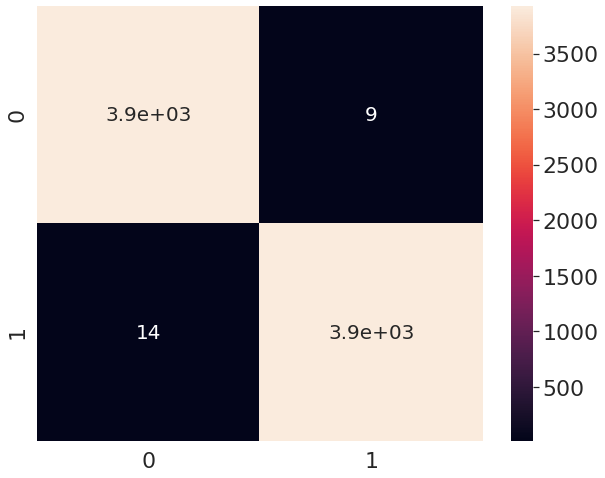

AUC score:  0.9970767666497203


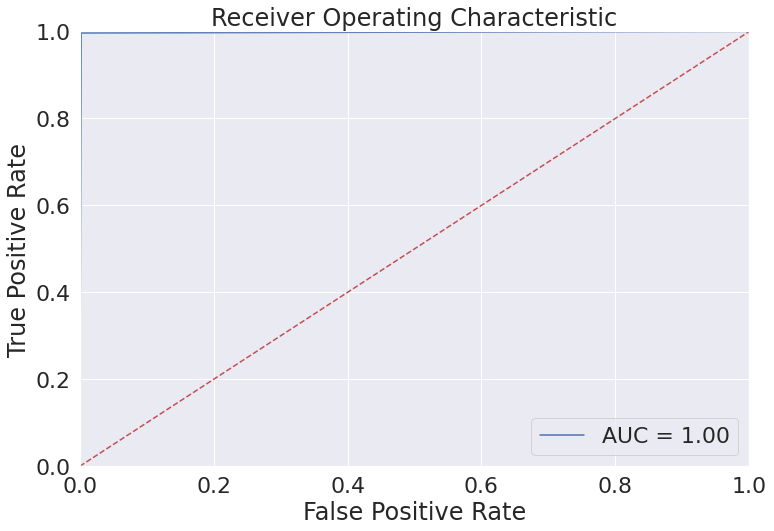

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [85]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

### Test Mirai

Shape:  (7868, 115) (7868,)
----------------------Test is starting----------------------
Scale data
Shape:  (7868, 115) (7868,)
Shape:  (7868, 115) (7868,)
Normalize data
Shape:  (7868, 115) (7868,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.10741376 0.23973354 0.05168216 ... 0.63669932 0.72704009 1.20998823]
Visualize quantization error


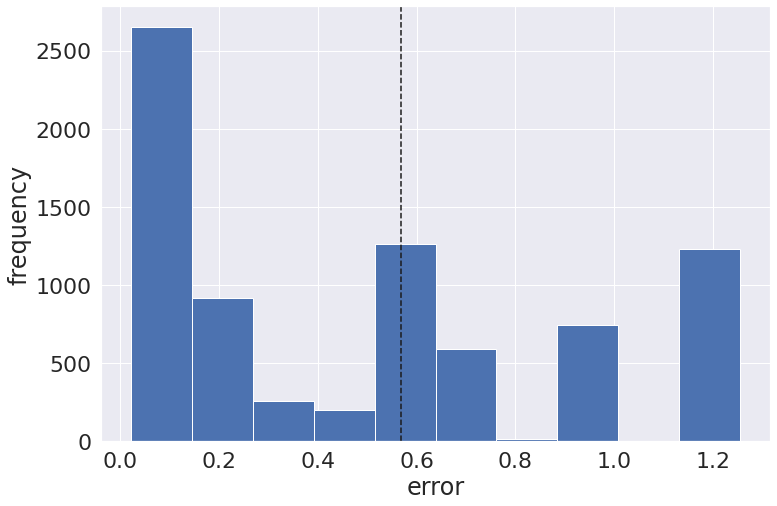

Outliers visualization


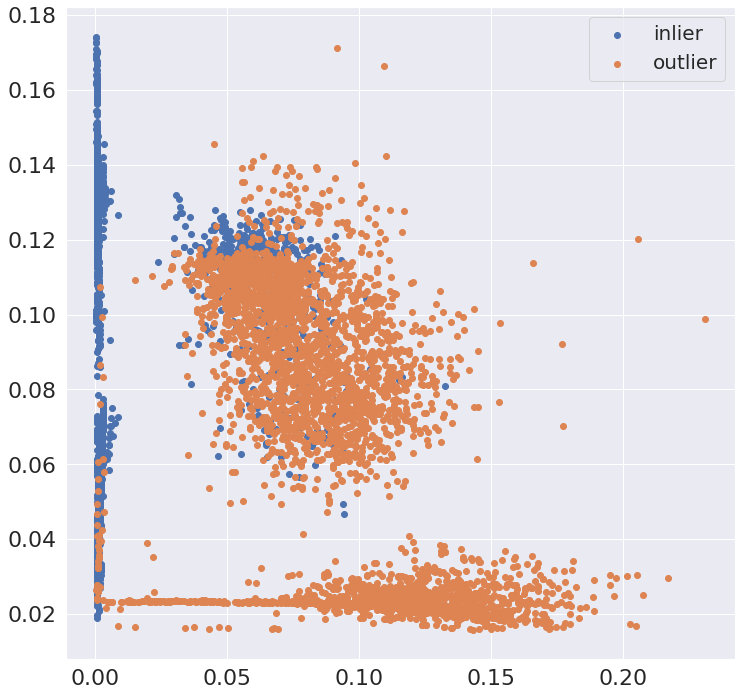

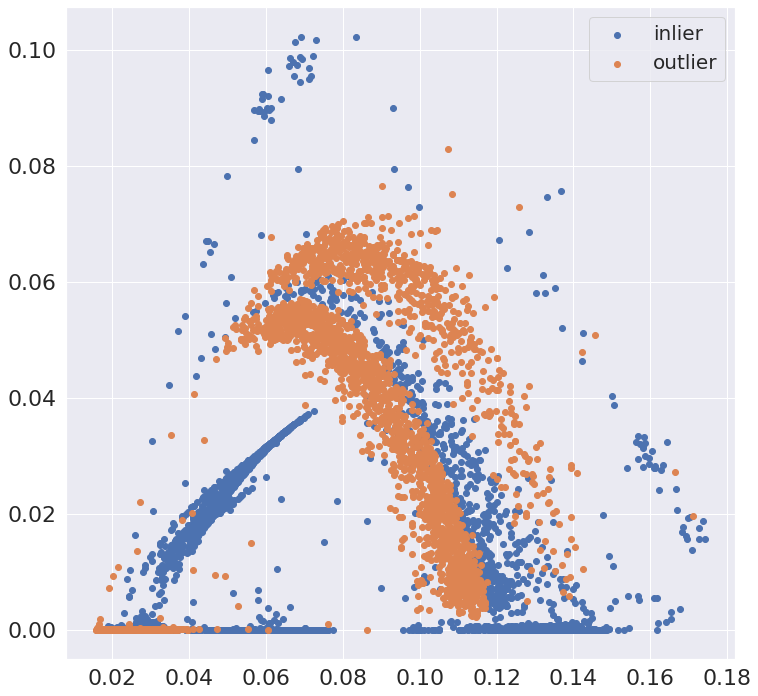

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.999     0.998     0.999      3934
           2      0.998     0.999     0.999      3934

    accuracy                          0.999      7868
   macro avg      0.999     0.999     0.999      7868
weighted avg      0.999     0.999     0.999      7868



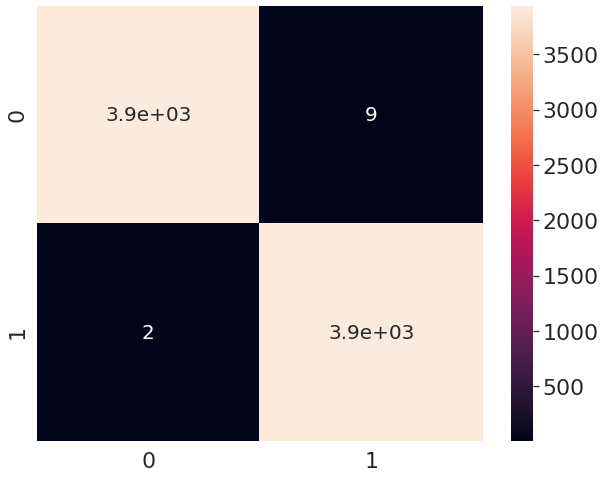

AUC score:  0.9986019318759533


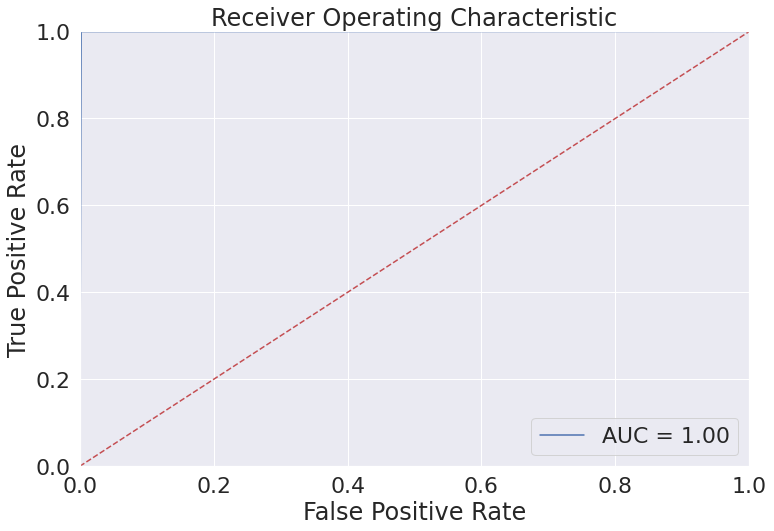

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [86]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 3) Algo atpe

In [87]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo='atpe', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(18358, 115) (18358,)
------------Scale data-----------------
(18358, 115) (18358,)
X_train_scaled
[[ 2.31515042e-03  5.41440555e-02  3.63262322e-09 ...  5.57415826e-18
   1.12256067e-33  4.99340799e-17]
 [ 2.99843163e-03  1.24129016e-01  6.37556170e-02 ...  1.27110049e-01
  -2.85282147e-01 -5.23408817e-01]
 [ 4.53672891e-03  6.51663165e-02  2.18698960e-04 ...  1.35988519e-01
  -4.68556201e-01 -8.08789153e-01]
 ...
 [ 2.42903573e-03  3.33851152e-01  1.05116699e-02 ...  1.47720813e-01
  -2.44754127e-01 -4.11238303e-01]
 [ 3.65016233e-03  2.84774544e-01  2.93300948e-02 ...  1.04072329e-01
  -1.18958954e-01 -2.53642017e-01]
 [ 2.31515033e-03  3.42912333e-01  0.00000000e+00 ...  9.75485625e-02
  -1.09149378e-01 -2.50139944e-01]]
(18358, 115) (18358,)
---------Normalize data--------------
(18358, 115) (18358,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

Shape:  (7868, 115) (7868,)
----------------------Test is starting----------------------
Scale data
Shape:  (7868, 115) (7868,)
Shape:  (7868, 115) (7868,)
Normalize data
Shape:  (7868, 115) (7868,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.12098702 0.16792042 0.04721903 ... 1.21308138 1.21308137 1.21308137]
Visualize quantization error


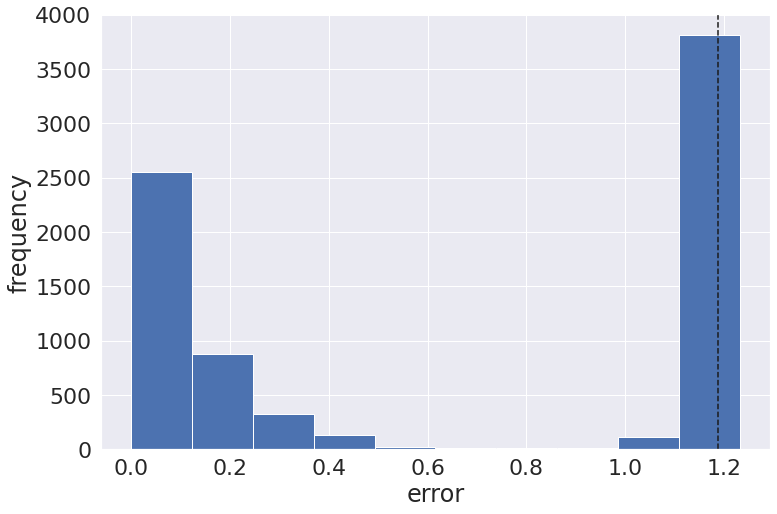

Outliers visualization


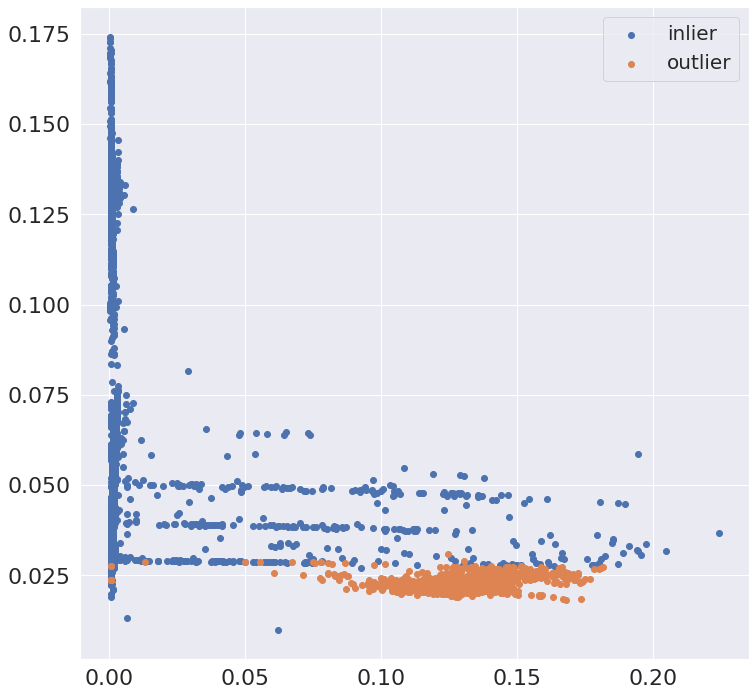

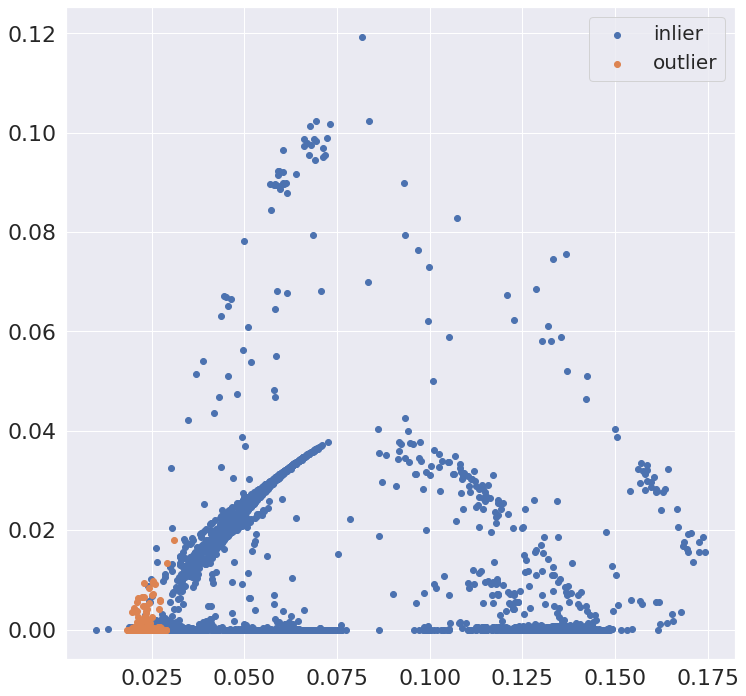

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.979     0.997     0.988      3934
           2      0.997     0.979     0.988      3934

    accuracy                          0.988      7868
   macro avg      0.988     0.988     0.988      7868
weighted avg      0.988     0.988     0.988      7868



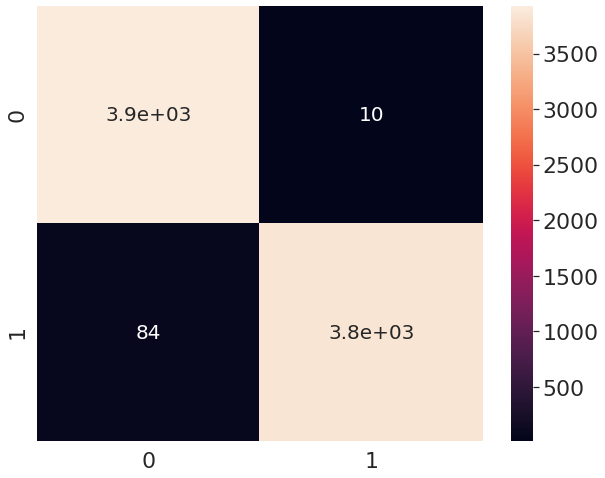

AUC score:  0.9880528723945093


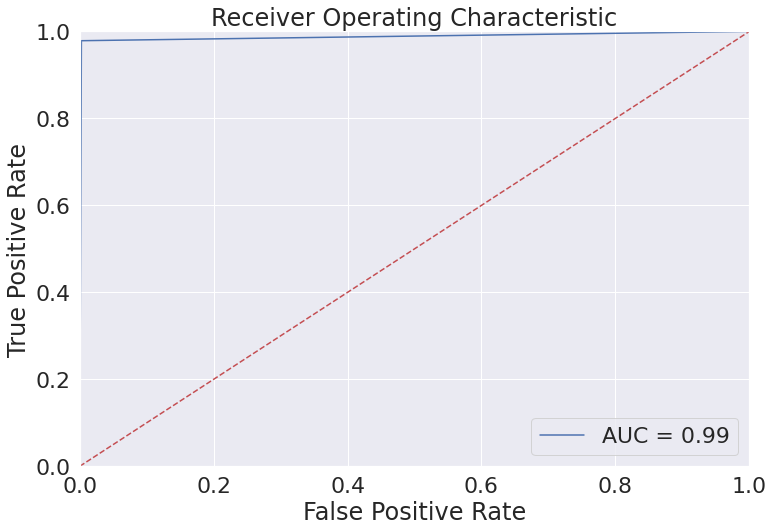

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [88]:
# test on gafgyt
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

Shape:  (7868, 115) (7868,)
----------------------Test is starting----------------------
Scale data
Shape:  (7868, 115) (7868,)
Shape:  (7868, 115) (7868,)
Normalize data
Shape:  (7868, 115) (7868,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.12098702 0.16792042 0.04721903 ... 0.63810855 0.72931361 1.20061179]
Visualize quantization error


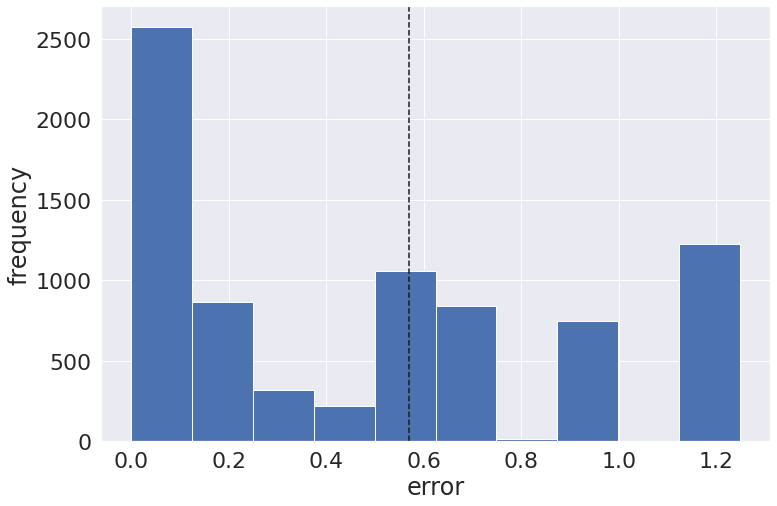

Outliers visualization


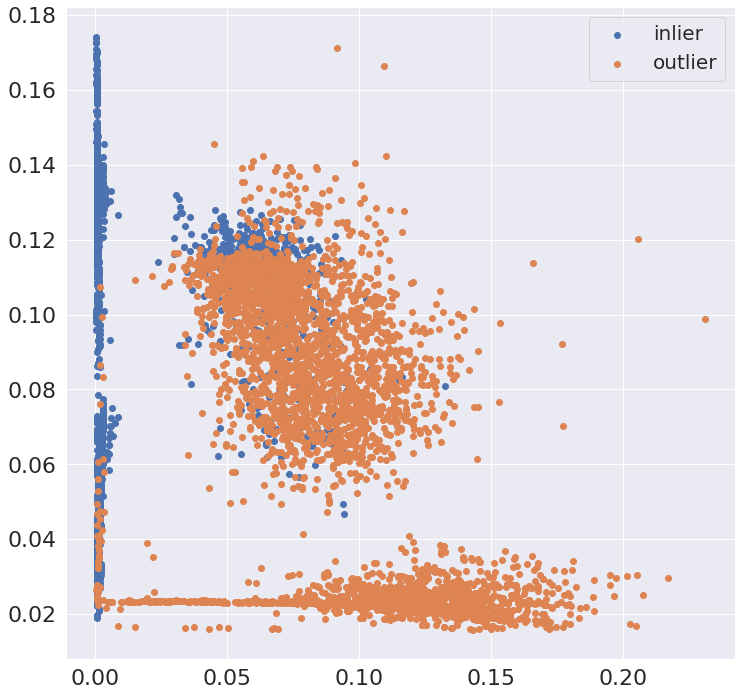

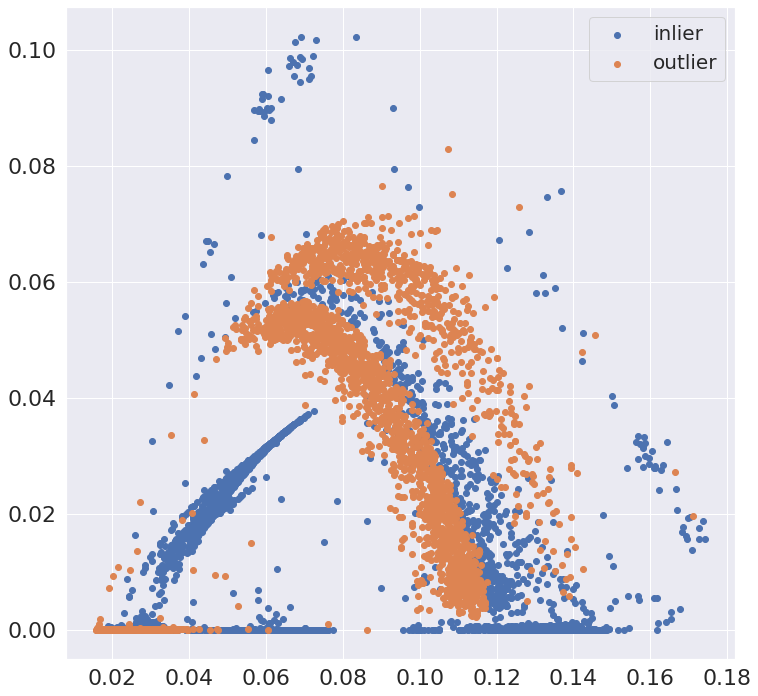

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.999     0.997     0.998      3934
           2      0.997     0.999     0.998      3934

    accuracy                          0.998      7868
   macro avg      0.998     0.998     0.998      7868
weighted avg      0.998     0.998     0.998      7868



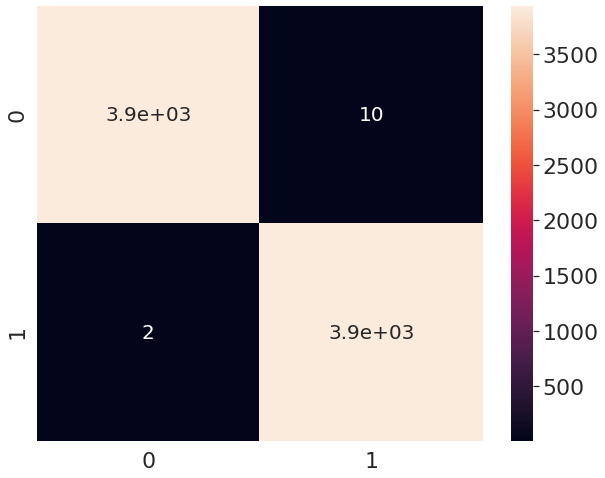

AUC score:  0.9984748347737672


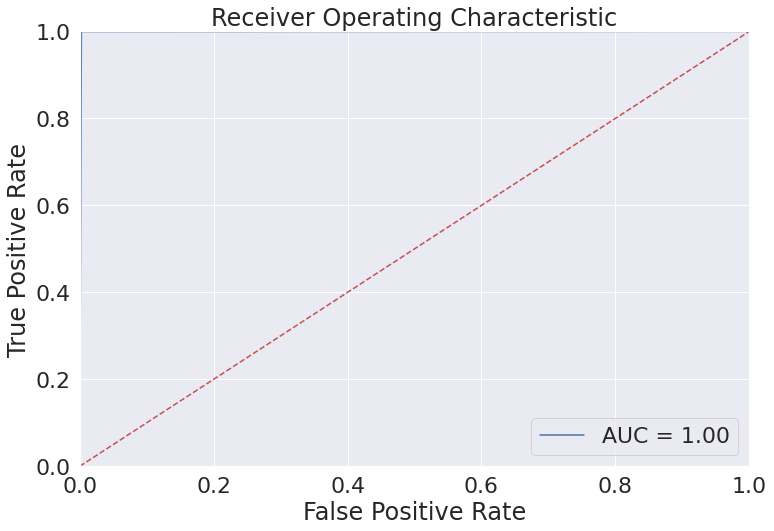

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [89]:
# test on Mirai
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 4) Algo anneal

In [90]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo='anneal', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(18358, 115) (18358,)
------------Scale data-----------------
(18358, 115) (18358,)
X_train_scaled
[[ 2.31515042e-03  5.41440555e-02  3.63262322e-09 ...  5.57415826e-18
   1.12256067e-33  4.99340799e-17]
 [ 2.99843163e-03  1.24129016e-01  6.37556170e-02 ...  1.27110049e-01
  -2.85282147e-01 -5.23408817e-01]
 [ 4.53672891e-03  6.51663165e-02  2.18698960e-04 ...  1.35988519e-01
  -4.68556201e-01 -8.08789153e-01]
 ...
 [ 2.42903573e-03  3.33851152e-01  1.05116699e-02 ...  1.47720813e-01
  -2.44754127e-01 -4.11238303e-01]
 [ 3.65016233e-03  2.84774544e-01  2.93300948e-02 ...  1.04072329e-01
  -1.18958954e-01 -2.53642017e-01]
 [ 2.31515033e-03  3.42912333e-01  0.00000000e+00 ...  9.75485625e-02
  -1.09149378e-01 -2.50139944e-01]]
(18358, 115) (18358,)
---------Normalize data--------------
(18358, 115) (18358,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

Shape:  (7868, 115) (7868,)
----------------------Test is starting----------------------
Scale data
Shape:  (7868, 115) (7868,)
Shape:  (7868, 115) (7868,)
Normalize data
Shape:  (7868, 115) (7868,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.09173981 0.20092497 0.03060911 ... 1.22214783 1.22214782 1.22214782]
Visualize quantization error


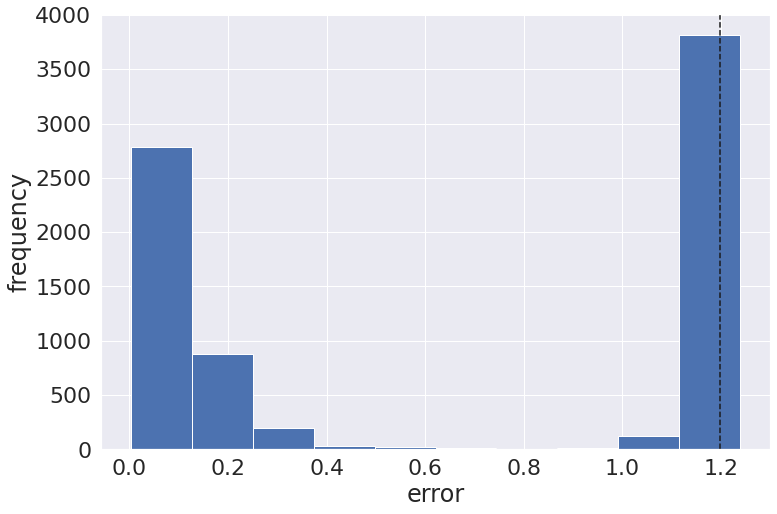

Outliers visualization


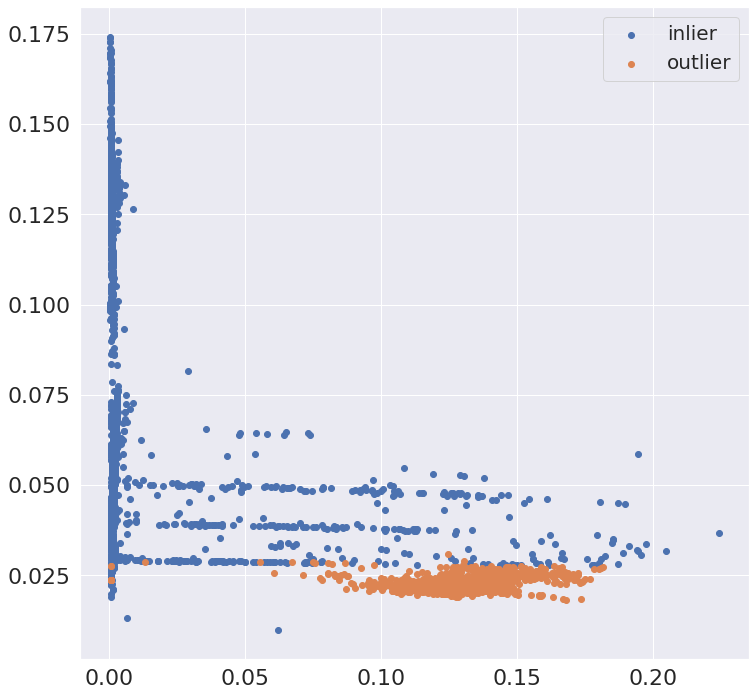

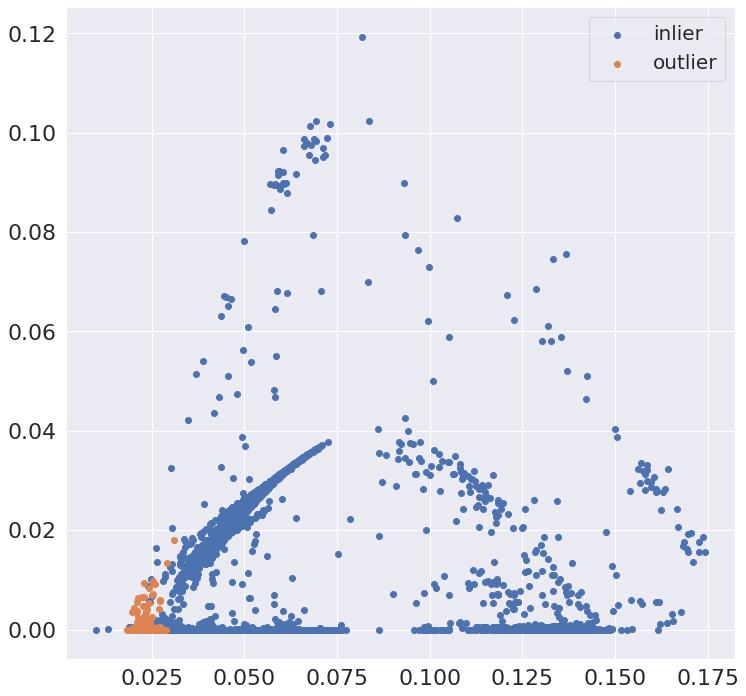

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.971     0.998     0.984      3934
           2      0.998     0.970     0.984      3934

    accuracy                          0.984      7868
   macro avg      0.984     0.984     0.984      7868
weighted avg      0.984     0.984     0.984      7868



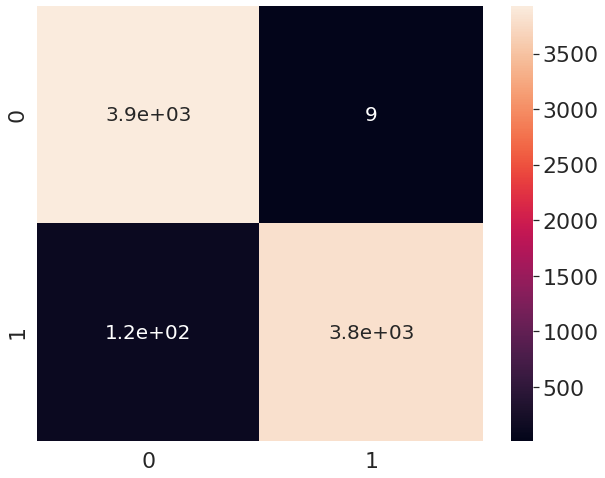

AUC score:  0.983731570920183


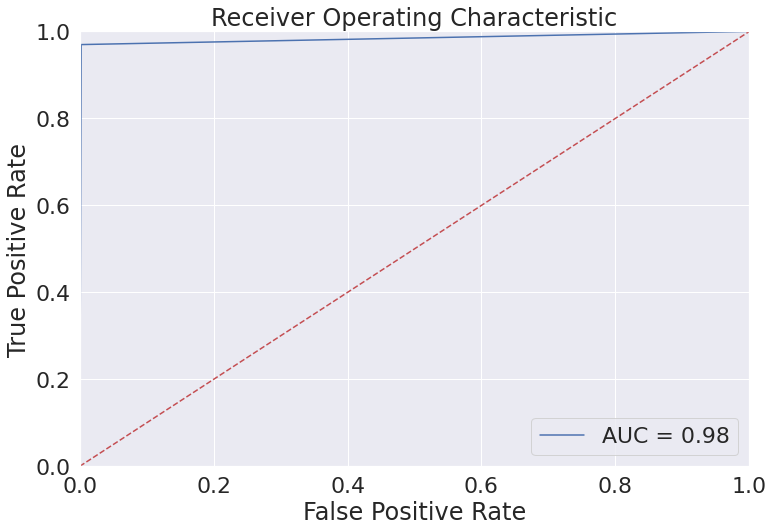

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [91]:
# test on gafgyt
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

Shape:  (7868, 115) (7868,)
----------------------Test is starting----------------------
Scale data
Shape:  (7868, 115) (7868,)
Shape:  (7868, 115) (7868,)
Normalize data
Shape:  (7868, 115) (7868,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.09173981 0.20092497 0.03060911 ... 0.65086629 0.74205248 1.21076783]
Visualize quantization error


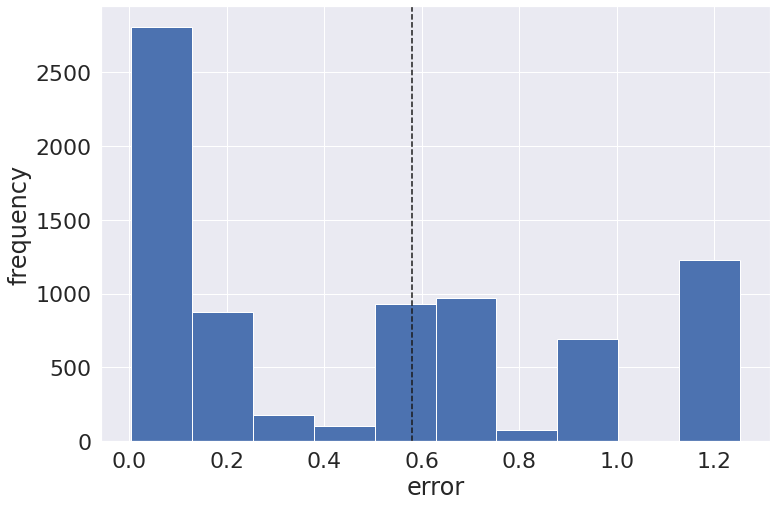

Outliers visualization


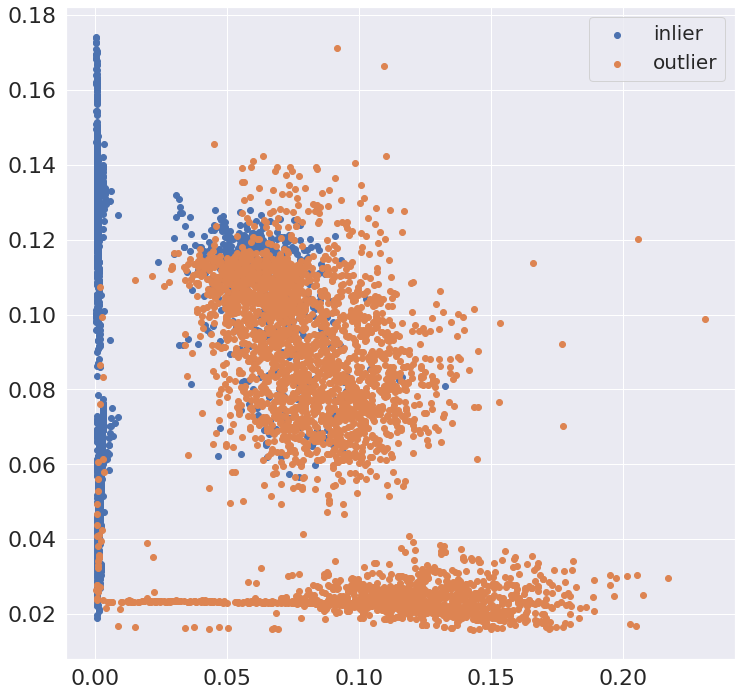

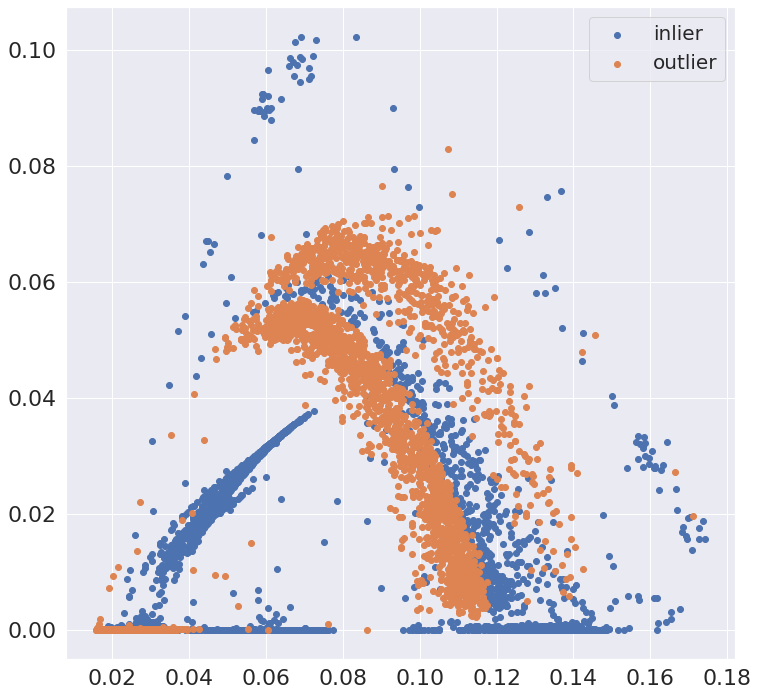

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.999     0.998     0.999      3934
           2      0.998     0.999     0.999      3934

    accuracy                          0.999      7868
   macro avg      0.999     0.999     0.999      7868
weighted avg      0.999     0.999     0.999      7868



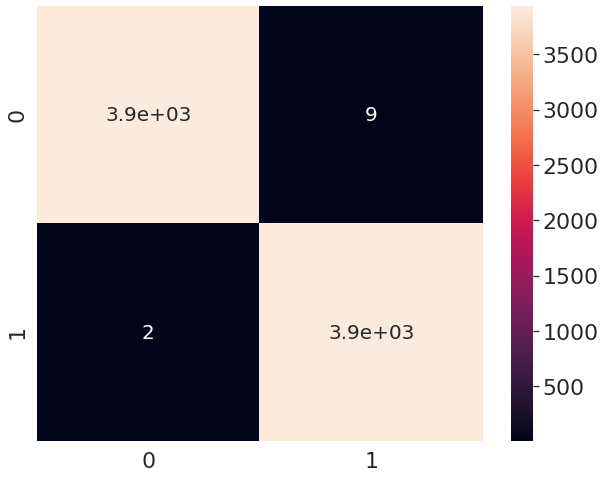

AUC score:  0.9986019318759533


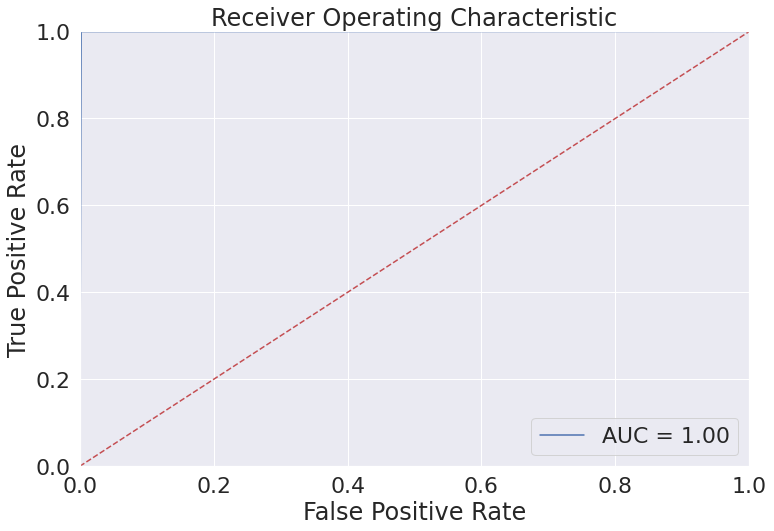

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [92]:
# test on Mirai
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

